In [1]:
import numpy as np
import pandas as pd
import time, os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
from sklearn.metrics import precision_recall_fscore_support, classification_report, adjusted_mutual_info_score
from sklearn.metrics import multilabel_confusion_matrix

In [3]:
import tcremb.ml_utils as ml_utils
import benchmark.models as models
import benchmark.metrics as metrics
import tcremb.TCRemb as TCRemb
from sklearn.cluster import KMeans,DBSCAN

In [4]:
metrics_tcremb={}

In [5]:
label = 'antigen.epitope'
label_s = 'antigen.species'
#label = 'antigen.species_freq'
#output_suf = 'vdjdb_freq'
#output_suf = 'vdjdb'
#output_suf_s = 'vdjdb_s'

## Run with different protototypes

In [6]:
#samples_n = [1000]
samples_n = [50,100]
#samples_n = [10,50,100,500,1000]
prototypes_n = [100, 150, 300, 500, 1000,2000,3000, 5000]
#prototypes_n = [100]

In [7]:
def run_tcremb_v(run_name, v_path, proto_path):
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v,prototypes_path=proto_path)
    tcremb.tcremb_clonotypes('TRA')
    tcremb.tcremb_clonotypes('TRB')
    tcremb.tcremb_clonotypes('TRA_TRB')
    tcremb.tcremb_dists_count('TRA')
    tcremb.tcremb_dists_count('TRB')
    tcremb.tcremb_dists_count('TRA_TRB')
    tcremb.tcremb_dists('TRA')
    tcremb.tcremb_dists('TRB')
    tcremb.tcremb_dists('TRA_TRB')
    

In [ ]:
for i in samples_n:
    for j in prototypes_n:
        run_name = f'compare_V{i}_{j}'
        if j==3000:
            proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA.txt', 'TRB' : f'data/data_preped/olga_humanTRB.txt'}
        else:
            proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA_{j}.txt', 'TRB' : f'data/data_preped/olga_humanTRB_{j}.txt'}
    
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        run_tcremb_v(run_name, v_path, proto_path=proto_path_dict)

In [8]:
prototypes_sets = {'donor2_prototypes':{'TRA':'data/data_preped/ptototypes_donor2_TRA.txt', 'TRB':'data/data_preped/ptototypes_donor2_TRB.txt'}}
#prototypes_sets = {'tra1000_trb3000':{'TRA':'data/data_preped/olga_humanTRA_1000.txt', 'TRB':'data/data_preped/olga_humanTRB.txt'}
#                   ,'tra1000_trb5000':{'TRA':'data/data_preped/olga_humanTRA_1000.txt', 'TRB':'data/data_preped/olga_humanTRB_5000.txt'}
#                   ,'tra2000_trb5000':{'TRA':'data/data_preped/olga_humanTRA_2000.txt', 'TRB':'data/data_preped/olga_humanTRB_5000.txt'}
#                   ,'tra3000_trb5000':{'TRA':'data/data_preped/olga_humanTRA_2000.txt', 'TRB':'data/data_preped/olga_humanTRB_5000.txt'}}

In [9]:
for i in samples_n:
    for j in prototypes_sets:
        run_name = f'compare_V{i}_{j}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        run_tcremb_v(run_name, v_path, proto_path=prototypes_sets[j])

[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, κ8 CAVTWGGKLIF, κ9 CAVNNARLMF]
(9800, 7876)
333.4697048664093
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ5 CASSLGETQYF, κ6 CASSLGSRAQETQYF, κ7 CASSLGQSTQYF, κ8 CASSLQGSRRQGQNEQYF, κ9 CASSSQGGEGTEAFF]
(20161, 8422)
759.0804574489594
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, κ8 CAVTWGGKLIF, κ9 CAVNNARLMF]
(3876, 7876)
115.05991220474243
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEPGQGFYSNQPQHF, κ2 CASSALASLNEQFF, κ3 CASSFTPYNEQFF, κ4 CASSPQGLGTEAFF, κ5 CAEGQGFVGQPQHF, κ6 CASLRSAVWADTQYF, κ7 CASTLTGLGQPQHF, κ8 CASSFQGLGTEAFF, κ9 CASSPSGLAGGHTQYF]
(4220, 8422)
158.737144947052
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 

## Compare clustering

In [5]:
samples_n = [10,50,100,500,1000]
#samples_n = [500,1000]

### dbscan eps different sets

In [7]:
method = 'dbscan'
metrics_tcremb[method]={}
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
#params = [3, 1500]

In [ ]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    for j in params:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = DBSCAN(eps=j, min_samples=2)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['eps']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    for j in params:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = DBSCAN(eps=j, min_samples=2)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['eps']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


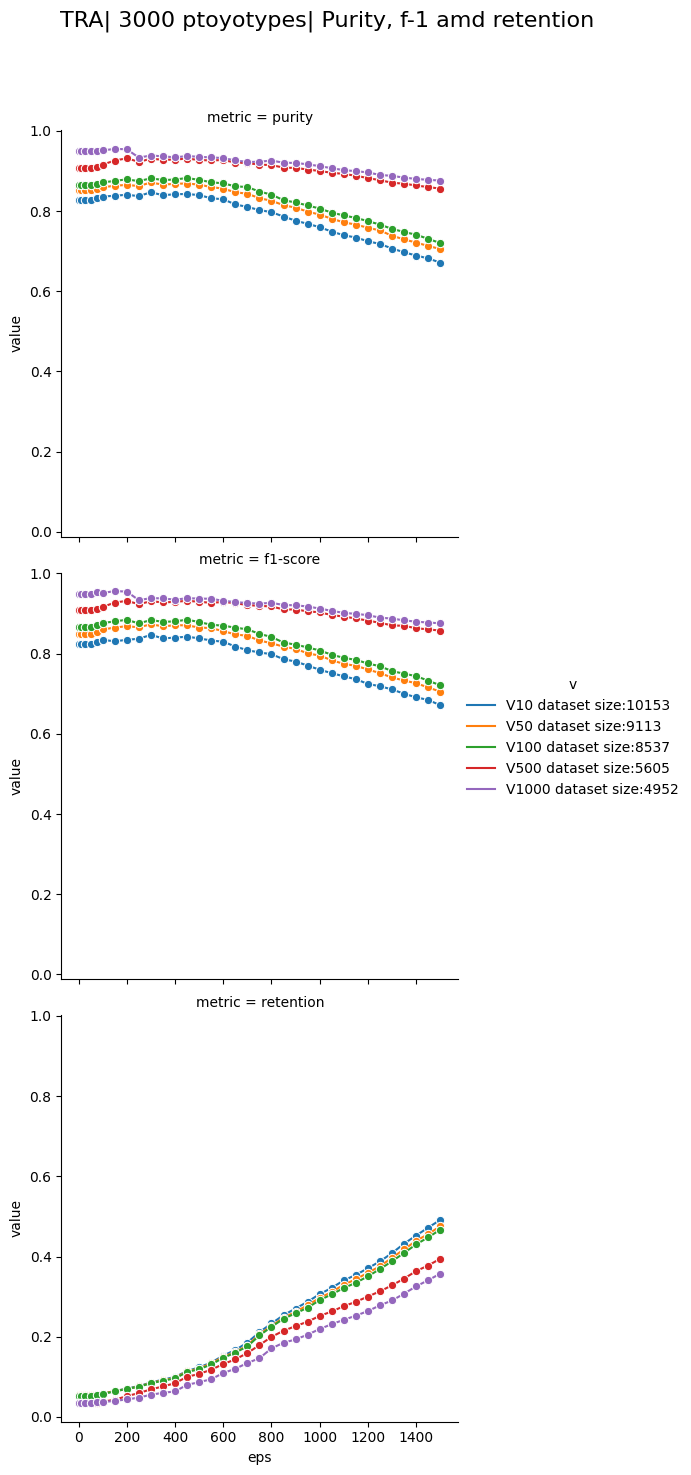

In [11]:
chain = 'TRA'
n_prototypes = 3000
method = 'dbscan'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','eps','v']].melt(id_vars=['eps','v'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


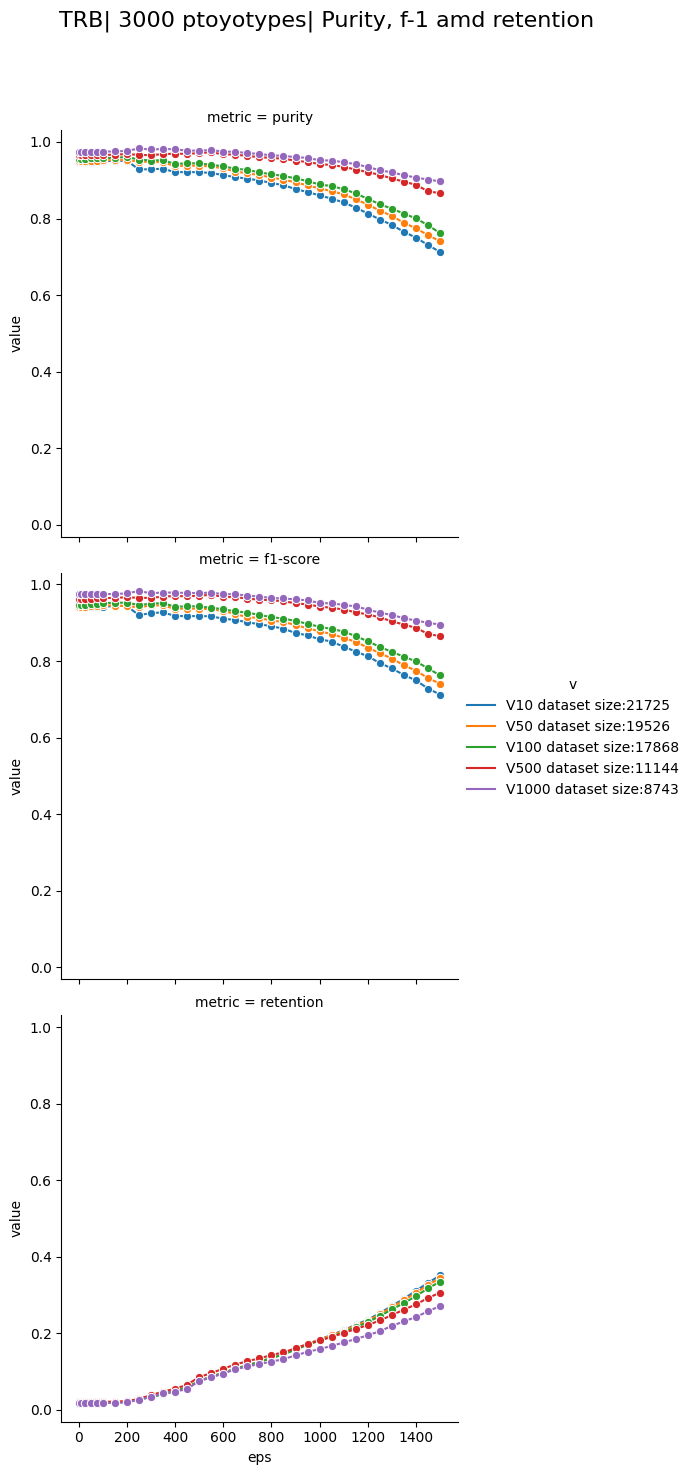

In [18]:
chain = 'TRB'
n_prototypes = 3000
method = 'dbscan'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','eps','v']].melt(id_vars=['eps','v'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

### Kmeans n_clusters

In [13]:
method = 'kmeans'
metrics_tcremb[method]={}

In [ ]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


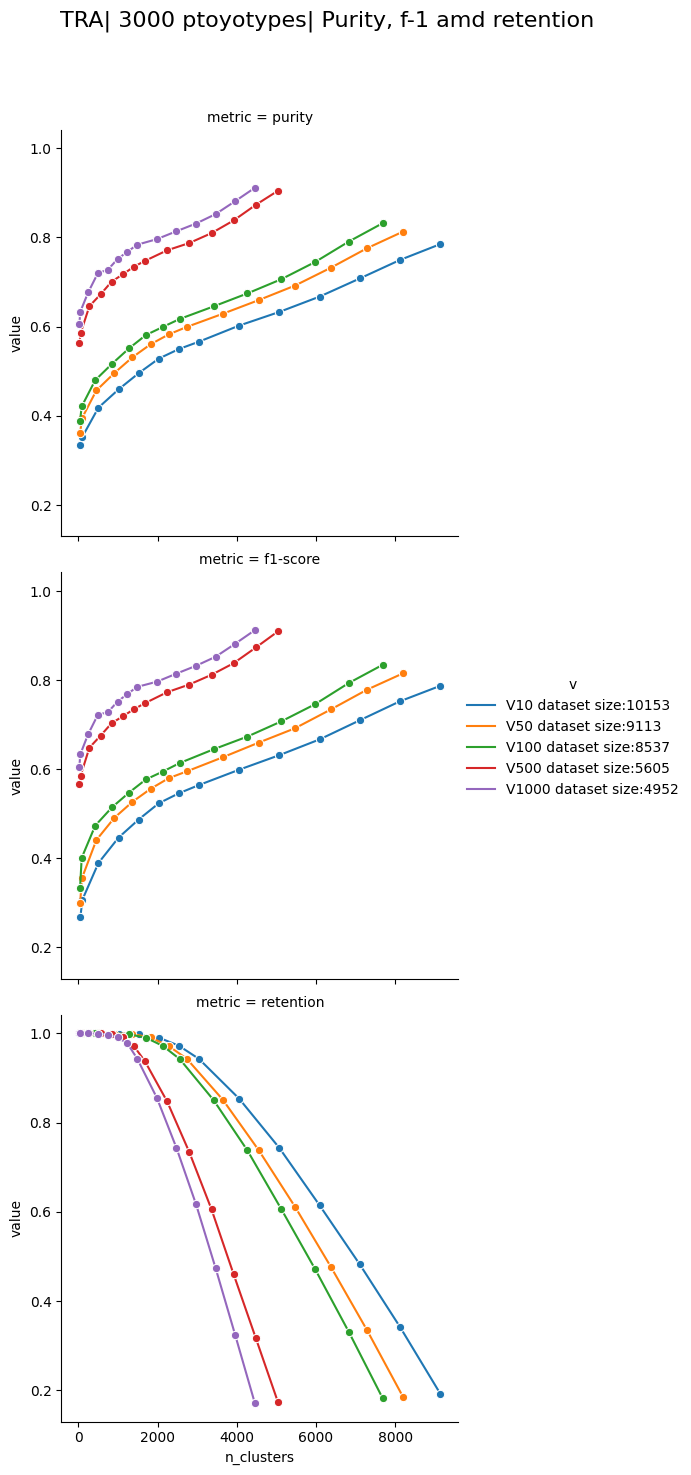

In [15]:
chain = 'TRA'
n_prototypes=3000
method = 'kmeans'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


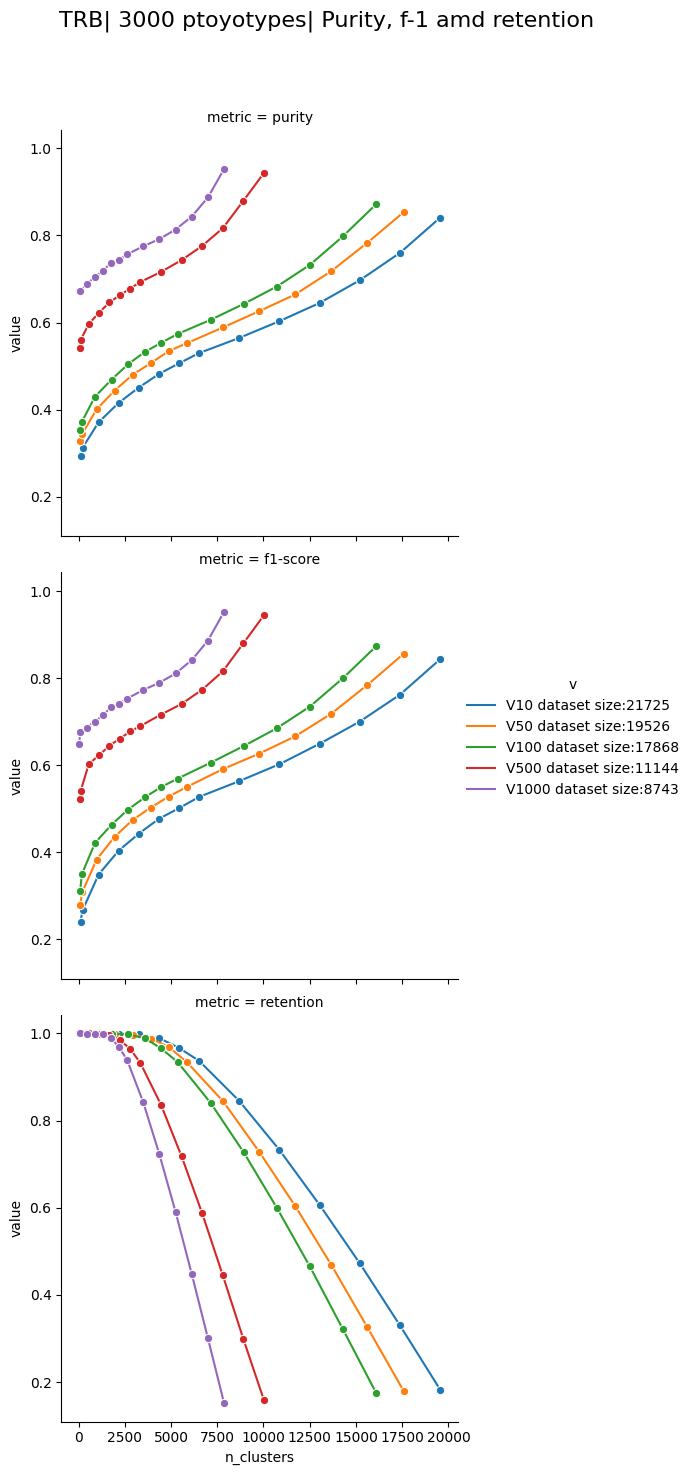

In [17]:
chain = 'TRB'
n_prototypes=3000
method = 'kmeans'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"fresults/igures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:
#method = 'kmeans'
#metrics_tcremb[method]={}

In [13]:
n_prototypes = 100
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


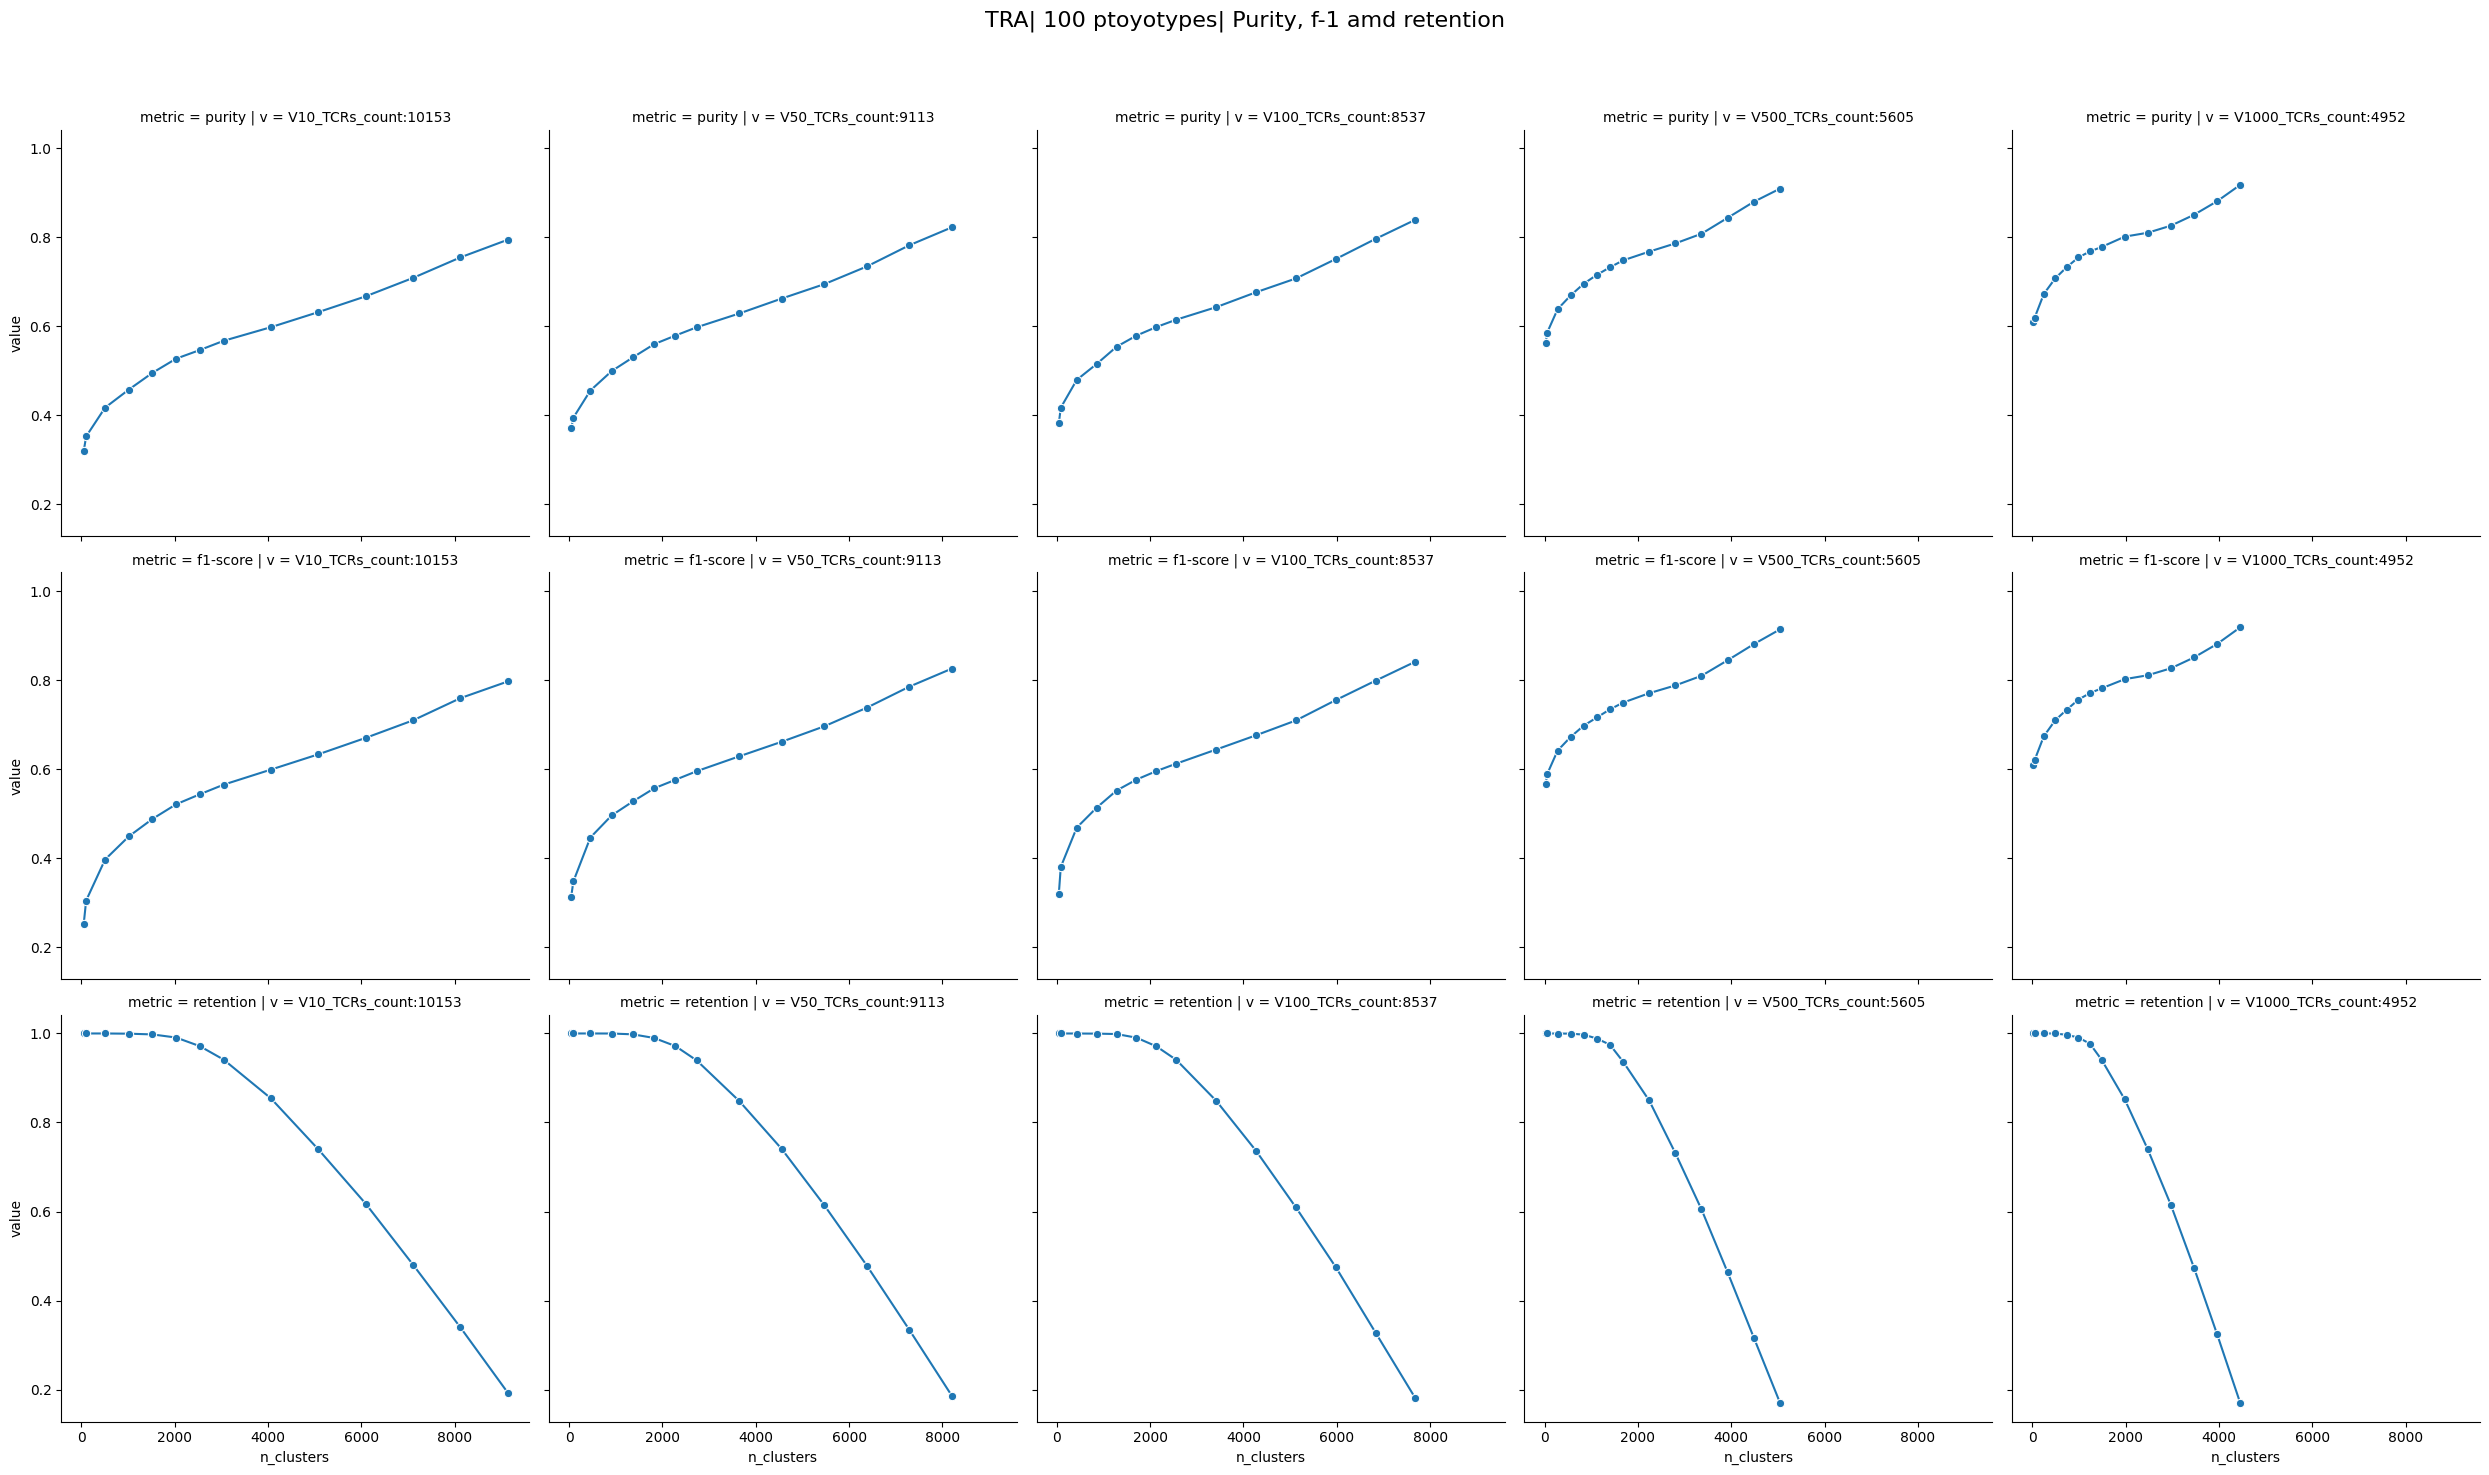

In [15]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


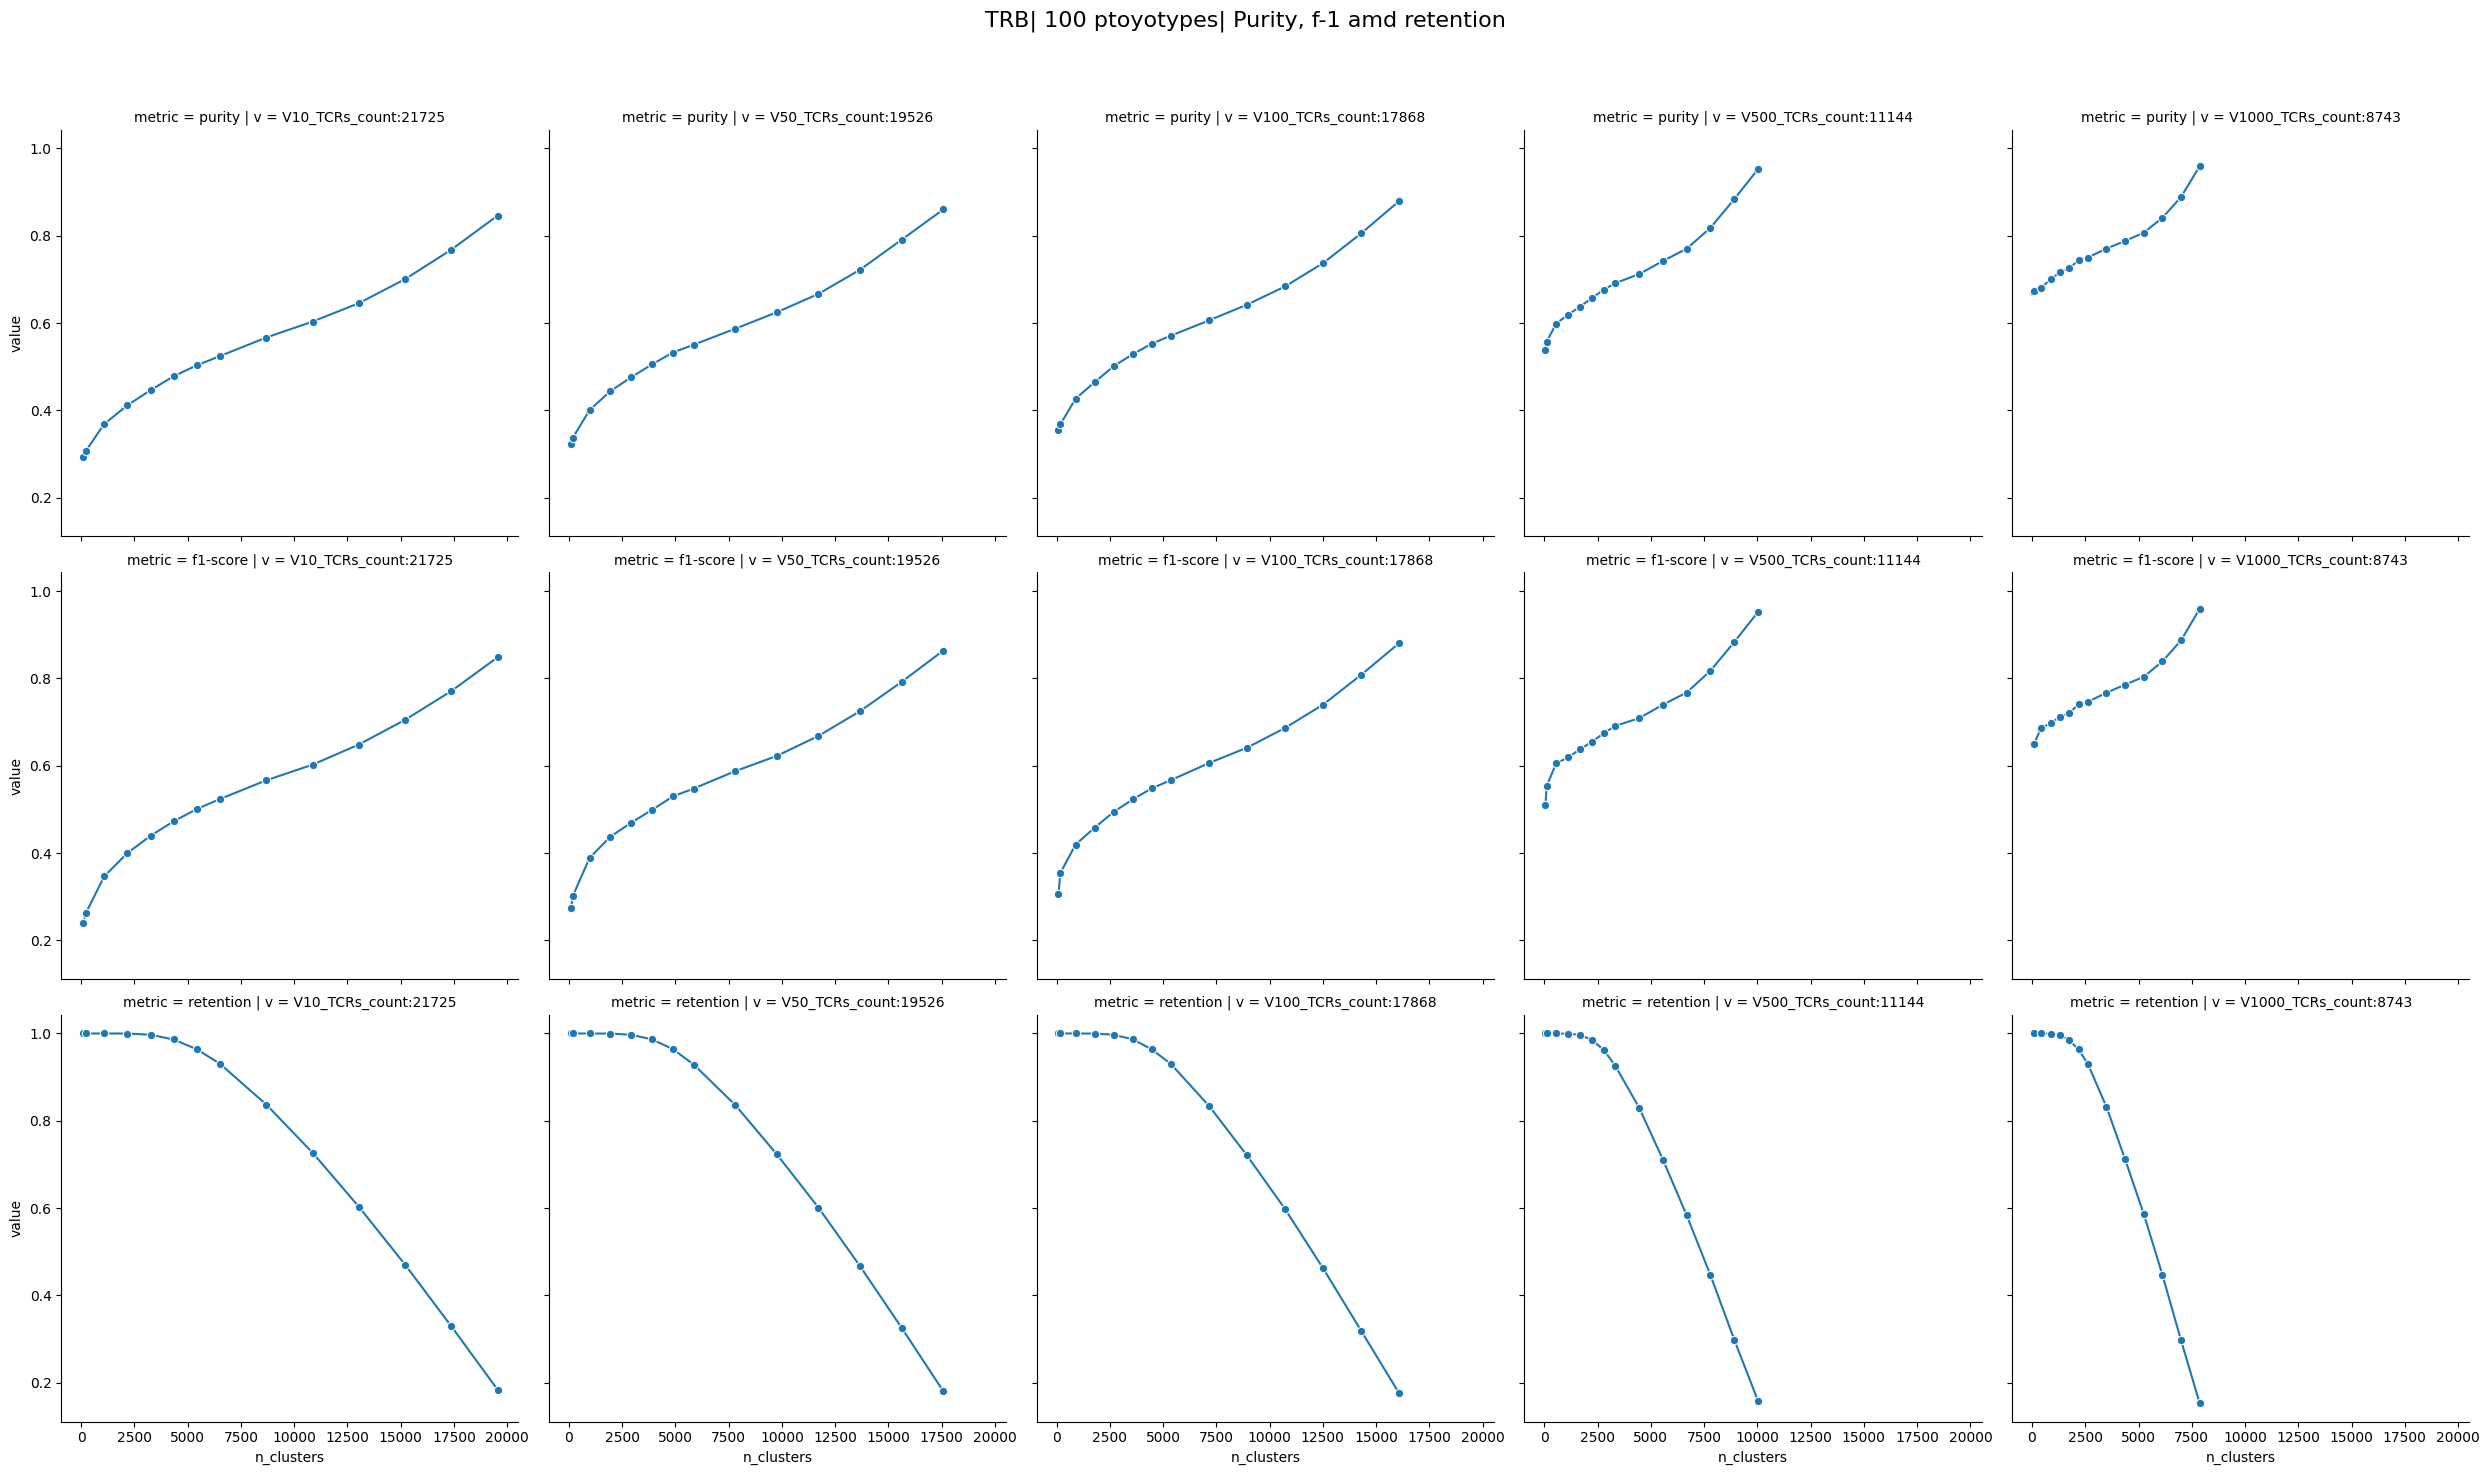

In [17]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [18]:
n_prototypes = 1000
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


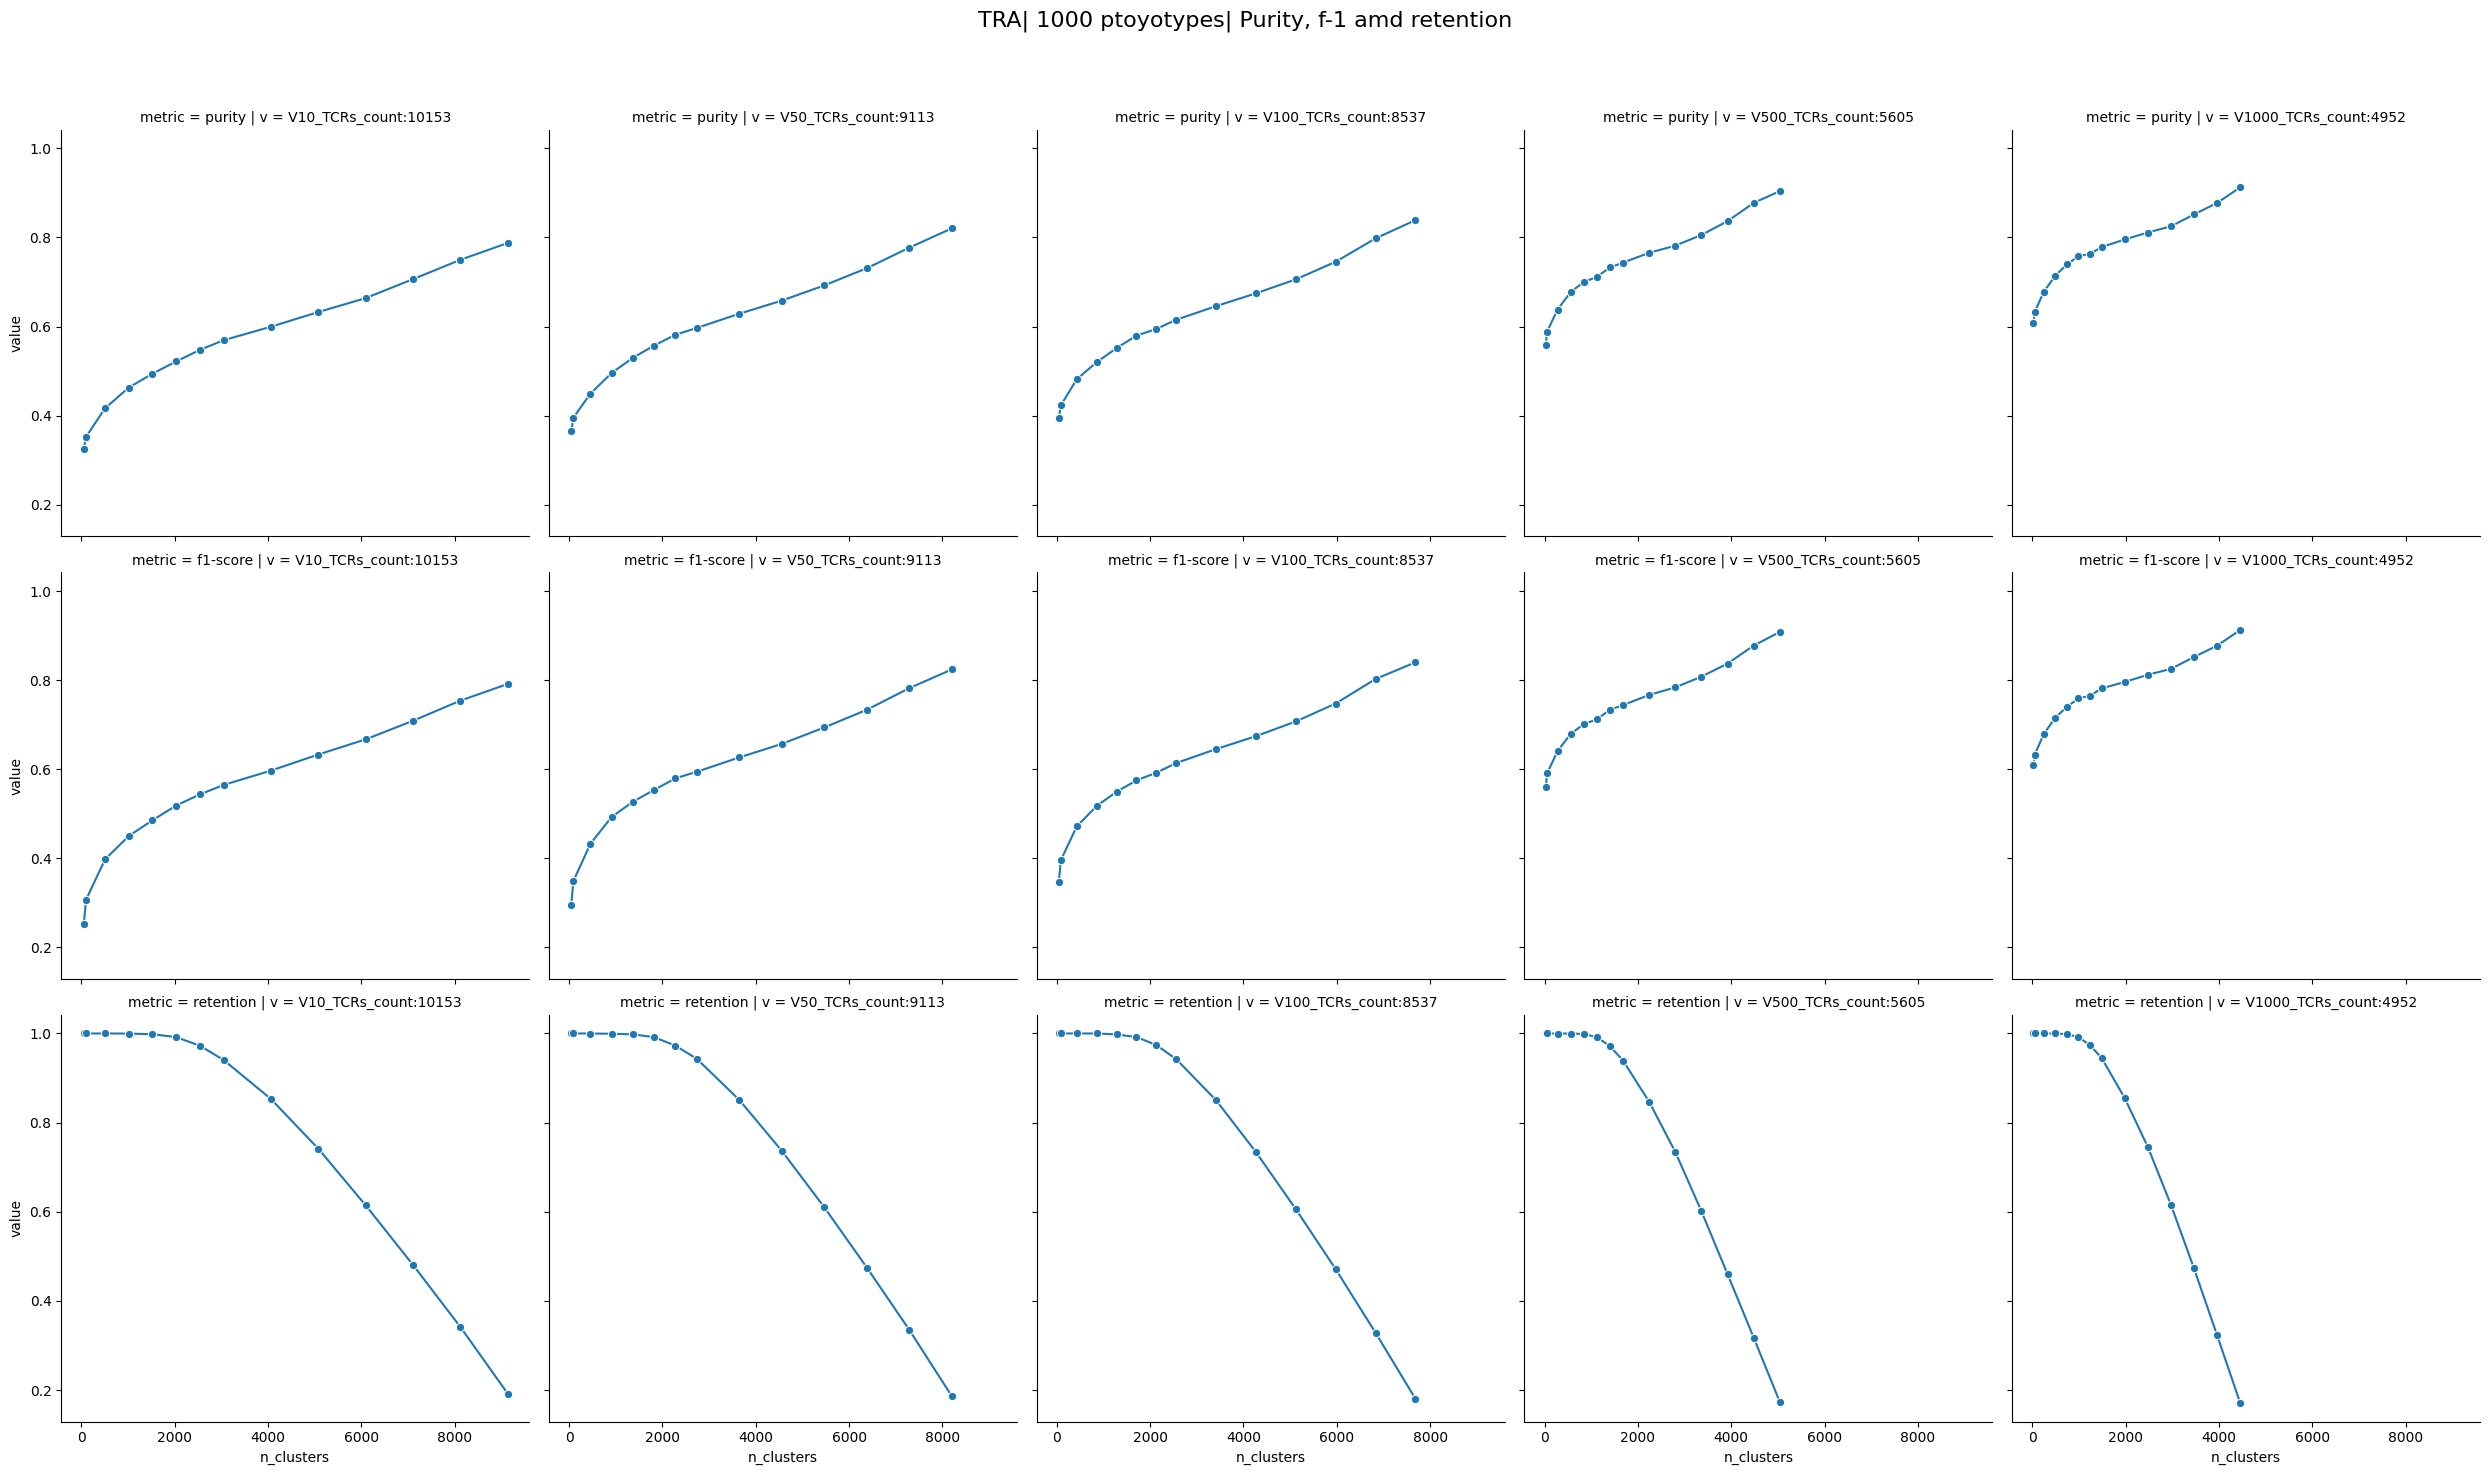

In [20]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


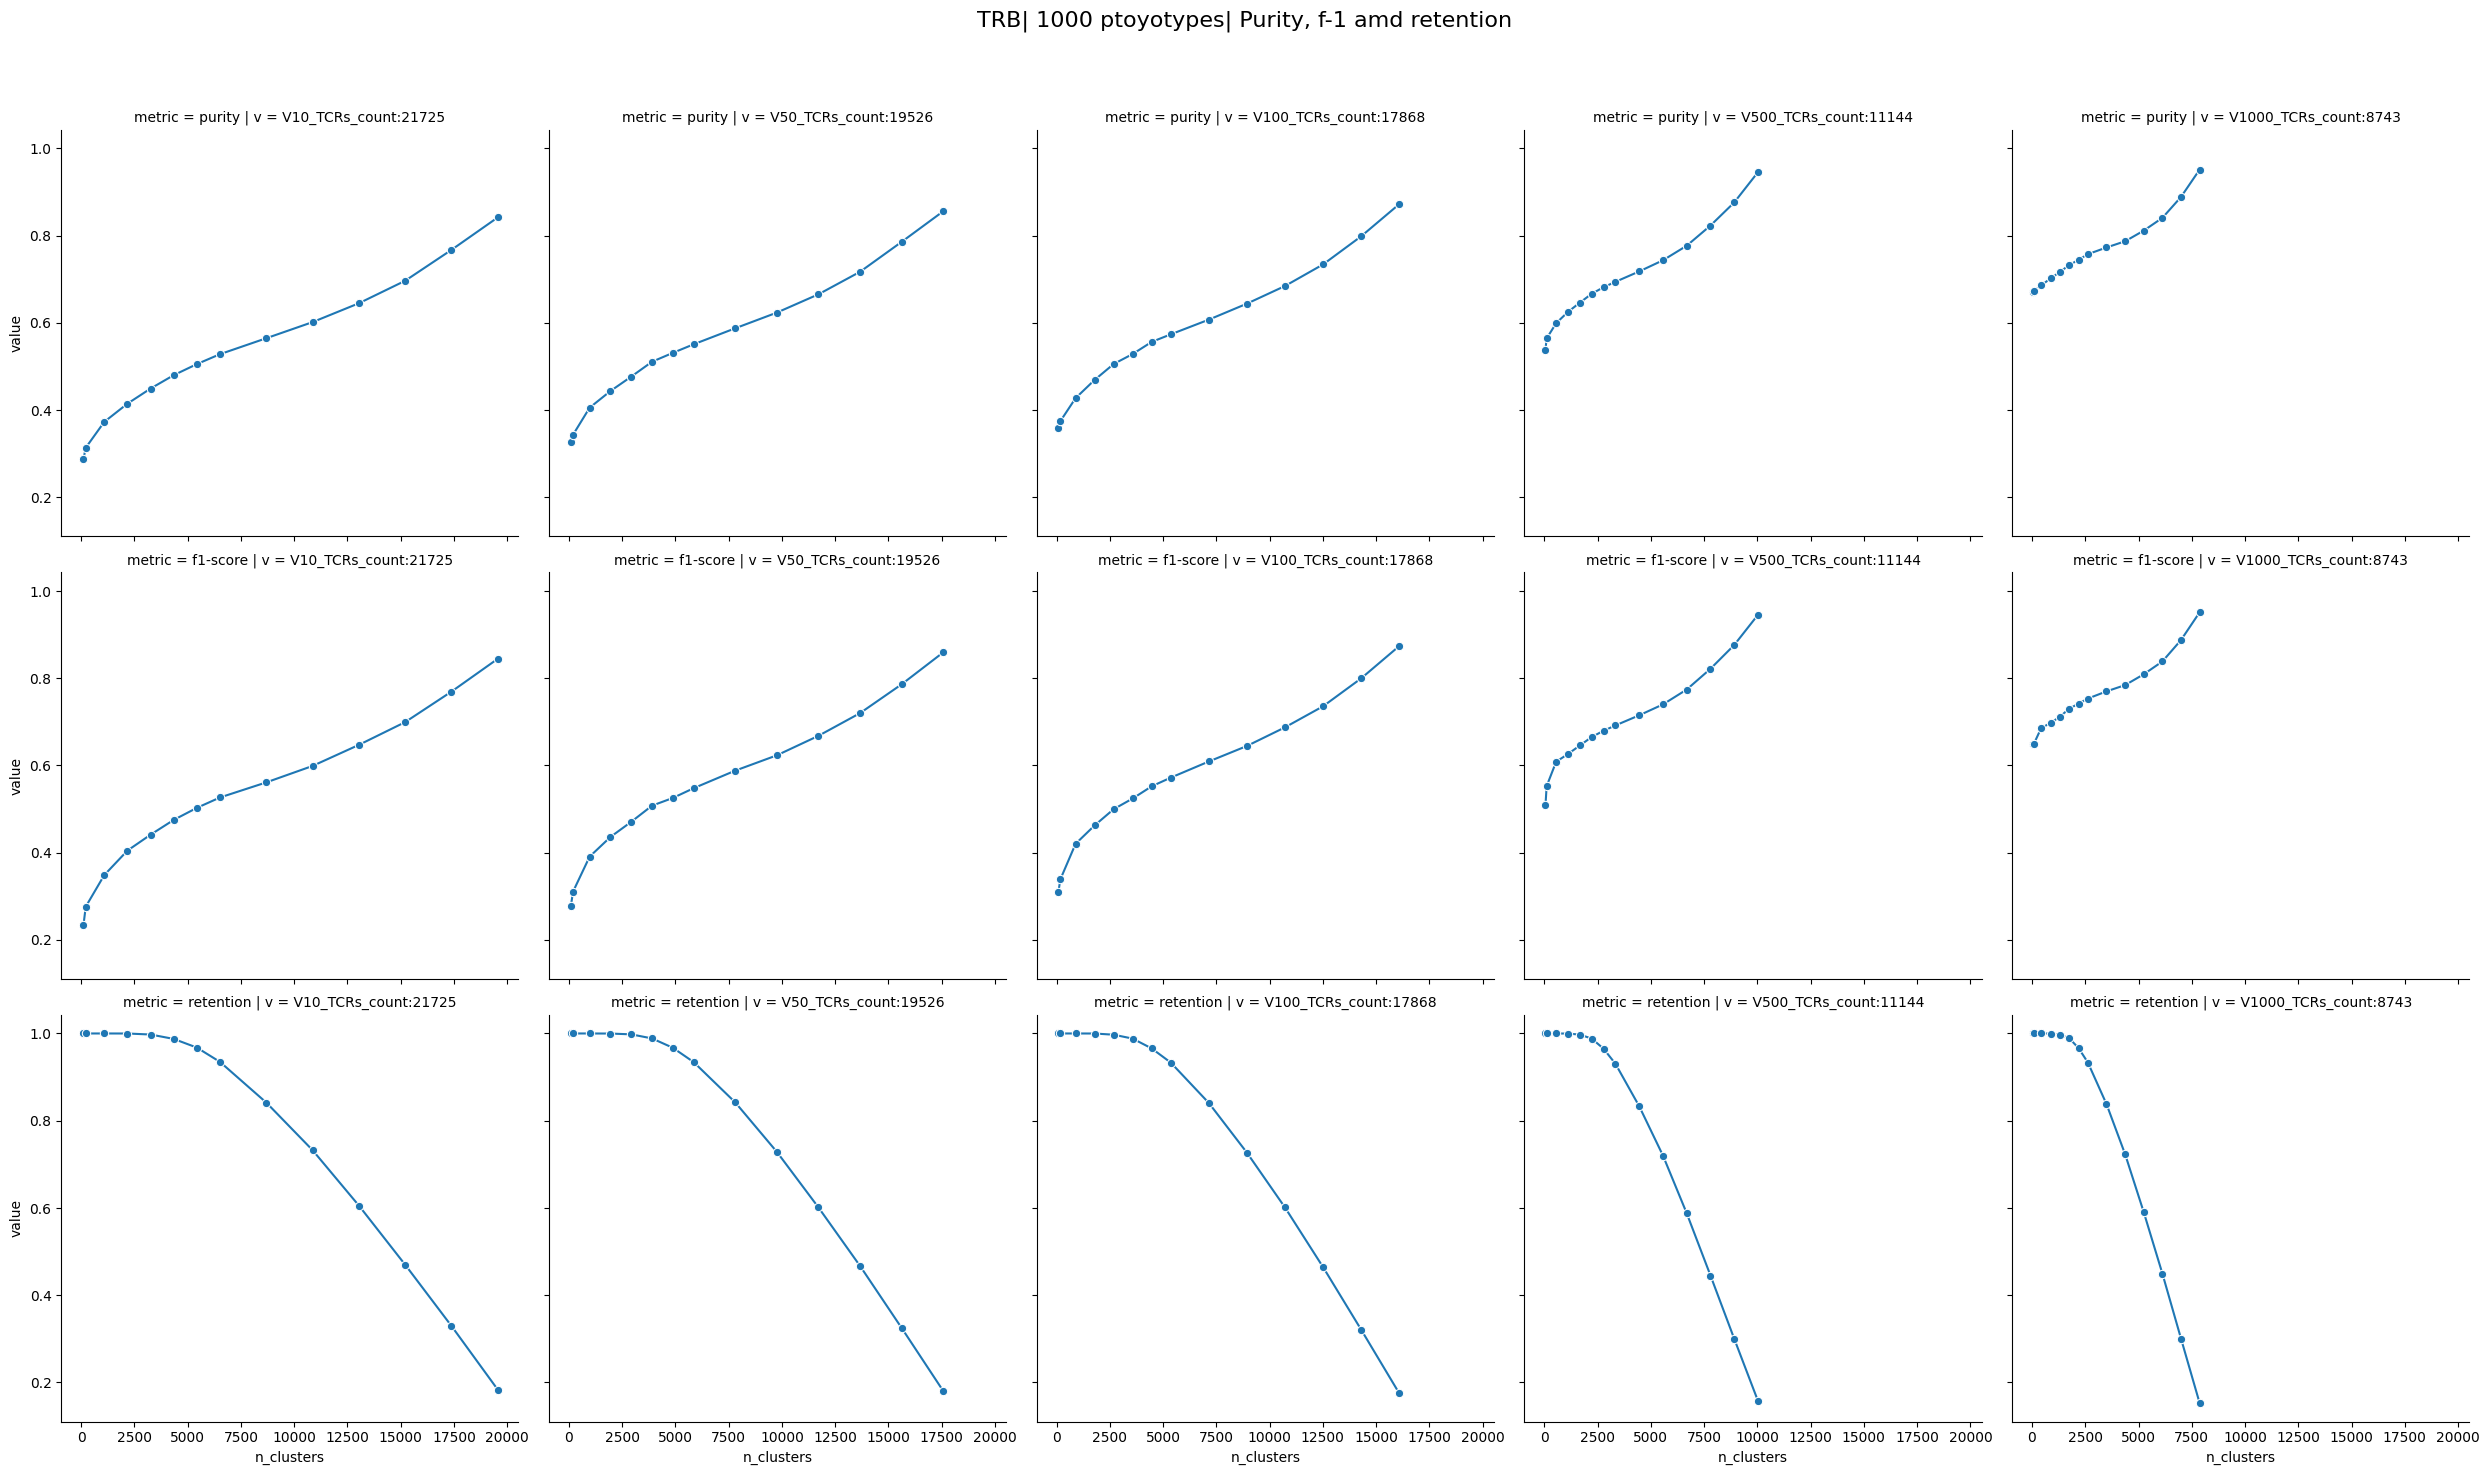

In [22]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [23]:
n_prototypes = 5000
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


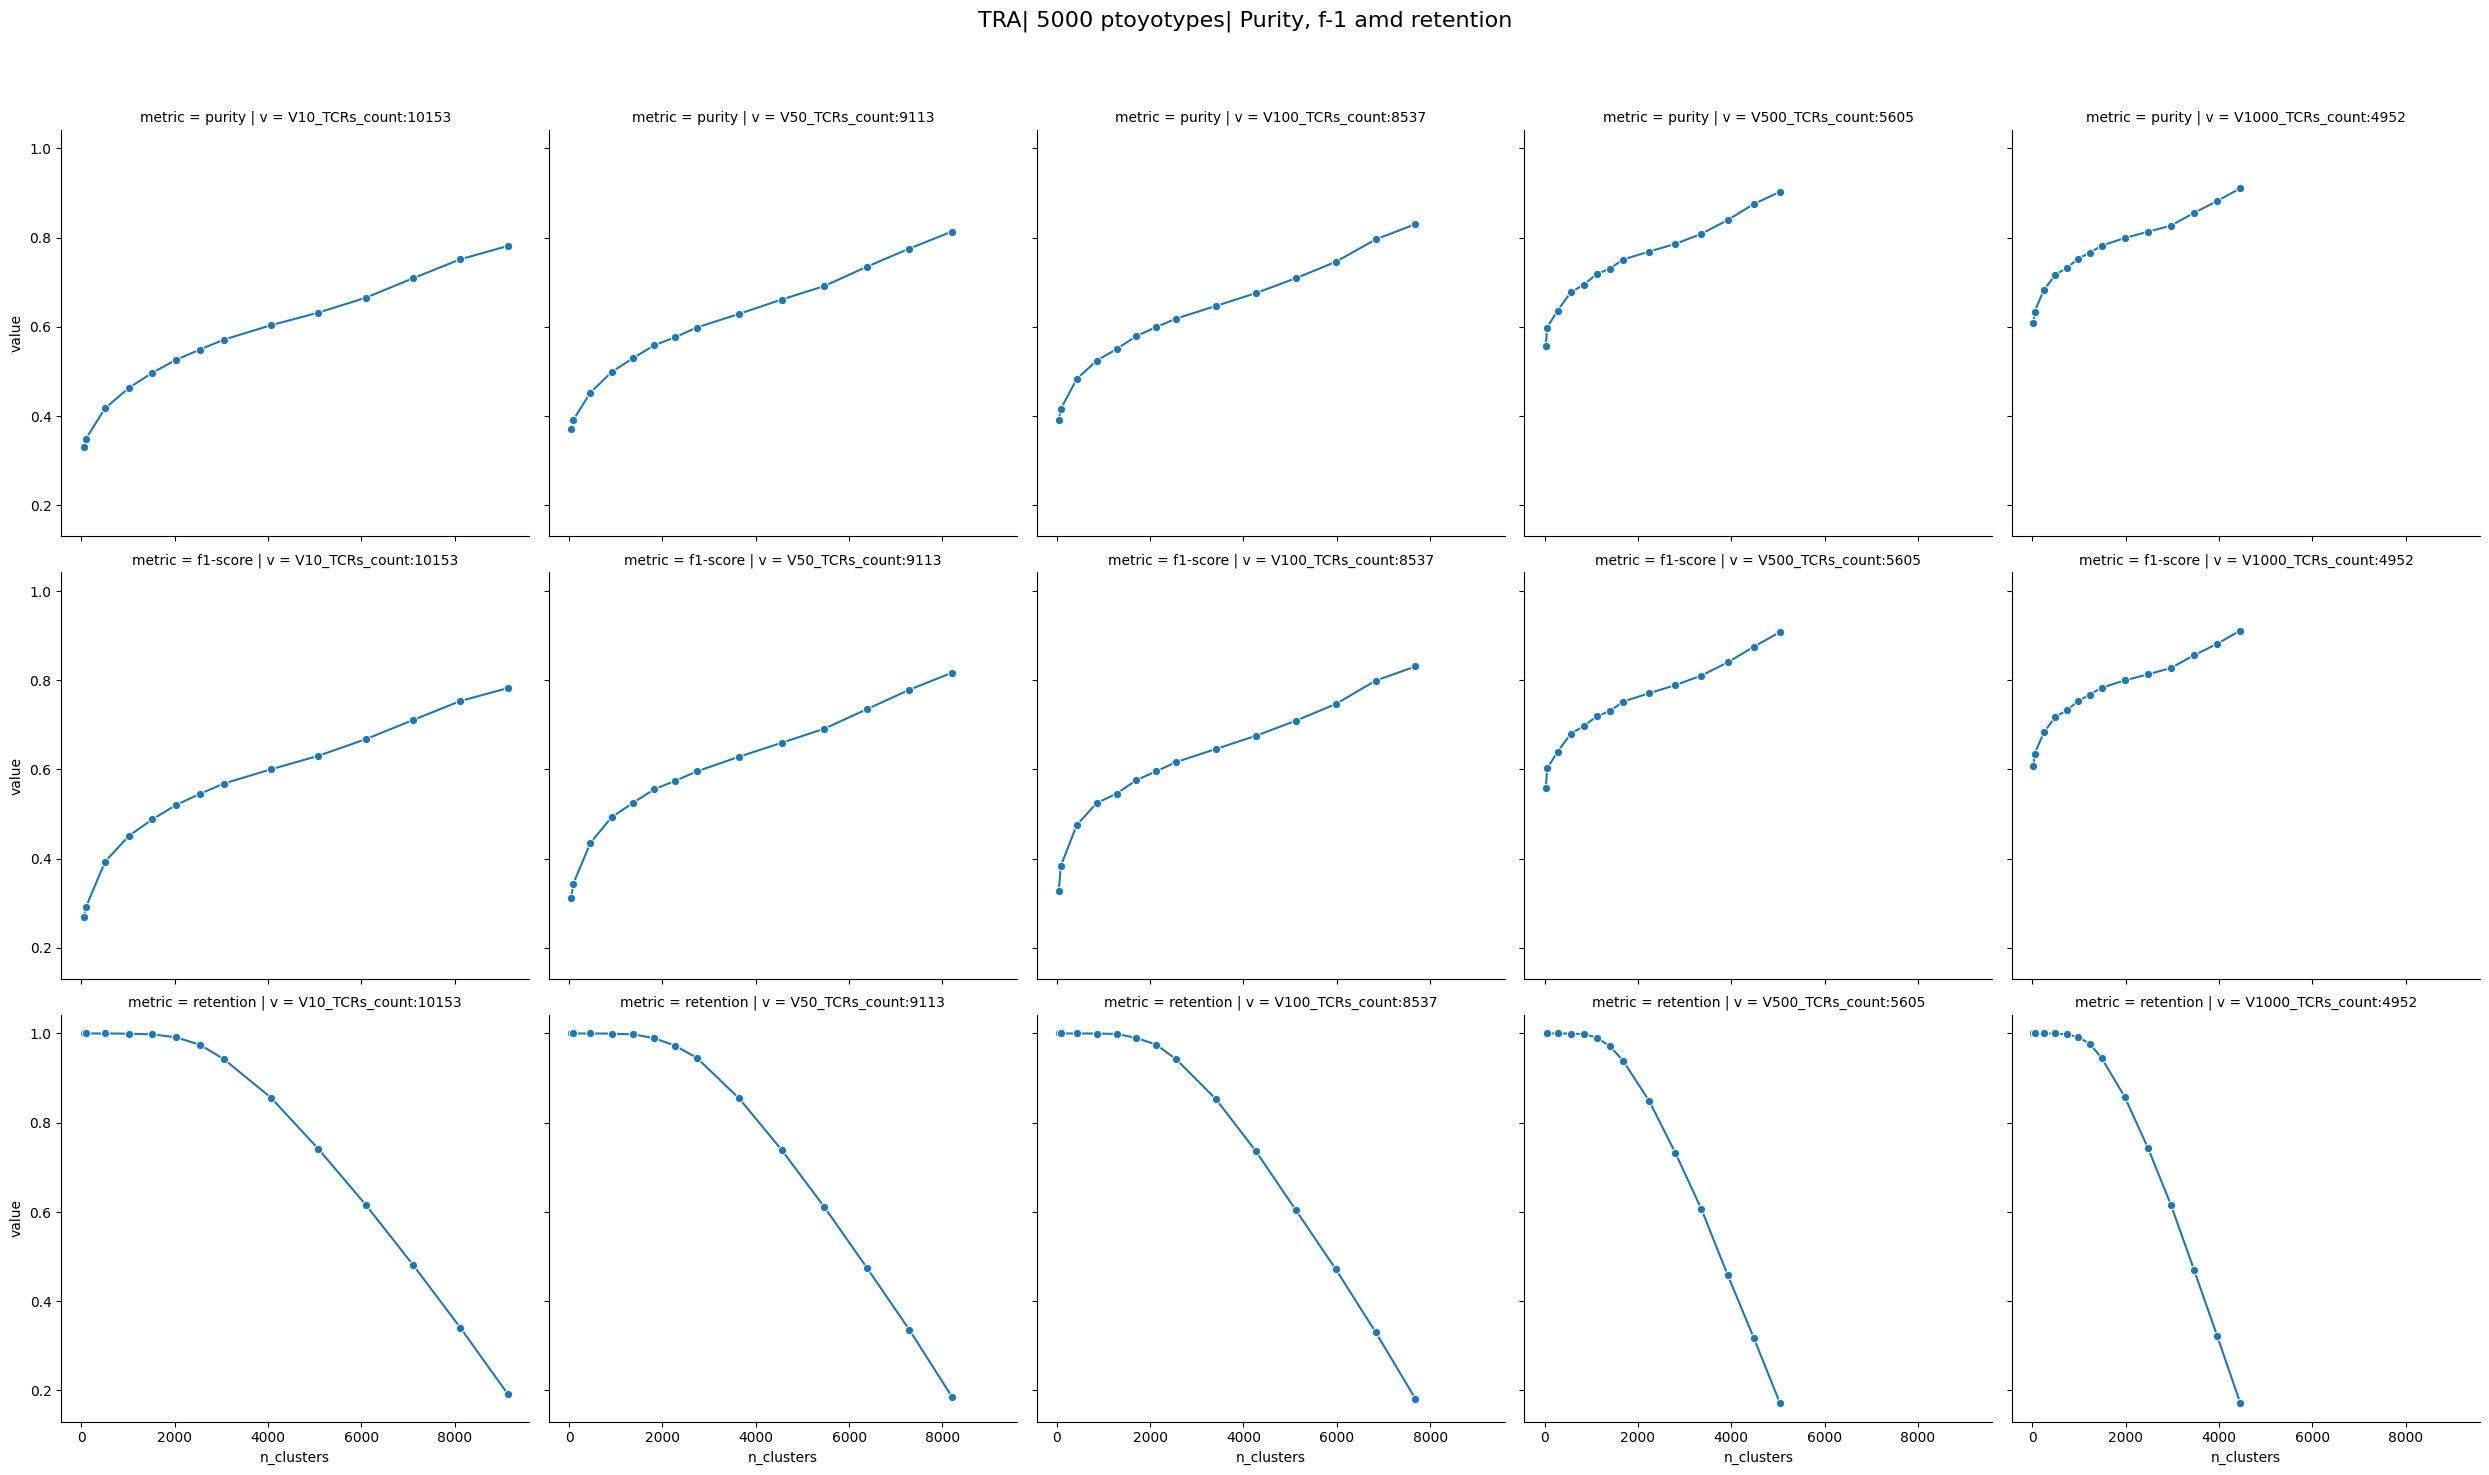

In [25]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


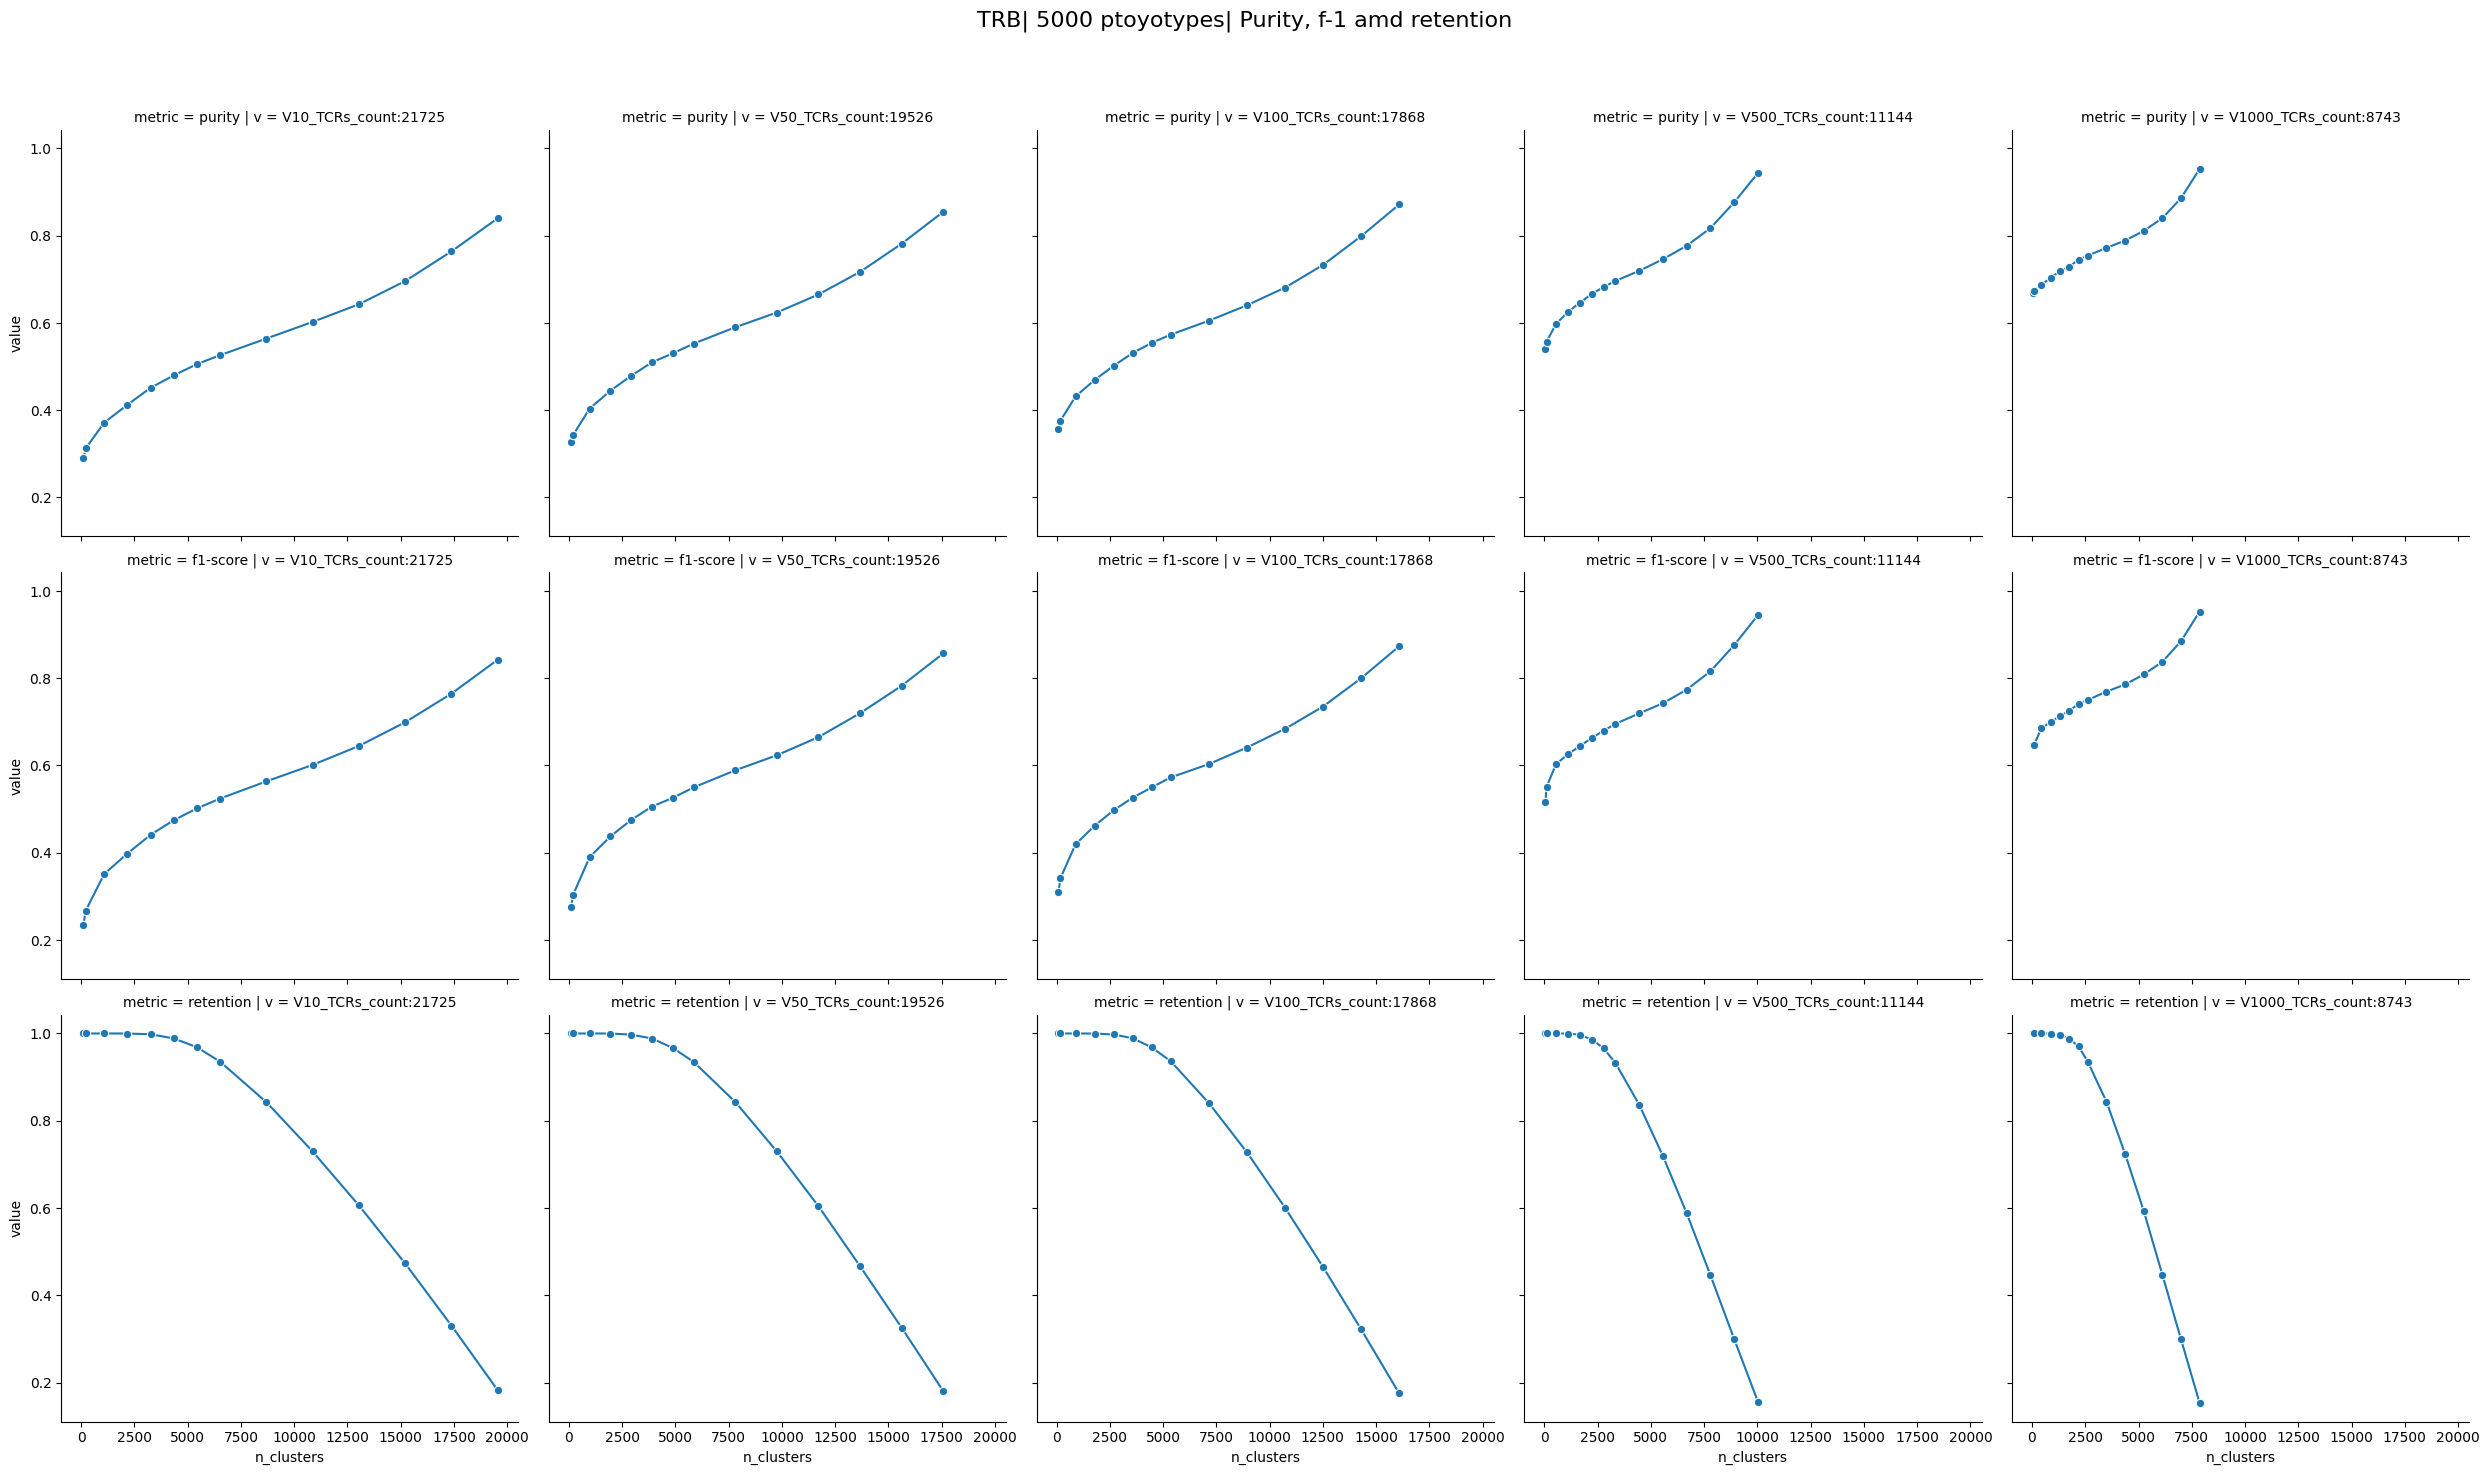

In [27]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

## compare prototypes

### Prototypes N

In [6]:

samples_n = [10,50,100,500,1000]
#samples_n = [10,1000]
prototypes_n = [100,150,300,500, 1000,2000, 3000,5000]
#prototypes_n = [100,3000]

In [7]:
method = 'dbscan_prototypes_n'
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
metrics_tcremb[method]={}

In [8]:
import time, os, sys

In [9]:
prototypes_sets = {100:{'TRA':'data/data_preped/olga_humanTRA_100.txt', 'TRB':'data/data_preped/olga_humanTRB_100.txt'}
                   ,150:{'TRA':'data/data_preped/olga_humanTRA_150.txt', 'TRB':'data/data_preped/olga_humanTRB_150.txt'}
                   ,300:{'TRA':'data/data_preped/olga_humanTRA_300.txt', 'TRB':'data/data_preped/olga_humanTRB_300.txt'}
                   ,500:{'TRA':'data/data_preped/olga_humanTRA_500.txt', 'TRB':'data/data_preped/olga_humanTRB_500.txt'}
                   ,1000:{'TRA':'data/data_preped/olga_humanTRA_1000.txt', 'TRB':'data/data_preped/olga_humanTRB_1000.txt'}
                   ,2000:{'TRA':'data/data_preped/olga_humanTRA_2000.txt', 'TRB':'data/data_preped/olga_humanTRB_2000.txt'}
                   ,3000:{'TRA':'data/data_preped/olga_humanTRA.txt', 'TRB':'data/data_preped/olga_humanTRB.txt'}
                   ,5000:{'TRA':'data/data_preped/olga_humanTRA_5000.txt', 'TRB':'data/data_preped/olga_humanTRB_5000.txt'}}

In [10]:
prototypes_sets

{100: {'TRA': 'data/data_preped/olga_humanTRA_100.txt',
  'TRB': 'data/data_preped/olga_humanTRB_100.txt'},
 150: {'TRA': 'data/data_preped/olga_humanTRA_150.txt',
  'TRB': 'data/data_preped/olga_humanTRB_150.txt'},
 300: {'TRA': 'data/data_preped/olga_humanTRA_300.txt',
  'TRB': 'data/data_preped/olga_humanTRB_300.txt'},
 500: {'TRA': 'data/data_preped/olga_humanTRA_500.txt',
  'TRB': 'data/data_preped/olga_humanTRB_500.txt'},
 1000: {'TRA': 'data/data_preped/olga_humanTRA_1000.txt',
  'TRB': 'data/data_preped/olga_humanTRB_1000.txt'},
 2000: {'TRA': 'data/data_preped/olga_humanTRA_2000.txt',
  'TRB': 'data/data_preped/olga_humanTRB_2000.txt'},
 3000: {'TRA': 'data/data_preped/olga_humanTRA.txt',
  'TRB': 'data/data_preped/olga_humanTRB.txt'},
 5000: {'TRA': 'data/data_preped/olga_humanTRA_5000.txt',
  'TRB': 'data/data_preped/olga_humanTRB_5000.txt'}}

In [11]:
## full
metrics_tcremb[method]['TRA']={}
metrics_tcremb[method]['TRB']={}
metrics_tcremb[method]['TRA_TRB']={}
chain = 'TRA'
for n_prototypes in prototypes_n:
    for i in samples_n:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v,prototypes_path=prototypes_sets[n_prototypes])
        
        chain = 'TRA'
        t0 = time.time()
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists_count(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        t1 = time.time()
        t = t1 - t0
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['time'] =t
        
        chain = 'TRB'
        t0 = time.time()
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists_count(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        t1 = time.time()
        t = t1 - t0
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['time'] =t
            
        chain = 'TRA_TRB'
        t0 = time.time()
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists_count(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        t1 = time.time()
        t = t1 - t0
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['time'] =t

TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, κ8 CAVTWGGKLIF, κ9 CAVNNARLMF]
(10551, 292)
12.521923065185547


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.918997668997669
purity:0.9166269652215341
purity:0.9102244389027432
purity:0.901937756899589
purity:0.8580287929125139
purity:0.8118382225308106
purity:0.7396549305652966
purity:0.6571099597006332
purity:0.5317841367390052
purity:0.37675317040396405
purity:0.29195653873211913
purity:0.271172203130966
purity:0.2552142586272279
purity:0.25497615984257926
purity:0.2547105561861521
purity:0.2547105561861521
purity:0.2547105561861521
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758735440931781
purity:0.9776751347190146
purity:0.9702917771883289
purity:0.9689737470167065
purity:0.9494576505885068
purity:0.9258691206543967
purity:0.8820403825717322
purity:0.8015128593040847
purity:0.6794406651549508
purity:0.4714163090128755
purity:0.3359838212988923
purity:0.2830619937444863
purity:0.271240721901963
purity:0.23333456712440315
purity:0.2330308396045448
purity:0.2330702272056654
purity:0.23296208880365835
purity:0.23294490744155175
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAV

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.9885714285714285
purity:0.9904458598726115
purity:0.9895833333333334
purity:0.9910071942446043
purity:0.9890560875512996
purity:0.9823204419889503
purity:0.9831302717900656
purity:0.9826446280991735
purity:0.9811320754716981
purity:0.9760981912144703
purity:0.9715639810426541
purity:0.9601507808292946
purity:0.8300622307324078
purity:0.7696058512799675
purity:0.6358439811701412
purity:0.45857104047813096
purity:0.3246478873239437
purity:0.226524064171123
purity:0.19930498773507768
purity:0.19212218649517684
purity:0.16354581673306773
purity:0.1621353443143481
purity:0.16121356335514575
purity:0.15959555908009515
purity:0.15959555908009515
purity:0.15959555908009515
purity:0.15959555908009515
purity:0.15959555908009515
purity:0.15959555908009515
purity:0.15959555908009515
purity:0.15959555908009515
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLG

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9388753056234719
purity:0.9366834170854271
purity:0.9309282886053674
purity:0.922090112640801
purity:0.878610002347969
purity:0.8353488372093023
purity:0.7648398360406862
purity:0.690227644321469
purity:0.5642603797204256
purity:0.4077167498865184
purity:0.31553684210526317
purity:0.2909389093890939
purity:0.27492471718076017
purity:0.27356881851400733
purity:0.2733030204611887
purity:0.2733030204611887
purity:0.2733030204611887
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9788401253918495
purity:0.9759168035030104
purity:0.9741803278688524
purity:0.9566495224099927
purity:0.9339174881343556
purity:0.895127875410773
purity:0.8213695004961958
purity:0.7089595615710371
purity:0.5062769464874461
purity:0.36542847007550805
purity:0.3084485407066052
purity:0.2562671808968941
purity:0.2531482599074633
purity:0.2530048076923077
purity:0.2530839474527395
purity:0.25296331891718726
purity:0.25294306078321455
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF,

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.9881656804733728
purity:0.9902597402597403
purity:0.9917355371900827
purity:0.9943609022556391
purity:0.9914772727272727
purity:0.984936268829664
purity:0.9851190476190477
purity:0.986013986013986
purity:0.9861431870669746
purity:0.9827705031013094
purity:0.9780839073262367
purity:0.9728323699421966
purity:0.8424621804903495
purity:0.8006386861313869
purity:0.6960093896713615
purity:0.5298676138198256
purity:0.3859304932735426
purity:0.2736040609137056
purity:0.23243503368623677
purity:0.22164705882352942
purity:0.18885521100489625
purity:0.186672858137915
purity:0.18622448979591838
purity:0.18428372739916551
purity:0.18428372739916551
purity:0.1842410196987254
purity:0.1842410196987254
purity:0.1842410196987254
purity:0.1842410196987254
purity:0.1842410196987254
purity:0.1842410196987254
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF,

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9405815423514539
purity:0.9397590361445783
purity:0.9354986276303752
purity:0.9290407358738502
purity:0.8873694679264048
purity:0.8441635394035157
purity:0.774251012145749
purity:0.7048387096774194
purity:0.5877046441697293
purity:0.4301054464544839
purity:0.33339288904770414
purity:0.3078458600937337
purity:0.29092787054570496
purity:0.2891845493562232
purity:0.28890224015106
purity:0.28890224015106
purity:0.28890224015106
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALAS

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9835069444444444
purity:0.9797619047619047
purity:0.9773232547799022
purity:0.9623306233062331
purity:0.9405099150141643
purity:0.9034253092293054
purity:0.8372064428870035
purity:0.7300545437736896
purity:0.545781095929004
purity:0.393847535646121
purity:0.33629601004733845
purity:0.27949557958982185
purity:0.27591958563778424
purity:0.2757446065158529
purity:0.27586658517419016
purity:0.2757311217808817
purity:0.2757070530726257
purity:0.27569502029415616
purity:0.27569502029415616
purity:0.27569502029415616
purity:0.27569502029415616
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAV

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.9869281045751634
purity:0.9890909090909091
purity:0.9907407407407407
purity:0.9937369519832986
purity:0.9920760697305864
purity:0.9870298313878081
purity:0.9866071428571429
purity:0.9874638379942141
purity:0.9870801033591732
purity:0.9860788863109049
purity:0.9810791871058164
purity:0.9736334405144694
purity:0.95
purity:0.8022657054582905
purity:0.6861281826163301
purity:0.5769373377827215
purity:0.43481053307642903
purity:0.3048283885980221
purity:0.26361894333424585
purity:0.24933119315141786
purity:0.20975868469901882
purity:0.20707871104067618
purity:0.20668773038441285
purity:0.20441988950276244
purity:0.2041031036296686
purity:0.20404943465684985
purity:0.20404943465684985
purity:0.20404943465684985
purity:0.20399579390115669
purity:0.20399579390115669
purity:0.20399579390115669
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9520219328307059
purity:0.9517241379310345
purity:0.9497262319561971
purity:0.9469090909090909
purity:0.911431805319751
purity:0.8836720392431675
purity:0.8191845578097302
purity:0.7591978786874378
purity:0.6730956014985431
purity:0.5518362432269717
purity:0.4044795783926219
purity:0.37526404731727925
purity:0.35067778936392074
purity:0.35036420395421436
purity:0.350187265917603
purity:0.350187265917603
purity:0.350187265917603
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9878787878787879
purity:0.9879759519038076
purity:0.9864389753892516
purity:0.9768180374722134
purity:0.9666584341812793
purity:0.9404978749241044
purity:0.9028712059064807
purity:0.8237789203084833
purity:0.7110470319180671
purity:0.5193187194448825
purity:0.451741558096251
purity:0.4319497775339794
purity:0.37023689962781353
purity:0.3698774696605499
purity:0.3699713064355566
purity:0.36984777517564404
purity:0.36980447254419857
purity:0.3697828250307323
purity:0.3697611800515102
purity:0.3697611800515102
purity:0.3697611800515102
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.9925373134328358
purity:0.992
purity:0.9932432432432432
purity:0.9954954954954955
purity:0.996415770609319
purity:0.9895209580838323
purity:0.9880794701986755
purity:0.9885189437428243
purity:0.9887063655030801
purity:0.9886578449905482
purity:0.9886956521739131
purity:0.9868744872846595
purity:0.9805900621118012
purity:0.8145219266714594
purity:0.7876844130853111
purity:0.7025611175785798
purity:0.6388888888888888
purity:0.5499049429657795
purity:0.4178321678321678
purity:0.380669775328529
purity:0.35726141078838175
purity:0.3049031726411207
purity:0.30295566502463056
purity:0.3002867677181483
purity:0.2995090016366612
purity:0.2995090016366612
purity:0.29938650306748466
purity:0.29938650306748466
purity:0.29938650306748466
purity:0.2992641046606705
purity:0.2992641046606705
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGG

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9679144385026738
purity:0.9663265306122449
purity:0.9683794466403162
purity:0.9657338663620788
purity:0.9450171821305842
purity:0.9218366631615843
purity:0.8942873969375736
purity:0.8418491484184915
purity:0.7706128967857856
purity:0.6612848974100235
purity:0.5471052239916654
purity:0.49745547073791346
purity:0.46515172509352914
purity:0.4646604086140254
purity:0.46446805574720573
purity:0.46446805574720573
purity:0.46446805574720573
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9890710382513661
purity:0.9900383141762452
purity:0.9895165987186954
purity:0.9819786686281721
purity:0.9756532066508313
purity:0.9540867810292634
purity:0.9240293809024134
purity:0.8726754900318311
purity:0.7960500329163923
purity:0.6506784474597664
purity:0.5683853577949743
purity:0.4772388936770352
purity:0.4689613708101608
purity:0.4679001337494427
purity:0.46798102579306255
purity:0.46802993257760983
purity:0.46802993257760983
purity:0.4679952585568232
purity:0.4679605896733091
purity:0.4679605896733091
purity:0.4679605896733091
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWG

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.991869918699187
purity:0.9958677685950413
purity:0.9965753424657534
purity:0.9975903614457832
purity:0.998019801980198
purity:0.992818671454219
purity:0.9900662251655629
purity:0.9906976744186047
purity:0.9912280701754386
purity:0.9917127071823204
purity:0.9896640826873385
purity:0.9889162561576355
purity:0.9811764705882353
purity:0.9693318729463308
purity:0.9516129032258065
purity:0.9109528049866429
purity:0.8077226162332545
purity:0.757213230119634
purity:0.6716417910447762
purity:0.629379225568531
purity:0.5336509827278142
purity:0.5155425219941349
purity:0.44638694638694637
purity:0.4445734184561811
purity:0.4437354988399072
purity:0.441415313225058
purity:0.44115942028985505
purity:0.44115942028985505
purity:0.44115942028985505
purity:0.44115942028985505
purity:0.44115942028985505
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9193168433451119
purity:0.9200187090739008
purity:0.9153175591531756
purity:0.909495077802477
purity:0.8701637787799668
purity:0.8388357100996289
purity:0.7943502824858757
purity:0.7453483634388157
purity:0.6656668204891555
purity:0.5639876506324071
purity:0.39844646482478596
purity:0.3363547280744733
purity:0.28866703065283517
purity:0.2737558290650562
purity:0.26481973434535105
purity:0.2633850814085574
purity:0.26207053125472984
purity:0.2549375709421112
purity:0.2549375709421112
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNE

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9759136212624585
purity:0.9764419171405362
purity:0.9774480712166173
purity:0.9681093394077449
purity:0.9572649572649573
purity:0.9410241083881251
purity:0.919736207173878
purity:0.8826364465285919
purity:0.8136600625651721
purity:0.7273255813953489
purity:0.6148760330578512
purity:0.43828053813582035
purity:0.328107299832344
purity:0.25205690430835326
purity:0.23722419115125185
purity:0.23374785911087945
purity:0.23306964364926808
purity:0.2329631406117404
purity:0.23297927270044996
purity:0.2329534978058045
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
purity:0.19266934621483092
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAV

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.9930555555555556
purity:0.992619926199262
purity:0.9886685552407932
purity:0.9923371647509579
purity:0.9908675799086758
purity:0.9875156054931336
purity:0.9828326180257511
purity:0.9830508474576272
purity:0.985
purity:0.9848024316109423
purity:0.9833333333333333
purity:0.9794608472400513
purity:0.9757252812314979
purity:0.96126568466994
purity:0.9334647609659931
purity:0.7936021034180544
purity:0.7144478063540091
purity:0.600128990648178
purity:0.44009914624070506
purity:0.3504684122027384
purity:0.27838017260455855
purity:0.245956731779038
purity:0.19959349593495934
purity:0.19462279293739967
purity:0.19218500797448165
purity:0.18603263032232392
purity:0.18557520365587124
purity:0.18464894882982943
purity:0.18262938726948244
purity:0.18140364789849325
purity:0.15979381443298968
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGG

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9386126457949663
purity:0.9399014778325123
purity:0.934419014084507
purity:0.9283792871553463
purity:0.8910741301059002
purity:0.8602665556018325
purity:0.8200902151283831
purity:0.7729546792230724
purity:0.6960907944514502
purity:0.5967462039045554
purity:0.42189445455416147
purity:0.3612113742406902
purity:0.30608476710029375
purity:0.29367358660868137
purity:0.2839335180055402
purity:0.2826033964410498
purity:0.28120178643930166
purity:0.2735466060409224
purity:0.2735466060409224
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9771380186282811
purity:0.9776490066225165
purity:0.9782082324455206
purity:0.9745523091423186
purity:0.9643057897695334
purity:0.948614929160499
purity:0.9282657079267249
purity:0.8949509116409538
purity:0.8311438278595696
purity:0.7602814841893621
purity:0.6497476779053609
purity:0.47639891162900744
purity:0.35614253675554447
purity:0.2756795231104586
purity:0.258497465303748
purity:0.25384739996760086
purity:0.25312186307970286
purity:0.2529850148249058
purity:0.2529937122031319
purity:0.25295318944460016
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
purity:0.2092092092092092
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.9929577464788732
purity:0.9923954372623575
purity:0.9911242603550295
purity:0.994
purity:0.993660855784469
purity:0.9895697522816167
purity:0.9852104664391353
purity:0.9850746268656716
purity:0.986784140969163
purity:0.9879032258064516
purity:0.9852941176470589
purity:0.9836623553437712
purity:0.9818409517845961
purity:0.9709302325581395
purity:0.9529663281667557
purity:0.9119922630560928
purity:0.7572354211663067
purity:0.6744704570791528
purity:0.5283687943262412
purity:0.41975658080951034
purity:0.34534064212999216
purity:0.28546669967813815
purity:0.23471589546871255
purity:0.22402826855123675
purity:0.22230014025245443
purity:0.21495109455053563
purity:0.21403671856844061
purity:0.21136890951276102
purity:0.20978210477515066
purity:0.20973348783314022
purity:0.18447276940903823
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9406130268199234
purity:0.9441598360655737
purity:0.9386165826843793
purity:0.9320661738824357
purity:0.90018631887144
purity:0.8686757589089309
purity:0.8302548947173993
purity:0.7839535248861673
purity:0.7091494499597532
purity:0.6162212194839755
purity:0.4378317680685994
purity:0.3805376041959352
purity:0.3320868945868946
purity:0.3097552508245096
purity:0.30027571945545406
purity:0.29874591994502664
purity:0.29725321888412015
purity:0.2891597287786456
purity:0.2891597287786456
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASS

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9821260583254939
purity:0.9825688073394495
purity:0.9832663989290495
purity:0.9779825908858167
purity:0.969173859432799
purity:0.954908407703147
purity:0.9359071890452644
purity:0.9057665260196905
purity:0.8420986093552465
purity:0.7762088581877286
purity:0.6769807018972397
purity:0.5250360466640451
purity:0.38568916245328644
purity:0.3006014964056922
purity:0.28180867033616885
purity:0.27717607532823485
purity:0.27612626417407293
purity:0.2757686932215234
purity:0.2757551946918107
purity:0.2757431577109433
purity:0.2757070530726257
purity:0.27569502029415616
purity:0.27569502029415616
purity:0.27569502029415616
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
purity:0.22803648583773403
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFG

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.9920634920634921
purity:0.9916317991631799
purity:0.9904458598726115
purity:0.9932735426008968
purity:0.9929078014184397
purity:0.9897058823529412
purity:0.9872448979591837
purity:0.9865016872890888
purity:0.9882352941176471
purity:0.9892183288409704
purity:0.9885151763740772
purity:0.985485103132162
purity:0.9832635983263598
purity:0.9778212654924984
purity:0.9524940617577197
purity:0.9169363538295577
purity:0.7612085769980507
purity:0.6890792291220557
purity:0.55675474506885
purity:0.45490068381634646
purity:0.3773301262778112
purity:0.3178845607051464
purity:0.26260964912280704
purity:0.25100240577385724
purity:0.24787685774946921
purity:0.2462962962962963
purity:0.23791919725376287
purity:0.2375559652357124
purity:0.23467508550381477
purity:0.2329739679200631
purity:0.2043123849592427
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLI

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9533287577213452
purity:0.9554945054945055
purity:0.952263779527559
purity:0.948021722265322
purity:0.92093305059073
purity:0.8973637061684157
purity:0.8699313095501884
purity:0.8317381316998469
purity:0.7629568106312292
purity:0.6952684126754449
purity:0.509215711198678
purity:0.45603058741744873
purity:0.4105412174670587
purity:0.3752244165170557
purity:0.36486204013377926
purity:0.3621120599875026
purity:0.36031630423473104
purity:0.3504993757802747
purity:0.3504993757802747
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875647668393782
purity:0.9878787878787879
purity:0.9896296296296296
purity:0.9857224443175329
purity:0.9822253821542837
purity:0.9753914988814317
purity:0.9638947123223853
purity:0.9448426921545201
purity:0.9026845637583892
purity:0.8639077905846411
purity:0.7898484152503445
purity:0.6892913826906918
purity:0.5033854774690637
purity:0.40548448557430594
purity:0.3784607727244447
purity:0.3715360726230291
purity:0.370433554914995
purity:0.3700099654141509
purity:0.36984777517564404
purity:0.3698261225923541
purity:0.3697828250307323
purity:0.3697828250307323
purity:0.3697611800515102
purity:0.3697611800515102
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
purity:0.3058417232498244
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.990909090909091
purity:0.990909090909091
purity:0.993006993006993
purity:0.9950980392156863
purity:0.9960474308300395
purity:0.995
purity:0.9895209580838323
purity:0.9880478087649402
purity:0.9893867924528302
purity:0.9903846153846154
purity:0.991106719367589
purity:0.9899175068744271
purity:0.9896103896103896
purity:0.9875
purity:0.9850275807722616
purity:0.9755374351371386
purity:0.8131944444444444
purity:0.7815656565656566
purity:0.7236533957845434
purity:0.6654314452091054
purity:0.5898931000971818
purity:0.5567343173431735
purity:0.42555994729907776
purity:0.38360237892948174
purity:0.37191809444212287
purity:0.3667905824039653
purity:0.3626644736842105
purity:0.3497536945812808
purity:0.3463114754098361
purity:0.34343020875972163
purity:0.29938650306748466
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9683794466403162
purity:0.9710982658959537
purity:0.9675324675324676
purity:0.9645645645645645
purity:0.9484018264840183
purity:0.9368461836497481
purity:0.916083916083916
purity:0.8901750423489554
purity:0.8498168498168498
purity:0.799501350509038
purity:0.7060301507537688
purity:0.6018222506393862
purity:0.5520295202952029
purity:0.5030431705590941
purity:0.48380369803976087
purity:0.48035961272475797
purity:0.47784679089026916
purity:0.4648820201462674
purity:0.4648820201462674
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884659746251442
purity:0.9886234357224118
purity:0.9904596704249783
purity:0.9888888888888889
purity:0.9864920180106427
purity:0.9821664464993395
purity:0.9727681078046042
purity:0.9583539910758553
purity:0.9219244566364212
purity:0.8958445763626551
purity:0.8461538461538461
purity:0.7747321206080239
purity:0.5944861639748997
purity:0.5180658873538788
purity:0.4817190506735087
purity:0.4697500761962816
purity:0.4684234099731263
purity:0.4683487940630798
purity:0.4680945675535463
purity:0.4680646117368109
purity:0.4679952585568232
purity:0.4679952585568232
purity:0.4679605896733091
purity:0.4679605896733091
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
purity:0.38706570857100525
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:0.9904761904761905
purity:0.9948717948717949
purity:0.9960474308300395
purity:0.9973890339425587
purity:0.9978858350951374
purity:0.9962546816479401
purity:0.9894736842105263
purity:0.9901315789473685
purity:0.9906976744186047
purity:0.9911764705882353
purity:0.9915373765867419
purity:0.9919028340080972
purity:0.9896774193548387
purity:0.9889162561576355
purity:0.98698224852071
purity:0.9774266365688488
purity:0.9657387580299786
purity:0.9366471734892787
purity:0.9078467153284672
purity:0.8225941422594142
purity:0.777610818933133
purity:0.7364074328974536
purity:0.685489166119501
purity:0.6525
purity:0.6274984857662023
purity:0.6130952380952381
purity:0.5248974809607498
purity:0.51316559391457
purity:0.5110465116279069
purity:0.5104529616724739
purity:0.4443155452436195
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9196319018404908
purity:0.9176672384219554
purity:0.9223347805113362
purity:0.9147771696637998
purity:0.9017656500802568
purity:0.8855103120042306
purity:0.8599741490736751
purity:0.825592240253684
purity:0.8062783280174585
purity:0.7771282973621103
purity:0.7399198931909212
purity:0.7035242824270316
purity:0.6374091352934794
purity:0.5637524557956778
purity:0.4796416938110749
purity:0.38278201865988126
purity:0.3201779215527699
purity:0.29511927181418707
purity:0.2844615384615385
purity:0.27116190476190477
purity:0.2656854563386693
purity:0.2616072104824661
purity:0.26163979105155577
purity:0.2617119503519261
purity:0.26169214469502045
purity:0.2549375709421112
purity:0.2547105561861521
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
purity:0.2546912832929782
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLN

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.976326530612245
purity:0.9768875192604006
purity:0.9701822197680839
purity:0.9634464751958225
purity:0.9525483304042179
purity:0.9425238600212089
purity:0.9264061678640266
purity:0.9072287368264806
purity:0.8772489473012632
purity:0.8190210390725633
purity:0.7657861407635245
purity:0.6872371338992124
purity:0.5973713319018804
purity:0.4938823397955193
purity:0.3977731317158555
purity:0.33967641513570396
purity:0.3061522842639594
purity:0.29187177797589053
purity:0.2723296761301512
purity:0.2337860465116279
purity:0.2332568637608229
purity:0.23306633199217452
purity:0.233050534857986
purity:0.23296208880365835
purity:0.23294490744155175
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.23293631771083004
purity:0.23293631771083004
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKL

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9940828402366864
purity:0.9897610921501706
purity:0.98989898989899
purity:0.9920948616600791
purity:0.9918300653594772
purity:0.9902506963788301
purity:0.9876695437731196
purity:0.9822616407982262
purity:0.9840478564307079
purity:0.9845173041894353
purity:0.9831791421362489
purity:0.9837587006960556
purity:0.9803206997084548
purity:0.9806896551724138
purity:0.9765013054830287
purity:0.9763828464885022
purity:0.9718144450968879
purity:0.950974930362117
purity:0.9409282700421941
purity:0.921760391198044
purity:0.8877961555654895
purity:0.7626569461320373
purity:0.706355003652301
purity:0.6346216303994804
purity:0.5255787367819377
purity:0.40057039149598134
purity:0.3407688656858092
purity:0.2562959661243593
purity:0.2230031948881789
purity:0.21170146785197436
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9391585760517799
purity:0.9376872378669863
purity:0.9396551724137931
purity:0.9336924989639453
purity:0.921944539541253
purity:0.9046283309957924
purity:0.8819348922512609
purity:0.8473495416500598
purity:0.8297565374211001
purity:0.8028807250364136
purity:0.7653356481481481
purity:0.7339449541284404
purity:0.6672158154859967
purity:0.5988893635198633
purity:0.5142605116142311
purity:0.4117215445290287
purity:0.35143853530950303
purity:0.31865810376880177
purity:0.3058843002565588
purity:0.29061578774975433
purity:0.2853767820773931
purity:0.2807345413179491
purity:0.2807245552757696
purity:0.28079577750710516
purity:0.28079577750710516
purity:0.2735466060409224
purity:0.2733030204611887
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
purity:0.27328083137127546
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSAL

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9775374376039934
purity:0.9787234042553191
purity:0.9761227970437749
purity:0.9691767460007803
purity:0.9590813093980992
purity:0.9493387132929836
purity:0.9353456307061673
purity:0.9185585013494205
purity:0.8907620614035088
purity:0.8390817991144256
purity:0.7908496732026143
purity:0.7158312906770349
purity:0.6317835036706492
purity:0.5328544001981792
purity:0.43342274678111586
purity:0.368324657798342
purity:0.33435719373219375
purity:0.3179626025890515
purity:0.29591459659207553
purity:0.2540658629338943
purity:0.253427135678392
purity:0.2531173569624313
purity:0.2530743040256359
purity:0.25298358029635565
purity:0.25295318944460016
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.25293293293293295
purity:0.25293293293293295
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKL

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9940476190476191
purity:0.9896193771626297
purity:0.9920634920634921
purity:0.9939024390243902
purity:0.9932203389830508
purity:0.9927325581395349
purity:0.9883720930232558
purity:0.9847953216374269
purity:0.9863157894736843
purity:0.9864734299516909
purity:0.9857904085257548
purity:0.9860426929392446
purity:0.9837587006960556
purity:0.9832239241429613
purity:0.9806362378976486
purity:0.9808959156785244
purity:0.9769757311761046
purity:0.9702734839476813
purity:0.9523539421440727
purity:0.9338235294117647
purity:0.9089118660758247
purity:0.7809349220898258
purity:0.7464435146443514
purity:0.6924535456958665
purity:0.6175084175084176
purity:0.4809276777540433
purity:0.40275435637998874
purity:0.31722856384390763
purity:0.26765893037336025
purity:0.24462890625
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF,

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9417670682730924
purity:0.940809968847352
purity:0.942419440042261
purity:0.9382822615451014
purity:0.926978417266187
purity:0.9123635290646208
purity:0.8908339411621687
purity:0.8570221752903907
purity:0.8397386625672559
purity:0.8134276838108389
purity:0.7771454936942479
purity:0.7447464275707482
purity:0.6826076013088347
purity:0.6181259250825458
purity:0.538252508361204
purity:0.42940889106008795
purity:0.3698008337193145
purity:0.3404159942621481
purity:0.3219760007007095
purity:0.30803880803880807
purity:0.3016884906960717
purity:0.29679580792028176
purity:0.29675425038639874
purity:0.2968495149798266
purity:0.29688438760621405
purity:0.2891597287786456
purity:0.28890224015106
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
purity:0.28887744593202885
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9824723247232472
purity:0.9834926151172894
purity:0.980733374766936
purity:0.9731800766283525
purity:0.9649122807017544
purity:0.9552350161651331
purity:0.9414694894146949
purity:0.9260176991150443
purity:0.9021622450544395
purity:0.850936524453694
purity:0.8059057730590578
purity:0.7342545591276556
purity:0.6624168069922219
purity:0.5748313369131213
purity:0.4660976483227886
purity:0.3981234673206099
purity:0.3654166258689905
purity:0.3462216040797404
purity:0.3224271801086127
purity:0.277132894911065
purity:0.2762852259280361
purity:0.27587865011365625
purity:0.27584701362207475
purity:0.27584250043652875
purity:0.2757190869014884
purity:0.27569502029415616
purity:0.27569502029415616
purity:0.27569502029415616
purity:0.27569502029415616
purity:0.27569502029415616
purity:0.27569502029415616
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF,

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9931506849315068
purity:0.9885931558935361
purity:0.9912536443148688
purity:0.9931972789115646
purity:0.9923371647509579
purity:0.9918300653594772
purity:0.9883211678832117
purity:0.9867197875166003
purity:0.9881516587677726
purity:0.9880694143167028
purity:0.9871159563924677
purity:0.9871794871794872
purity:0.9853574504737296
purity:0.9861900893582454
purity:0.9831029185867896
purity:0.9839063643013899
purity:0.9811715481171548
purity:0.9720930232558139
purity:0.9555555555555556
purity:0.9317102137767221
purity:0.9151414309484193
purity:0.7767441860465116
purity:0.7543776620918126
purity:0.7072750753336203
purity:0.6375630578191696
purity:0.5367751060820368
purity:0.44713870029097963
purity:0.35640558591378263
purity:0.29936305732484075
purity:0.27151211361737676
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9532374100719424
purity:0.952925353059852
purity:0.9551645856980704
purity:0.9519733713742273
purity:0.9477879633320048
purity:0.9348914858096828
purity:0.9193099610461881
purity:0.8914941381890746
purity:0.8753986332574032
purity:0.8558596198036349
purity:0.8207298720842738
purity:0.7969989651604001
purity:0.7428125
purity:0.6917827694057436
purity:0.6238544121497774
purity:0.5077821011673151
purity:0.44889550188852007
purity:0.41728042211718147
purity:0.3950234942332337
purity:0.3756842105263158
purity:0.36563185951709
purity:0.3607667465360975
purity:0.35963360049963566
purity:0.359796067006555
purity:0.35986267166042446
purity:0.3504993757802747
purity:0.350187265917603
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
purity:0.3501508374076771
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6 CASSFNDE

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9878048780487805
purity:0.9884393063583815
purity:0.9882271468144044
purity:0.9835430784123911
purity:0.9812925170068028
purity:0.9740871613663133
purity:0.9672671910682568
purity:0.9591340843825933
purity:0.9425649095200629
purity:0.9089820359281438
purity:0.8776849642004774
purity:0.8374173473356671
purity:0.7756671189507011
purity:0.7101037791266889
purity:0.604558549398407
purity:0.5328028824500826
purity:0.48959901464349254
purity:0.46449590583418626
purity:0.4331272571463549
purity:0.3722470904207699
purity:0.3710647329324372
purity:0.3701138631294753
purity:0.3699320365596438
purity:0.37002986473033905
purity:0.36986943029451375
purity:0.36980447254419857
purity:0.3697611800515102
purity:0.3697611800515102
purity:0.3697611800515102
purity:0.3697611800515102
purity:0.3697611800515102
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9924812030075187
purity:0.991701244813278
purity:0.9935897435897436
purity:0.9949109414758269
purity:0.9956803455723542
purity:0.9945155393053017
purity:0.9918032786885246
purity:0.9893939393939394
purity:0.99039780521262
purity:0.9911727616645649
purity:0.9893364928909952
purity:0.990228013029316
purity:0.9905956112852664
purity:0.9891732283464567
purity:0.9887640449438202
purity:0.9872842870118075
purity:0.9860990443092963
purity:0.9849119865884325
purity:0.9846278317152104
purity:0.9826361483820047
purity:0.978013646702047
purity:0.8183139534883721
purity:0.8088737201365188
purity:0.7787096774193548
purity:0.7592931139549055
purity:0.7221905305191101
purity:0.6721398305084746
purity:0.535253227408143
purity:0.4985808893093661
purity:0.44972826086956524
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9662261380323054
purity:0.9684625492772667
purity:0.9706477732793523
purity:0.9678178963893249
purity:0.9637046307884856
purity:0.9523565573770492
purity:0.9424703891708968
purity:0.9284644194756554
purity:0.919931856899489
purity:0.9051186017478152
purity:0.8798319327731092
purity:0.862235803412274
purity:0.8342844099520658
purity:0.8013136288998358
purity:0.7359194330473704
purity:0.6747398942520894
purity:0.6087025316455696
purity:0.5637995512341062
purity:0.5296152183311716
purity:0.5008457851705667
purity:0.4876010030649206
purity:0.47751487477514876
purity:0.4770718232044199
purity:0.4772288158984267
purity:0.47730095211811785
purity:0.4648820201462674
purity:0.46446805574720573
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
purity:0.4644039735099338
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9885714285714285
purity:0.9892357373519914
purity:0.9879614767255217
purity:0.9867768595041322
purity:0.9848786311181854
purity:0.9801808066759388
purity:0.9767938931297709
purity:0.9695335669991911
purity:0.9557608167233835
purity:0.9317738791423001
purity:0.9024624855713737
purity:0.8781812012215813
purity:0.8455816721213925
purity:0.7951181511295767
purity:0.706447963800905
purity:0.636119936457506
purity:0.5919612417010587
purity:0.5644105707894955
purity:0.4836905137094233
purity:0.4731979230299328
purity:0.47049992493619575
purity:0.4681706499888318
purity:0.467947766730969
purity:0.4681639611592914
purity:0.4680646117368109
purity:0.46802993257760983
purity:0.4679605896733091
purity:0.4679605896733091
purity:0.4679605896733091
purity:0.4679605896733091
purity:0.4679605896733091
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVN

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9920634920634921
purity:0.99581589958159
purity:0.9965986394557823
purity:0.9973958333333334
purity:0.9976851851851852
purity:0.9959919839679359
purity:0.9924812030075187
purity:0.9893992932862191
purity:0.9898132427843803
purity:0.9903069466882067
purity:0.9906396255850234
purity:0.9895522388059701
purity:0.9884393063583815
purity:0.9887323943661972
purity:0.9877551020408163
purity:0.9879839786381842
purity:0.9869791666666666
purity:0.9874371859296482
purity:0.9865030674846625
purity:0.9855421686746988
purity:0.9801169590643275
purity:0.9741573033707865
purity:0.9614973262032086
purity:0.9489274770173647
purity:0.9223573433115061
purity:0.897887323943662
purity:0.8381410256410257
purity:0.796711509715994
purity:0.7460992907801418
purity:0.6904441453566622
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9206917113893858
purity:0.920935412026726
purity:0.9203187250996016
purity:0.9163865546218487
purity:0.9104477611940298
purity:0.8976403061224489
purity:0.8863636363636364
purity:0.8575899843505478
purity:0.8420840064620355
purity:0.8203538209009666
purity:0.8002672010688042
purity:0.7788374205267938
purity:0.7543713572023314
purity:0.727515923566879
purity:0.6937544357700497
purity:0.6443135972085923
purity:0.5644771307676808
purity:0.5016882386043894
purity:0.43732958043803327
purity:0.3690356182795699
purity:0.3324700550339916
purity:0.30450564191588414
purity:0.284219500852581
purity:0.2793779684387927
purity:0.27693128142617707
purity:0.27611600364409356
purity:0.27576538344953017
purity:0.27572889057175315
purity:0.27342922028766087
purity:0.26894254787676936
purity:0.255032541244135
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLN

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9760330578512396
purity:0.9766317485898469
purity:0.9775193798449613
purity:0.9673202614379085
purity:0.9607397793640493
purity:0.9551166965888689
purity:0.9465532286212914
purity:0.9345509893455098
purity:0.9199270557029178
purity:0.8985762512843094
purity:0.8778438469493278
purity:0.8460924130062749
purity:0.7965081276339554
purity:0.7514735638251078
purity:0.7005256648113791
purity:0.6386943216592995
purity:0.56006006006006
purity:0.47727885289202737
purity:0.4001171360242081
purity:0.34749190938511326
purity:0.29559404691835534
purity:0.26266506602641054
purity:0.24179740460972302
purity:0.23683911313246162
purity:0.2342786683107275
purity:0.23397780829034773
purity:0.23326062040152326
purity:0.23312656919214297
purity:0.2331021251475797
purity:0.23299645913248745
purity:0.2329534978058045
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLT

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9871382636655949
purity:0.9905437352245863
purity:0.9903474903474904
purity:0.9919224555735057
purity:0.9886363636363636
purity:0.9870967741935484
purity:0.985731272294887
purity:0.9867695700110254
purity:0.983640081799591
purity:0.9848771266540642
purity:0.9848888888888889
purity:0.9841004184100418
purity:0.983477576711251
purity:0.9842931937172775
purity:0.9821810406272273
purity:0.9808087731322824
purity:0.9777922926192031
purity:0.9754562617998741
purity:0.972875226039783
purity:0.9709976798143851
purity:0.964873765093304
purity:0.9506561679790027
purity:0.9317269076305221
purity:0.9132893496701225
purity:0.896260017809439
purity:0.770512286547272
purity:0.7351598173515982
purity:0.6763385146804836
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9405878674171357
purity:0.939871570344425
purity:0.9387113672079623
purity:0.9365290723479804
purity:0.9298921417565486
purity:0.91725768321513
purity:0.9067195917210094
purity:0.8781822507732572
purity:0.8631080499354283
purity:0.8423520218792733
purity:0.8244480344641896
purity:0.8045751633986928
purity:0.781371668164121
purity:0.7576133388452528
purity:0.7231362467866324
purity:0.6769139465875371
purity:0.5985345581802275
purity:0.5331362153344209
purity:0.47491192992478337
purity:0.3990554899645809
purity:0.3567685589519651
purity:0.32919782460910946
purity:0.3064354784928309
purity:0.30033003300330036
purity:0.2976911740625512
purity:0.2965680280427162
purity:0.2958777136352549
purity:0.295709410043881
purity:0.2933723196881092
purity:0.28858024691358025
purity:0.2736500203004466
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF,

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9772535804549284
purity:0.9778325123152709
purity:0.978689818468824
purity:0.9739382239382239
purity:0.967687074829932
purity:0.9618361355751268
purity:0.9532042415859844
purity:0.9422843256379101
purity:0.9287348231567834
purity:0.9111215982381626
purity:0.8916550764951321
purity:0.8628684178073746
purity:0.814826946173163
purity:0.7741563311220075
purity:0.7259783442748743
purity:0.6755862898376428
purity:0.5993351063829787
purity:0.5155531673532748
purity:0.4364018540476447
purity:0.37753332342302165
purity:0.32354980355904783
purity:0.2875607939359418
purity:0.2639928924990481
purity:0.2577247191011236
purity:0.2545528455284553
purity:0.2541238152853398
purity:0.2533445823791732
purity:0.25326915363016445
purity:0.25313514163227696
purity:0.2530038449214995
purity:0.25296331891718726
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9949238578680203
purity:0.9898648648648649
purity:0.9925925925925926
purity:0.9920477137176938
purity:0.9916247906197655
purity:0.9911504424778761
purity:0.989100817438692
purity:0.98875
purity:0.9895712630359212
purity:0.9858695652173913
purity:0.987012987012987
purity:0.9877934272300469
purity:0.9858657243816255
purity:0.9858333333333333
purity:0.9866247049567269
purity:0.9849284099472494
purity:0.9848484848484849
purity:0.9827467218771566
purity:0.980794701986755
purity:0.9789942711648632
purity:0.9772587584511371
purity:0.9724178403755869
purity:0.9692049272116461
purity:0.9448946515397083
purity:0.9321685508735869
purity:0.8135095447870778
purity:0.7889865802869042
purity:0.76137339055794
purity:0.7245627980922098
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGG

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9432989690721649
purity:0.9425287356321839
purity:0.9425162689804772
purity:0.9403330249768732
purity:0.9349136199276818
purity:0.9235127478753541
purity:0.9140298507462686
purity:0.8862380713209442
purity:0.8736263736263736
purity:0.8529595015576324
purity:0.8346727898966705
purity:0.8155916797762629
purity:0.7932300814306243
purity:0.7693553135119223
purity:0.7384551951621771
purity:0.6916624300965938
purity:0.6103424015009381
purity:0.5563303551972107
purity:0.49489900020404
purity:0.42027158098933076
purity:0.3754072419249744
purity:0.3472648492507673
purity:0.3235736399823087
purity:0.3173244848061474
purity:0.31487259490379615
purity:0.3134920634920635
purity:0.31287077637348465
purity:0.31280068728522337
purity:0.31012277839787067
purity:0.30505709624796085
purity:0.2892703862660944
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQF

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9822263797942001
purity:0.9827272727272728
purity:0.983435047951177
purity:0.977176220806794
purity:0.9727510265024263
purity:0.9682304038004751
purity:0.9590268886043534
purity:0.9485791610284168
purity:0.9367511294441171
purity:0.919197207678883
purity:0.902820830750155
purity:0.8748623348017621
purity:0.8288991945325849
purity:0.7909598453940305
purity:0.7433317513051733
purity:0.6976022803487593
purity:0.6332469455757127
purity:0.5643603915562363
purity:0.46935358488309514
purity:0.414226170889547
purity:0.3775317585837457
purity:0.3144109008618614
purity:0.28746234067207416
purity:0.28067796610169493
purity:0.2777753118203205
purity:0.27700562983814214
purity:0.2763198247535597
purity:0.2759630941449123
purity:0.27585604472396924
purity:0.27587862912027944
purity:0.2758304596446811
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943502824858758
purity:0.9888888888888889
purity:0.9919137466307277
purity:0.9911504424778761
purity:0.992467043314501
purity:0.991652754590985
purity:0.9892638036809815
purity:0.9887323943661972
purity:0.9868421052631579
purity:0.9878345498783455
purity:0.9887766554433222
purity:0.9893955461293743
purity:0.988011988011988
purity:0.987906976744186
purity:0.9886064855390009
purity:0.9882154882154882
purity:0.9871071716357775
purity:0.9846153846153847
purity:0.983739837398374
purity:0.9815078236130867
purity:0.9794238683127572
purity:0.9777486910994765
purity:0.9712858926342073
purity:0.9541339770669885
purity:0.93717277486911
purity:0.9187124931805782
purity:0.7838120104438643
purity:0.7604878048780488
purity:0.7289887640449438
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9539660056657224
purity:0.9544567338972023
purity:0.9556592765460911
purity:0.9531405782652044
purity:0.9488206497552292
purity:0.9407378335949764
purity:0.9369491525423729
purity:0.9140376266280753
purity:0.9009271523178808
purity:0.8870098039215686
purity:0.8735213830755232
purity:0.8582859549378816
purity:0.8383956386292835
purity:0.8200145296040683
purity:0.7929627740948496
purity:0.7503154574132492
purity:0.6688615744805385
purity:0.6228142076502732
purity:0.5783363102832355
purity:0.5073005912875588
purity:0.45506846162697046
purity:0.42714570858283435
purity:0.39688379138714563
purity:0.3858846071960826
purity:0.38345626975763963
purity:0.38081273565144536
purity:0.3796161068224494
purity:0.3790230184355796
purity:0.36603891374466757
purity:0.3566746436374987
purity:0.3506034124011652
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTE

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9876416065911432
purity:0.9878787878787879
purity:0.987487969201155
purity:0.9863258026159334
purity:0.9831606217616581
purity:0.9818430969510106
purity:0.9763707967282642
purity:0.9706681151548072
purity:0.9638379942140791
purity:0.9545753785385122
purity:0.9433849821215733
purity:0.9231186685962374
purity:0.901797385620915
purity:0.8691137759578824
purity:0.8339697169190257
purity:0.7982147051914493
purity:0.7586388537715971
purity:0.7097908745247148
purity:0.6356687898089172
purity:0.5613408861643516
purity:0.5040702656383891
purity:0.4190291521797272
purity:0.3861316662413881
purity:0.37627055997043063
purity:0.37249128710491525
purity:0.3709964412811388
purity:0.3706713780918728
purity:0.3700311197228583
purity:0.36988389820569956
purity:0.37001464128843337
purity:0.3699648711943794
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9920634920634921
purity:0.9940652818991098
purity:0.9950124688279302
purity:0.9957264957264957
purity:0.994328922495274
purity:0.9948717948717949
purity:0.9921383647798742
purity:0.9925816023738873
purity:0.990084985835694
purity:0.9907773386034255
purity:0.9911949685534591
purity:0.9905660377358491
purity:0.9899216125419933
purity:0.9903948772678762
purity:0.9909456740442656
purity:0.9902248289345064
purity:0.9896421845574388
purity:0.9872958257713249
purity:0.9875996457041629
purity:0.9871794871794872
purity:0.9875827814569537
purity:0.9863344051446945
purity:0.9835164835164835
purity:0.9809014514896868
purity:0.9753363228699552
purity:0.9681390296886314
purity:0.8122392211404729
purity:0.8045212765957447
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKL

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9665211062590975
purity:0.969173859432799
purity:0.9723076923076923
purity:0.9678782755705833
purity:0.9650748396293657
purity:0.9576427255985267
purity:0.9534883720930233
purity:0.9455511288180611
purity:0.9357945425361156
purity:0.9307893752338197
purity:0.9207169941399518
purity:0.909119696010133
purity:0.8952879581151832
purity:0.8813286900616126
purity:0.856032104339102
purity:0.8341731562070546
purity:0.8078880407124682
purity:0.763699961134862
purity:0.7249685421535143
purity:0.6747638326585695
purity:0.6077155103984759
purity:0.5794956968141326
purity:0.5314185741361714
purity:0.5155625356938892
purity:0.510371102017779
purity:0.5067727970953777
purity:0.5040277777777777
purity:0.5032498962799059
purity:0.48563932615299643
purity:0.46494617720121445
purity:0.4648820201462674
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9885452462772051
purity:0.9886234357224118
purity:0.9881465517241379
purity:0.9877049180327869
purity:0.9868753154972236
purity:0.9859550561797753
purity:0.98105112620665
purity:0.9765853658536585
purity:0.9731308411214953
purity:0.9648416532474503
purity:0.9559547244094488
purity:0.9436972874401641
purity:0.929375
purity:0.9052571860816944
purity:0.8859060402684564
purity:0.8614122019200992
purity:0.8319092309847318
purity:0.788750157649136
purity:0.7421547524640308
purity:0.6710566930754193
purity:0.5722259010500426
purity:0.5268987341772152
purity:0.5077216871471272
purity:0.4838095238095238
purity:0.47316547316547314
purity:0.46961910519951633
purity:0.4693465079721536
purity:0.4682912288546091
purity:0.4684155766944114
purity:0.4682633842503337
purity:0.4681686800563255
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNARLMF, κ7

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.993421052631579
purity:0.996031746031746
purity:0.9969512195121951
purity:0.9974683544303797
purity:0.9976744186046511
purity:0.9959100204498977
purity:0.9960861056751468
purity:0.996268656716418
purity:0.9894179894179894
purity:0.989778534923339
purity:0.9901153212520593
purity:0.9903846153846154
purity:0.990726429675425
purity:0.9909638554216867
purity:0.9912023460410557
purity:0.9899280575539569
purity:0.9889349930843707
purity:0.989041095890411
purity:0.9893048128342246
purity:0.9883870967741936
purity:0.987389659520807
purity:0.9863523573200993
purity:0.9866017052375152
purity:0.986857825567503
purity:0.9827387802071347
purity:0.9741573033707865
purity:0.9637362637362638
purity:0.9531416400425985
purity:0.9443872296601442
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9180633147113594
purity:0.921021377672209
purity:0.9211571185479297
purity:0.9174901185770751
purity:0.9158394475615019
purity:0.9134724857685009
purity:0.907829181494662
purity:0.9013906447534766
purity:0.8916434540389973
purity:0.8788944723618091
purity:0.8569491525423729
purity:0.8435289221806076
purity:0.8312015503875969
purity:0.8168504791177003
purity:0.8022665764546685
purity:0.7866751068206995
purity:0.7691172128727487
purity:0.7534037232564601
purity:0.7350863422291993
purity:0.7135054617676266
purity:0.6918460995411225
purity:0.6529908828107628
purity:0.618233319345363
purity:0.5760578733524924
purity:0.5253134722353163
purity:0.4831997117376813
purity:0.450914132224244
purity:0.40440743544452856
purity:0.3409667130121861
purity:0.3216861676550729
purity:0.3021095717884131
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9759933774834437
purity:0.9764035801464606
purity:0.9766693483507642
purity:0.9776978417266187
purity:0.9688487584650113
purity:0.9625925925925926
purity:0.9591311803372392
purity:0.9537037037037037
purity:0.9464049404499338
purity:0.9386552914889296
purity:0.926948051948052
purity:0.9178577295876458
purity:0.9057773744706594
purity:0.8925792106725959
purity:0.8676171079429735
purity:0.842037621217432
purity:0.8210750399148483
purity:0.788315481986368
purity:0.7593763919821827
purity:0.7197405755978922
purity:0.67637707948244
purity:0.6338104976141786
purity:0.5841121495327103
purity:0.5312338963641569
purity:0.47210254773682253
purity:0.40912924832547753
purity:0.3771652076736822
purity:0.3467538781102223
purity:0.3232962213225371
purity:0.30838725430350383
purity:0.29834821781395715
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAV

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9877675840978594
purity:0.9900744416873449
purity:0.9915254237288136
purity:0.992633517495396
purity:0.9916666666666667
purity:0.9892638036809815
purity:0.9857954545454546
purity:0.9867899603698811
purity:0.98625
purity:0.985781990521327
purity:0.9821428571428571
purity:0.9830328738069989
purity:0.9839679358717435
purity:0.9847908745247148
purity:0.9836956521739131
purity:0.9835782195332757
purity:0.9833610648918469
purity:0.9840891010342084
purity:0.9846035411855273
purity:0.9842931937172775
purity:0.9819884726224783
purity:0.9811188811188811
purity:0.9803389830508474
purity:0.9782178217821782
purity:0.9757033248081841
purity:0.9737827715355806
purity:0.9729891956782714
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYG

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9386823222439661
purity:0.9408468244084682
purity:0.9398451459201906
purity:0.936656282450675
purity:0.9358799454297408
purity:0.9319183019623548
purity:0.9266089574708317
purity:0.9221435793731041
purity:0.9120617944147356
purity:0.9009927555674806
purity:0.8769822200864968
purity:0.8643841707425522
purity:0.8528678304239401
purity:0.8396591789310612
purity:0.8265064627707992
purity:0.8122651178681244
purity:0.7950558213716108
purity:0.7800180559735179
purity:0.7624662594118483
purity:0.7416576964477933
purity:0.7221512519161982
purity:0.6827761627906976
purity:0.6486640785567481
purity:0.6108831785791405
purity:0.5520769388172703
purity:0.5188190438948089
purity:0.4845806694245957
purity:0.4434331482661327
purity:0.3654033041788144
purity:0.345452975213749
purity:0.3259485612426789
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9771766694843618
purity:0.9776119402985075
purity:0.9781906300484653
purity:0.9794871794871794
purity:0.9744661095636026
purity:0.9693369106937524
purity:0.9649280575539568
purity:0.9602317619173031
purity:0.9535263895375993
purity:0.9449838187702265
purity:0.9355834136933462
purity:0.9275158339197748
purity:0.9158863416209235
purity:0.9037744293599881
purity:0.8764308371259136
purity:0.8582627386521684
purity:0.8354823854478471
purity:0.805921052631579
purity:0.779947281069999
purity:0.7424686750199947
purity:0.7058201058201058
purity:0.6621226874391432
purity:0.6173282706247842
purity:0.5654675349307707
purity:0.5078814257146218
purity:0.44799649660608715
purity:0.41225497762000307
purity:0.3779052805601478
purity:0.3522432332220986
purity:0.33687215630297085
purity:0.32385896603936837
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9934640522875817
purity:0.9906542056074766
purity:0.9905660377358491
purity:0.9922279792746114
purity:0.9934065934065934
purity:0.9941634241245136
purity:0.9930191972076788
purity:0.9935897435897436
purity:0.9880774962742176
purity:0.9888111888111888
purity:0.9894459102902374
purity:0.9887780548628429
purity:0.984759671746776
purity:0.9855555555555555
purity:0.9862579281183932
purity:0.9868287740628167
purity:0.9855491329479769
purity:0.9852670349907919
purity:0.9857524487978628
purity:0.9865433137089992
purity:0.9869494290375204
purity:0.9849683544303798
purity:0.9847094801223242
purity:0.9837278106508875
purity:0.9842632331902719
purity:0.98397212543554
purity:0.9817567567567568
purity:0.9795514511873351
purity:0.9789942711648632
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9413746630727763
purity:0.9434083601286174
purity:0.9428044280442804
purity:0.9400647948164147
purity:0.9403195488721805
purity:0.9369256474519633
purity:0.9315768777034998
purity:0.9270870024656569
purity:0.9190040970690199
purity:0.9090136054421769
purity:0.88558352402746
purity:0.8753252898036432
purity:0.8632950530035336
purity:0.8495884773662551
purity:0.8380158883937221
purity:0.8241077931536781
purity:0.8064735945485519
purity:0.7916599839615076
purity:0.7754205182603425
purity:0.7539500143636886
purity:0.7349084949467358
purity:0.6970089343519358
purity:0.6673170731707317
purity:0.6271459845604332
purity:0.5755057408419901
purity:0.5420014609203798
purity:0.50748367654445
purity:0.430678179877753
purity:0.3853539156626506
purity:0.3644371043214974
purity:0.34565119423163587
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ5 CA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9821930646672915
purity:0.9825367647058824
purity:0.9828519855595668
purity:0.9845904298459043
purity:0.9780388151174668
purity:0.9746300211416491
purity:0.970714050674564
purity:0.9659190212642004
purity:0.9598341539258876
purity:0.951651507898516
purity:0.9428694158075601
purity:0.9352941176470588
purity:0.9245045045045045
purity:0.914214463840399
purity:0.8928186990619714
purity:0.868454481298518
purity:0.8470664087685364
purity:0.8183001893939394
purity:0.7961345271893426
purity:0.7613692904766644
purity:0.7291647732436608
purity:0.6896176692043838
purity:0.6445523193096009
purity:0.6049042470496785
purity:0.5492635024549918
purity:0.48905954775400745
purity:0.4447291987015206
purity:0.41118173004416675
purity:0.38303644553644556
purity:0.36642421859642227
purity:0.35347776510832385
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9927007299270073
purity:0.9897959183673469
purity:0.9898305084745763
purity:0.9916666666666667
purity:0.9928909952606635
purity:0.9935760171306209
purity:0.9921875
purity:0.9928698752228164
purity:0.9885057471264368
purity:0.9890282131661442
purity:0.9883040935672515
purity:0.9889196675900277
purity:0.986737400530504
purity:0.9874371859296482
purity:0.9882629107981221
purity:0.9888517279821628
purity:0.9861259338313767
purity:0.98659793814433
purity:0.9871031746031746
purity:0.9876660341555977
purity:0.9882988298829883
purity:0.9885664028144239
purity:0.9872988992379339
purity:0.9861337683523654
purity:0.9865186360031721
purity:0.9860896445131375
purity:0.9849962490622656
purity:0.9824561403508771
purity:0.9809992962702322
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNN

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9527959331880901
purity:0.9542936288088643
purity:0.9549668874172186
purity:0.9528246942341293
purity:0.9520865533230294
purity:0.9514959202175884
purity:0.9480909480909481
purity:0.9463586530931871
purity:0.9395118500176866
purity:0.9321543408360129
purity:0.9111046342174293
purity:0.903234649122807
purity:0.8961308750973773
purity:0.886313735057331
purity:0.8745980707395499
purity:0.8620539599651871
purity:0.8485285038073678
purity:0.8377742946708464
purity:0.8217399369319236
purity:0.8070984915705413
purity:0.7881598920559959
purity:0.7526416906820365
purity:0.7252047315741583
purity:0.6924181504882252
purity:0.6527739819622848
purity:0.6244786235662148
purity:0.5983729662077597
purity:0.5240673886883274
purity:0.4687790157845868
purity:0.4407872412623006
purity:0.41803912899303636
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9876160990712074
purity:0.9878787878787879
purity:0.9881422924901185
purity:0.98816029143898
purity:0.9860058309037901
purity:0.9844433641225085
purity:0.9826611383339615
purity:0.9806845137241613
purity:0.9776073619631902
purity:0.9737517831669045
purity:0.966995841995842
purity:0.9633734939759037
purity:0.9577243085225995
purity:0.9485726280436608
purity:0.9385584875935408
purity:0.9249496613582281
purity:0.9116050220563284
purity:0.8842188739095955
purity:0.8715637008572273
purity:0.8543333785433338
purity:0.8252488345722565
purity:0.7995307917888563
purity:0.7633821280314617
purity:0.7303348124243647
purity:0.6939154667905248
purity:0.6416024919961928
purity:0.5917509098261221
purity:0.5411613098847786
purity:0.5086953410148143
purity:0.49026330224904
purity:0.4742145820983995
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNARL

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9915966386554622
purity:0.9940119760479041
purity:0.9925925925925926
purity:0.9937888198757764
purity:0.9948051948051948
purity:0.995249406175772
purity:0.9956709956709957
purity:0.9960474308300395
purity:0.9944649446494465
purity:0.9911504424778761
purity:0.9917898193760263
purity:0.9921752738654147
purity:0.9895678092399404
purity:0.9899713467048711
purity:0.990358126721763
purity:0.9908616187989556
purity:0.9898734177215189
purity:0.989010989010989
purity:0.9894242068155111
purity:0.9897959183673469
purity:0.9900552486187846
purity:0.9905163329820864
purity:0.9898063200815495
purity:0.9900891972249752
purity:0.9894837476099426
purity:0.9887429643527205
purity:0.988950276243094
purity:0.9875222816399287
purity:0.9877408056042032
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9657738095238095
purity:0.967605633802817
purity:0.9696586599241467
purity:0.9683026584867076
purity:0.967741935483871
purity:0.9675324675324676
purity:0.9659863945578231
purity:0.9633699633699634
purity:0.9547900968783638
purity:0.9515033947623667
purity:0.9416410706450198
purity:0.9398839137645107
purity:0.9315441462465966
purity:0.9279379157427938
purity:0.9192546583850931
purity:0.9101307189542484
purity:0.9008315368032029
purity:0.892491966111598
purity:0.8794520547945206
purity:0.8678899082568807
purity:0.8531087441169185
purity:0.8345458812485332
purity:0.8170035149384886
purity:0.7937823834196891
purity:0.7577238951896754
purity:0.7330625807642607
purity:0.7108370044052863
purity:0.6825984516997644
purity:0.6356901272346593
purity:0.6032288109282832
purity:0.5649879372738239
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9885189437428243
purity:0.9886234357224118
purity:0.9887766554433222
purity:0.9888438133874239
purity:0.9888888888888889
purity:0.9876681614349776
purity:0.9858030168589175
purity:0.9850570192685805
purity:0.9834353619013324
purity:0.9794405123019886
purity:0.9749921850578306
purity:0.9720524017467249
purity:0.9692138537658054
purity:0.9621761658031088
purity:0.9553812208874725
purity:0.9443933823529411
purity:0.9359252823631624
purity:0.9127080795777507
purity:0.9030534351145039
purity:0.891173342786246
purity:0.8776050281177639
purity:0.8587360594795539
purity:0.8342939481268011
purity:0.8100013370771494
purity:0.7773781470916532
purity:0.7388395431999077
purity:0.7057874354561101
purity:0.6700211331387743
purity:0.6309467511586115
purity:0.59589163975601
purity:0.5759711240976281
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9912280701754386
purity:0.9939393939393939
purity:0.996268656716418
purity:0.9969230769230769
purity:0.9972527472527473
purity:0.9975369458128078
purity:0.9977324263038548
purity:0.997872340425532
purity:0.9959758551307847
purity:0.9961013645224172
purity:0.9924528301886792
purity:0.9891500904159132
purity:0.9894366197183099
purity:0.9896551724137931
purity:0.9899328859060402
purity:0.9901639344262295
purity:0.9903381642512077
purity:0.9904912836767037
purity:0.9907407407407407
purity:0.9909228441754917
purity:0.9896296296296296
purity:0.9897959183673469
purity:0.9899569583931134
purity:0.9900426742532006
purity:0.9901823281907434
purity:0.9877717391304348
purity:0.9879356568364611
purity:0.9880478087649402
purity:0.988296488946684
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9181875393329137
purity:0.9187192118226601
purity:0.9211150652431791
purity:0.9245585874799358
purity:0.9183983781044095
purity:0.921825576140985
purity:0.9156316916488223
purity:0.9171779141104295
purity:0.9117967332123412
purity:0.9069379586390928
purity:0.8960319901568748
purity:0.8906426155580609
purity:0.8813821557503868
purity:0.872046783625731
purity:0.8565438093136173
purity:0.8477029578351164
purity:0.834228855721393
purity:0.8261936214380071
purity:0.8156484458735263
purity:0.808433734939759
purity:0.7975701855196191
purity:0.7851525636992766
purity:0.7754887218045112
purity:0.7637693631669535
purity:0.7515101592531576
purity:0.7397911986256112
purity:0.7269255251432208
purity:0.7071463654223968
purity:0.6921080570956707
purity:0.6731182795698925
purity:0.6407777536389311
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ5

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9759136212624585
purity:0.9760330578512396
purity:0.9760330578512396
purity:0.97734375
purity:0.9680250783699059
purity:0.9693827160493828
purity:0.9671694764862466
purity:0.9644839067702553
purity:0.9587936697521648
purity:0.9547872340425532
purity:0.9535679374389052
purity:0.9469086021505376
purity:0.9389408099688473
purity:0.9356850516468525
purity:0.9278647238711999
purity:0.9214092140921409
purity:0.9116619002224341
purity:0.9008227374719522
purity:0.8911439114391144
purity:0.8801985511134961
purity:0.8667170571932477
purity:0.8513274336283185
purity:0.8285367736244349
purity:0.8060918946824988
purity:0.7848261122984262
purity:0.7648825778263244
purity:0.7359392335922165
purity:0.7118711951297662
purity:0.6804170104252606
purity:0.6488888888888888
purity:0.6192822424928424
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQ

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9863636363636363
purity:0.9869281045751634
purity:0.9886039886039886
purity:0.9902912621359223
purity:0.9907407407407407
purity:0.9920477137176938
purity:0.9909420289855072
purity:0.9900662251655629
purity:0.9891472868217054
purity:0.9897209985315712
purity:0.9888268156424581
purity:0.9867899603698811
purity:0.9872122762148338
purity:0.9875930521091811
purity:0.9869358669833729
purity:0.9851936218678815
purity:0.9825517993456925
purity:0.9831756046267087
purity:0.983640081799591
purity:0.9842829076620825
purity:0.9841269841269841
purity:0.9829136690647482
purity:0.9826388888888888
purity:0.9830795262267343
purity:0.9834710743801653
purity:0.9842767295597484
purity:0.9838337182448037
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQ

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9385327164573695
purity:0.9394719896973599
purity:0.9409571162212554
purity:0.9423614997202014
purity:0.9372340425531915
purity:0.9410926365795724
purity:0.9358916478555305
purity:0.9365853658536586
purity:0.931782945736434
purity:0.9266022198353026
purity:0.9174884944115713
purity:0.9121212121212121
purity:0.9044444444444445
purity:0.8945381323936572
purity:0.8840785427016796
purity:0.8710550045085663
purity:0.8571734017532606
purity:0.8492063492063492
purity:0.8404872389791184
purity:0.8324646314221892
purity:0.8247588424437299
purity:0.8123612771043196
purity:0.801925273290912
purity:0.7906722820152863
purity:0.7794580026950142
purity:0.7677261613691931
purity:0.7548815953469049
purity:0.7371872072795397
purity:0.7248322147651006
purity:0.7063187832323482
purity:0.6753169806849153
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9771380186282811
purity:0.9772535804549284
purity:0.9772535804549284
purity:0.9785202863961814
purity:0.974476439790576
purity:0.9760081674323634
purity:0.9733087896916705
purity:0.97
purity:0.9653870358716173
purity:0.9611080022383883
purity:0.9605771708322597
purity:0.9540502131691142
purity:0.9458983945458544
purity:0.9437318990484072
purity:0.9366967197391137
purity:0.9310718152291592
purity:0.9224766751484309
purity:0.9122863077168877
purity:0.9046458492003047
purity:0.8939393939393939
purity:0.8818021441172479
purity:0.8679173047473201
purity:0.8449760765550239
purity:0.8262578616352201
purity:0.8054614733276884
purity:0.7866706634692247
purity:0.7683578730188503
purity:0.7395328338475099
purity:0.7135175380542687
purity:0.6830238726790451
purity:0.6554621848739496
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935064935064936
purity:0.9905660377358491
purity:0.9899665551839465
purity:0.9910979228486647
purity:0.9924242424242424
purity:0.9928057553956835
purity:0.9936575052854123
purity:0.9923664122137404
purity:0.9913644214162349
purity:0.9903069466882067
purity:0.9908116385911179
purity:0.9882179675994109
purity:0.9887323943661972
purity:0.9892617449664429
purity:0.9895968790637191
purity:0.9887780548628429
purity:0.9867947178871549
purity:0.9850402761795167
purity:0.9855233853006682
purity:0.9858849077090119
purity:0.9863731656184487
purity:0.9860973187686196
purity:0.9846596356663471
purity:0.9851714550509731
purity:0.9855725879170424
purity:0.985977212971078
purity:0.9864176570458404
purity:0.9869174161896974
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGG

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9412568306010929
purity:0.9416058394160584
purity:0.9434810533076429
purity:0.9448955916473318
purity:0.9407858328721638
purity:0.9443075406604239
purity:0.9392369288742346
purity:0.9401096583719949
purity:0.9355618203785743
purity:0.9306746179649646
purity:0.9234218696102104
purity:0.9193138500635324
purity:0.9121993625036221
purity:0.9025491237387148
purity:0.89275
purity:0.8801426872770511
purity:0.8678733031674208
purity:0.8584051724137931
purity:0.8506360279031596
purity:0.8440403241747381
purity:0.8345636948703388
purity:0.8213571038748408
purity:0.812424084678119
purity:0.8006969797543976
purity:0.7903533906399236
purity:0.7789489764741827
purity:0.767575534266765
purity:0.7476848553925061
purity:0.7352012086251889
purity:0.7196840026333113
purity:0.6864535768645358
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ5 CASSLGETQYF

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9821260583254939
purity:0.9822263797942001
purity:0.9822263797942001
purity:0.9832893579595426
purity:0.9797248370745837
purity:0.9799666110183639
purity:0.977364185110664
purity:0.9757017176372015
purity:0.9705176551251286
purity:0.9667385278718817
purity:0.9655565044121833
purity:0.9598530569404355
purity:0.9522067788344306
purity:0.949070887818307
purity:0.9425949637217242
purity:0.9381920676464667
purity:0.9301227573182247
purity:0.9208044135967254
purity:0.9133016627078385
purity:0.9036337441972147
purity:0.891875566294171
purity:0.8785551763367463
purity:0.8564567769477054
purity:0.8355666875391359
purity:0.8188346085932902
purity:0.8016014234875445
purity:0.7834933222036727
purity:0.7549519513630124
purity:0.7298116674322462
purity:0.7051571453377322
purity:0.6810309447590905
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTH

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9928057553956835
purity:0.9894736842105263
purity:0.989010989010989
purity:0.9902597402597403
purity:0.9917355371900827
purity:0.9921465968586387
purity:0.9929411764705882
purity:0.9914529914529915
purity:0.9901768172888016
purity:0.9907578558225508
purity:0.9914236706689536
purity:0.9917081260364843
purity:0.9889415481832543
purity:0.9894419306184012
purity:0.9884225759768451
purity:0.988795518207283
purity:0.989100817438692
purity:0.9868938401048493
purity:0.9874055415617129
purity:0.9877450980392157
purity:0.9881656804733728
purity:0.9888392857142857
purity:0.9859307359307359
purity:0.9864300626304802
purity:0.9867617107942973
purity:0.9871414441147379
purity:0.9876543209876543
purity:0.9881170018281535
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNARLMF,

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9520295202952029
purity:0.9530346820809249
purity:0.9543568464730291
purity:0.9557124518613607
purity:0.9530321046373365
purity:0.9559214020180563
purity:0.9523084728564181
purity:0.9538180155464107
purity:0.9494060712714474
purity:0.9481481481481482
purity:0.9432213209733488
purity:0.9395233013162576
purity:0.9341021416803954
purity:0.9289833080424886
purity:0.9195303550973654
purity:0.9077389148994768
purity:0.8966333508679643
purity:0.8912493677288822
purity:0.8856866069266166
purity:0.87953216374269
purity:0.8716674197921374
purity:0.8625272331154684
purity:0.8527390127056863
purity:0.8438251804330393
purity:0.8343309519212203
purity:0.8226499719678565
purity:0.8150362318840579
purity:0.7983856816985436
purity:0.7894558399728767
purity:0.7776141384388807
purity:0.744328922495274
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875904860392968
purity:0.9876416065911432
purity:0.9876416065911432
purity:0.9882005899705014
purity:0.9863013698630136
purity:0.9871007371007371
purity:0.9859075535512966
purity:0.9857887257224064
purity:0.9831899921813917
purity:0.9804756833510827
purity:0.979808010592519
purity:0.9777846343721074
purity:0.9724876918621489
purity:0.9709944751381215
purity:0.9667611440350425
purity:0.9643822156718251
purity:0.9593932322053675
purity:0.9548487544483986
purity:0.9512299465240641
purity:0.9429386590584878
purity:0.9344995140913508
purity:0.92496765847348
purity:0.9160545645330536
purity:0.8985579313774241
purity:0.8838963079340142
purity:0.8750376392652816
purity:0.8639909232732945
purity:0.8411756774976406
purity:0.8220890192577477
purity:0.8049400653832183
purity:0.7875474738174704
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9922480620155039
purity:0.9939759036144579
purity:0.9920634920634921
purity:0.9928825622775801
purity:0.9938837920489296
purity:0.9941690962099126
purity:0.9947368421052631
purity:0.9952267303102625
purity:0.9956236323851203
purity:0.9959266802443992
purity:0.9941747572815534
purity:0.9944954128440368
purity:0.9945848375451264
purity:0.9914965986394558
purity:0.9918962722852512
purity:0.9920886075949367
purity:0.9891808346213292
purity:0.9895366218236173
purity:0.9898697539797395
purity:0.9900426742532006
purity:0.9903314917127072
purity:0.9908015768725361
purity:0.98989898989899
purity:0.9889570552147239
purity:0.9892857142857143
purity:0.9895348837209302
purity:0.9897377423033067
purity:0.9899777282850779
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNARL

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9653614457831325
purity:0.9661266568483063
purity:0.9685362517099864
purity:0.9710144927536232
purity:0.9671610169491526
purity:0.9704524469067405
purity:0.9673539518900344
purity:0.9684519442406456
purity:0.9671328671328672
purity:0.9654947916666666
purity:0.9604863221884499
purity:0.9540675152185943
purity:0.9507864028411973
purity:0.9488243430152143
purity:0.9455574912891986
purity:0.9420350291909925
purity:0.9373503591380686
purity:0.9309815950920245
purity:0.9258853596202994
purity:0.9229691876750701
purity:0.9182432432432432
purity:0.9116003943476833
purity:0.9049858889934148
purity:0.89779921615918
purity:0.8930219146482122
purity:0.8854195706718706
purity:0.8762748255501879
purity:0.8624256529609516
purity:0.853719420868697
purity:0.8444711538461539
purity:0.831079532431813
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6 CA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884925201380897
purity:0.9885452462772051
purity:0.9885452462772051
purity:0.9889624724061811
purity:0.9866666666666667
purity:0.9879858657243816
purity:0.9877813504823151
purity:0.988056460369164
purity:0.9861878453038674
purity:0.9858627858627859
purity:0.9837962962962963
purity:0.982646420824295
purity:0.9787014771556166
purity:0.9767822105951602
purity:0.9743827160493828
purity:0.9727810650887574
purity:0.9694050991501416
purity:0.9657236126224157
purity:0.9633315872184389
purity:0.9569703069954706
purity:0.9511898980087421
purity:0.9449732992802414
purity:0.9387483355525965
purity:0.9292482627921668
purity:0.9119597989949749
purity:0.9032133923417356
purity:0.896627971254837
purity:0.8868921775898521
purity:0.8759392219068292
purity:0.8648734680884927
purity:0.8512384136149521
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9916666666666667
purity:0.9940119760479041
purity:0.9958847736625515
purity:0.99644128113879
purity:0.996875
purity:0.9970238095238095
purity:0.9973753280839895
purity:0.9975308641975309
purity:0.9977220956719818
purity:0.9956709956709957
purity:0.99581589958159
purity:0.996
purity:0.996039603960396
purity:0.9961389961389961
purity:0.9925650557620818
purity:0.9927007299270073
purity:0.9893428063943162
purity:0.9895652173913043
purity:0.9898132427843803
purity:0.9899159663865547
purity:0.9899665551839465
purity:0.9901800327332242
purity:0.9902597402597403
purity:0.9904458598726115
purity:0.9906687402799378
purity:0.9908116385911179
purity:0.9893939393939394
purity:0.9894578313253012
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, κ8

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9184952978056427
purity:0.9208804283164783
purity:0.9229098805646037
purity:0.9208333333333333
purity:0.9183070866141733
purity:0.9215598386373823
purity:0.9159519725557461
purity:0.9162581699346405
purity:0.9140538546661748
purity:0.9108910891089109
purity:0.9053648783738754
purity:0.8972856261566934
purity:0.8888248847926268
purity:0.8820691503618333
purity:0.8750614854894245
purity:0.8674477371927406
purity:0.8543118466898955
purity:0.8453003977391669
purity:0.8365790002007629
purity:0.8282808902532617
purity:0.8203847576766555
purity:0.8118460719985813
purity:0.8064071650017224
purity:0.797905933189297
purity:0.7895412255373757
purity:0.7794185509921551
purity:0.7701302545885139
purity:0.760751922529194
purity:0.7532413793103448
purity:0.7445441156781363
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758735440931781
purity:0.9759535655058044
purity:0.9760330578512396
purity:0.9764801297648013
purity:0.9767080745341615
purity:0.9673645320197044
purity:0.9679878048780488
purity:0.9676848162903939
purity:0.9614197530864198
purity:0.9597681554722127
purity:0.9576490924805532
purity:0.95510310623858
purity:0.9498667958343424
purity:0.9459520578923564
purity:0.9433560477001703
purity:0.937989163154726
purity:0.9320610687022901
purity:0.9256303283148921
purity:0.9195286195286195
purity:0.9124659945591295
purity:0.9040280744583461
purity:0.8970138383102695
purity:0.8882099708373837
purity:0.876967852890594
purity:0.864752550056668
purity:0.8498207885304659
purity:0.8348934250592083
purity:0.8178514163548904
purity:0.8031440162271806
purity:0.7841214917339485
purity:0.7665169980756895
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYG

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9861751152073732
purity:0.9871382636655949
purity:0.9878048780487805
purity:0.988950276243094
purity:0.9903846153846154
purity:0.9909502262443439
purity:0.9917355371900827
purity:0.9907578558225508
purity:0.9913344887348353
purity:0.9900662251655629
purity:0.9891304347826086
purity:0.9896296296296296
purity:0.9901269393511989
purity:0.9863760217983651
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877750611246944
purity:0.986857825567503
purity:0.9872685185185185
purity:0.982202447163515
purity:0.9827956989247312
purity:0.9832635983263598
purity:0.983756345177665
purity:0.9841740850642928
purity:0.9849056603773585
purity:0.9845454545454545
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9387755102040817
purity:0.940736119775421
purity:0.9415105053946621
purity:0.9402412280701754
purity:0.9373706004140787
purity:0.940650023551578
purity:0.9352648257129923
purity:0.9357080799304952
purity:0.9326061550447994
purity:0.9294559099437149
purity:0.9243816254416961
purity:0.917021974417842
purity:0.9099292960344297
purity:0.9036592338479131
purity:0.8970781784680179
purity:0.889242832639059
purity:0.87508706756443
purity:0.8656549877259541
purity:0.8582169709989259
purity:0.8516539963016232
purity:0.8426788191004557
purity:0.8354285714285714
purity:0.8297872340425532
purity:0.8217414625424638
purity:0.8143401454797368
purity:0.8049226675536338
purity:0.7964445868033312
purity:0.787953667953668
purity:0.7802329053448791
purity:0.7711594202898551
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ5 CA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770992366412213
purity:0.9771766694843618
purity:0.9772535804549284
purity:0.9776859504132231
purity:0.9779005524861878
purity:0.9750160153747598
purity:0.9751191106405506
purity:0.9742528735632184
purity:0.966908797417272
purity:0.9657387580299786
purity:0.9637681159420289
purity:0.9614643545279383
purity:0.9578005115089514
purity:0.9524605828953655
purity:0.9497521406038756
purity:0.9456058020477816
purity:0.9396464133306238
purity:0.9346859903381642
purity:0.9297043979812545
purity:0.9228142076502732
purity:0.9150220192464524
purity:0.9093179335102232
purity:0.9020310633213859
purity:0.8917496443812233
purity:0.8809426508650048
purity:0.8679829655439412
purity:0.85205078125
purity:0.8349616189811584
purity:0.8214167311305116
purity:0.803192606595253
purity:0.787632792142714
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQ

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943181818181818
purity:0.9904306220095693
purity:0.9899328859060402
purity:0.9905956112852664
purity:0.9913294797687862
purity:0.9925
purity:0.9929742388758782
purity:0.9935483870967742
purity:0.9923076923076923
purity:0.9927140255009107
purity:0.9915397631133672
purity:0.9902912621359223
purity:0.9906687402799378
purity:0.9882697947214076
purity:0.9886201991465149
purity:0.9890260631001372
purity:0.9894039735099338
purity:0.9897039897039897
purity:0.9887076537013801
purity:0.988984088127295
purity:0.9848308051341891
purity:0.9853107344632769
purity:0.9855875831485588
purity:0.9859762675296656
purity:0.9863874345549738
purity:0.9869477911646586
purity:0.9863945578231292
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.94141689373297
purity:0.9429682436811406
purity:0.943125
purity:0.9431495167708925
purity:0.940636805180788
purity:0.9432485322896281
purity:0.938949361097965
purity:0.9401088929219601
purity:0.9373474369406021
purity:0.9352801894238358
purity:0.9285182427401341
purity:0.9225181598062954
purity:0.9178571428571428
purity:0.9151570048309179
purity:0.9062324536777091
purity:0.8986749805144193
purity:0.8841116876698789
purity:0.8767806267806267
purity:0.8692060578246902
purity:0.862659060991663
purity:0.8539729501267963
purity:0.8471713471713471
purity:0.841075311326349
purity:0.834225621414914
purity:0.8253056687662097
purity:0.8164794007490637
purity:0.807652711050103
purity:0.7992742866567706
purity:0.79082774049217
purity:0.7816323369986061
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ5 CASSLGETQYF, κ6 CAS

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820923656927427
purity:0.9821596244131455
purity:0.9822263797942001
purity:0.9825688073394495
purity:0.9833916083916084
purity:0.9800711743772242
purity:0.9791425260718424
purity:0.9783810960281548
purity:0.9726992514310876
purity:0.971764705882353
purity:0.9701789264413518
purity:0.9672031582143942
purity:0.9632352941176471
purity:0.9583443184814131
purity:0.95675
purity:0.9511385199240987
purity:0.9462146892655368
purity:0.9408729305525694
purity:0.9363709353673224
purity:0.9301750380517504
purity:0.9230908761110104
purity:0.9178534213268496
purity:0.9110521075340192
purity:0.9012678288431062
purity:0.8903030303030303
purity:0.8784791965566715
purity:0.8625663355558579
purity:0.8464730290456431
purity:0.8334769230769231
purity:0.8177777777777778
purity:0.8033996868709461
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLI

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9937888198757764
purity:0.9893048128342246
purity:0.9889705882352942
purity:0.9897610921501706
purity:0.9904458598726115
purity:0.9918256130790191
purity:0.9923664122137404
purity:0.9929245283018868
purity:0.991578947368421
purity:0.9919028340080972
purity:0.990234375
purity:0.9909255898366606
purity:0.9912891986062717
purity:0.9916943521594684
purity:0.9888535031847133
purity:0.9891808346213292
purity:0.9895366218236173
purity:0.9899569583931134
purity:0.9888268156424581
purity:0.989010989010989
purity:0.9867197875166003
purity:0.9872935196950444
purity:0.9875156054931336
purity:0.9878787878787879
purity:0.9882903981264637
purity:0.9887260428410372
purity:0.9890470974808324
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNARLMF, κ7 CAAGGSNYKLTF, κ8 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9522760646108663
purity:0.9539333805811481
purity:0.9542395693135935
purity:0.9554334554334555
purity:0.9535693557748114
purity:0.955719557195572
purity:0.9520652728199898
purity:0.9531021006350757
purity:0.9504132231404959
purity:0.9499352611135089
purity:0.9458350430857612
purity:0.9441860465116279
purity:0.9382716049382716
purity:0.9374149659863945
purity:0.9303370786516854
purity:0.9255634638196916
purity:0.9122906613681522
purity:0.9048666483365411
purity:0.8988524152655458
purity:0.8936170212765957
purity:0.8881677483774338
purity:0.8831888246628131
purity:0.8792860497886331
purity:0.8735186873290793
purity:0.8662674650698603
purity:0.8565916398713826
purity:0.8505914090060178
purity:0.8457050895192114
purity:0.8372729048642313
purity:0.8257088846880908
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875647668393782
purity:0.9876160990712074
purity:0.9876416065911432
purity:0.9879032258064516
purity:0.9883154819863681
purity:0.9872611464968153
purity:0.9865470852017937
purity:0.9864940911648846
purity:0.9844767150726089
purity:0.9829366861248316
purity:0.9818319454958365
purity:0.9814035087719298
purity:0.9788639365918098
purity:0.9769470404984424
purity:0.9749262536873157
purity:0.9718269778030734
purity:0.9694406548431105
purity:0.9674711437565582
purity:0.9644268774703557
purity:0.961941008563273
purity:0.9562853907134767
purity:0.9532035862672207
purity:0.9477643125783536
purity:0.9413424712759524
purity:0.9344485508655903
purity:0.9270482603815937
purity:0.9203002144388849
purity:0.9114770972722593
purity:0.9011007064235256
purity:0.8861954981898316
purity:0.8774428116951977
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVN

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.993103448275862
purity:0.9940119760479041
purity:0.9916666666666667
purity:0.9925650557620818
purity:0.9930555555555556
purity:0.9939024390243902
purity:0.9943502824858758
purity:0.9946236559139785
purity:0.995049504950495
purity:0.9954128440366973
purity:0.9957537154989384
purity:0.9959266802443992
purity:0.9940828402366864
purity:0.9943714821763602
purity:0.9945848375451264
purity:0.9946808510638298
purity:0.9916387959866221
purity:0.9919743178170144
purity:0.9920382165605095
purity:0.9922839506172839
purity:0.9894419306184012
purity:0.9896449704142012
purity:0.9898843930635838
purity:0.990084985835694
purity:0.9903181189488244
purity:0.9906291834002677
purity:0.9910714285714286
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNARLMF, κ7 CAAGGSNYK

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9657228017883756
purity:0.9672364672364673
purity:0.9716312056737588
purity:0.9712070874861573
purity:0.9685916919959473
purity:0.970856102003643
purity:0.9681309216192937
purity:0.9679230152365678
purity:0.9674220963172805
purity:0.965893587994543
purity:0.9624108878807518
purity:0.9610077984403119
purity:0.9553964757709251
purity:0.9535123966942148
purity:0.9485935984481086
purity:0.946284691136974
purity:0.9422583404619332
purity:0.9397840531561462
purity:0.9364440868865648
purity:0.9331013147718484
purity:0.9275308180799402
purity:0.9242697439596105
purity:0.9218366631615843
purity:0.918200408997955
purity:0.912396694214876
purity:0.9042893725992317
purity:0.9004021033096196
purity:0.8973668461998803
purity:0.8924762179302392
purity:0.8878007834359262
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6 CAS

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884659746251442
purity:0.9885189437428243
purity:0.9885452462772051
purity:0.9886492622020431
purity:0.9889867841409692
purity:0.9877300613496932
purity:0.9871987951807228
purity:0.9876943005181347
purity:0.9866279069767442
purity:0.9853479853479854
purity:0.9852348993288591
purity:0.9855789039967038
purity:0.9827056110684089
purity:0.9818445896877269
purity:0.9797627355198884
purity:0.9774486704813194
purity:0.9760129659643436
purity:0.9751415984896161
purity:0.9725126979384523
purity:0.9697841726618706
purity:0.9667774086378738
purity:0.9651847884306374
purity:0.9613202681794739
purity:0.955011247188203
purity:0.9502174963750604
purity:0.9456292477150222
purity:0.9391148056616491
purity:0.9339130434782609
purity:0.9277638190954773
purity:0.9093637454981993
purity:0.9052041013735732
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVN

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9928057553956835
purity:0.9940119760479041
purity:0.9955156950672646
purity:0.9961832061068703
purity:0.9965034965034965
purity:0.9969325153374233
purity:0.997134670487106
purity:0.9972451790633609
purity:0.9974874371859297
purity:0.9976076555023924
purity:0.9977426636568849
purity:0.9956896551724138
purity:0.9957805907172996
purity:0.9959595959595959
purity:0.996031746031746
purity:0.99609375
purity:0.9923076923076923
purity:0.9925512104283054
purity:0.9926062846580407
purity:0.9927404718693285
purity:0.9893805309734514
purity:0.9895287958115183
purity:0.9896907216494846
purity:0.9898819561551433
purity:0.9900332225913622
purity:0.9900990099009901
purity:0.990228013029316
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9181875393329137
purity:0.9205970149253732
purity:0.9199529134785168
purity:0.9239956568946797
purity:0.9206516027325276
purity:0.9178841309823678
purity:0.9198855507868383
purity:0.9202672605790646
purity:0.9154869154869155
purity:0.9165644171779141
purity:0.9143501126972201
purity:0.9119473876507125
purity:0.9088028169014084
purity:0.9038008745375042
purity:0.8972081218274112
purity:0.892224557190033
purity:0.8866213151927438
purity:0.8813741277509394
purity:0.8777215189873417
purity:0.872407139411481
purity:0.8624543795620438
purity:0.8522178304787
purity:0.8464616680707666
purity:0.8409554920375664
purity:0.8354857937611763
purity:0.8284671532846716
purity:0.8234745288300056
purity:0.8153762858689767
purity:0.8110703684302427
purity:0.8069636456733231
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ5 

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758735440931781
purity:0.9759535655058044
purity:0.9763651181744091
purity:0.9766693483507642
purity:0.9766899766899767
purity:0.9763663220088626
purity:0.9672316384180791
purity:0.9682163187855788
purity:0.9673487157161516
purity:0.9625836943678614
purity:0.9604539202200826
purity:0.9599388379204893
purity:0.9566197183098591
purity:0.9548066875653083
purity:0.9522285151440532
purity:0.9474296347987904
purity:0.9443708609271523
purity:0.9413632514817951
purity:0.9385714285714286
purity:0.9353194825558604
purity:0.9306631399962214
purity:0.925045045045045
purity:0.9207668815744825
purity:0.9162737766216875
purity:0.9093608376308798
purity:0.9032551097653293
purity:0.8985570616528203
purity:0.8913379194159764
purity:0.8841934173100365
purity:0.875406848066658
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVT

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9878419452887538
purity:0.9884726224783862
purity:0.9900990099009901
purity:0.990521327014218
purity:0.9911111111111112
purity:0.9917695473251029
purity:0.9923809523809524
purity:0.9911190053285968
purity:0.9915397631133672
purity:0.9919354838709677
purity:0.9906976744186047
purity:0.9894736842105263
purity:0.9897058823529412
purity:0.9872701555869873
purity:0.9863201094391245
purity:0.9867899603698811
purity:0.9871134020618557
purity:0.9875930521091811
purity:0.9879081015719468
purity:0.9869976359338062
purity:0.9872389791183295
purity:0.9874429223744292
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, κ8 CA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9385327164573695
purity:0.9405134627426425
purity:0.9400864731315627
purity:0.9423076923076923
purity:0.9389438943894389
purity:0.9371035940803383
purity:0.9393483709273183
purity:0.9395784543325527
purity:0.9353818346136467
purity:0.9359029883066262
purity:0.9332803812549643
purity:0.930807885581755
purity:0.9287054409005628
purity:0.9242315939957112
purity:0.9173414304993253
purity:0.9127925617184995
purity:0.9089253187613844
purity:0.9033275960986804
purity:0.9005958829902492
purity:0.8942332557538143
purity:0.8837719298245614
purity:0.8739713143663297
purity:0.868047736996172
purity:0.863526834611172
purity:0.8571734017532606
purity:0.8506815365551424
purity:0.8466479325572059
purity:0.8391499317605771
purity:0.8341812700207274
purity:0.8303209147915899
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770992366412213
purity:0.9771766694843618
purity:0.9775747508305648
purity:0.9778688524590164
purity:0.9785884218873909
purity:0.9788519637462235
purity:0.9741784037558685
purity:0.9748768472906404
purity:0.972936400541272
purity:0.9680327868852459
purity:0.9659985683607731
purity:0.9660908509277031
purity:0.9621637599763524
purity:0.9606060606060606
purity:0.9590248962655602
purity:0.954612365063788
purity:0.9523253096517879
purity:0.9485179407176287
purity:0.9455135135135135
purity:0.9425478767693589
purity:0.9391321815990358
purity:0.9341777010170793
purity:0.9311219865869131
purity:0.9256756756756757
purity:0.9207622868605817
purity:0.9149108589951378
purity:0.9108678655199375
purity:0.9059570607801632
purity:0.8978165938864628
purity:0.8909193140286759
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVT

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9901477832512315
purity:0.9888888888888889
purity:0.9900990099009901
purity:0.9905660377358491
purity:0.991044776119403
purity:0.9923273657289002
purity:0.9926470588235294
purity:0.9930394431554525
purity:0.9935760171306209
purity:0.9940944881889764
purity:0.9926470588235294
purity:0.9929824561403509
purity:0.9916666666666667
purity:0.9903846153846154
purity:0.9906103286384976
purity:0.9877675840978594
purity:0.9882179675994109
purity:0.9885550786838341
purity:0.988795518207283
purity:0.9891891891891892
purity:0.9894875164257556
purity:0.989769820971867
purity:0.988833746898263
purity:0.988997555012225
purity:0.989247311827957
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, κ8 CAVTW

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9412568306010929
purity:0.943078913324709
purity:0.9426020408163265
purity:0.9450613676212741
purity:0.942351598173516
purity:0.9406919275123559
purity:0.9423782084861184
purity:0.9424109321620303
purity:0.9392082940622055
purity:0.9395306859205776
purity:0.9375258585022755
purity:0.9358612343686971
purity:0.9339362957137239
purity:0.9293457943925234
purity:0.9236776712815051
purity:0.9194200944032367
purity:0.9159475870885266
purity:0.9115419569827325
purity:0.9083094555873925
purity:0.9018321028165163
purity:0.8925257731958763
purity:0.8821774794929157
purity:0.8771176330231448
purity:0.8735739231664726
purity:0.8674508029857498
purity:0.8609894921190894
purity:0.8560509554140128
purity:0.8500724787740733
purity:0.8446407065435568
purity:0.8418568056648308
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ5 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820923656927427
purity:0.9821596244131455
purity:0.9825367647058824
purity:0.9827272727272728
purity:0.9833479404031551
purity:0.9842061512884456
purity:0.9787096774193549
purity:0.9791332263242376
purity:0.9770058708414873
purity:0.973613595706619
purity:0.9713178294573643
purity:0.9717277486910995
purity:0.9677211103938025
purity:0.9660503182782662
purity:0.9647058823529412
purity:0.9612255965292842
purity:0.9586456448694753
purity:0.9539295392953929
purity:0.9514818355640535
purity:0.9484393063583815
purity:0.9446552108904263
purity:0.9407123053956067
purity:0.9384739931188019
purity:0.9341825902335457
purity:0.9286512667660208
purity:0.9231184731724883
purity:0.9195262149451315
purity:0.9149078726968174
purity:0.908221177233663
purity:0.8998439937597504
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVT

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9929078014184397
purity:0.989010989010989
purity:0.9878048780487805
purity:0.9891696750902527
purity:0.9895833333333334
purity:0.9901639344262295
purity:0.9914772727272727
purity:0.9918918918918919
purity:0.9923664122137404
purity:0.9928571428571429
purity:0.9934065934065934
purity:0.9917184265010351
purity:0.9920948616600791
purity:0.9905660377358491
purity:0.990990990990991
purity:0.9911971830985915
purity:0.9913644214162349
purity:0.988391376451078
purity:0.988599348534202
purity:0.9889937106918238
purity:0.9892638036809815
purity:0.9896755162241888
purity:0.9899713467048711
purity:0.9888888888888889
purity:0.989010989010989
purity:0.9892037786774629
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNARLMF, κ7 CAAGGSNYKLTF, κ8 CAGGGGADGLT

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9522760646108663
purity:0.9536516853932584
purity:0.9539518900343643
purity:0.9564134495641345
purity:0.9546568627450981
purity:0.9532544378698224
purity:0.9546726357022943
purity:0.9548319327731093
purity:0.9518011161846778
purity:0.9528668610301263
purity:0.950428120775124
purity:0.9505902929602099
purity:0.9484797297297297
purity:0.9454470877768663
purity:0.9433293978748524
purity:0.9395296752519597
purity:0.9372325249643366
purity:0.9346801346801347
purity:0.9308236808236808
purity:0.9266421117249847
purity:0.9182426534768694
purity:0.9081746920492721
purity:0.903137789904502
purity:0.8992576882290562
purity:0.8945191313340227
purity:0.8904870047943477
purity:0.8871365204534253
purity:0.8827220077220077
purity:0.879792989884733
purity:0.8760673897992153
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875647668393782
purity:0.9876160990712074
purity:0.987667009249743
purity:0.988
purity:0.9883154819863681
purity:0.9886899151743638
purity:0.9866567828020756
purity:0.9870290302655961
purity:0.9859708193041526
purity:0.984399375975039
purity:0.9826941066417212
purity:0.9824058919803601
purity:0.9815789473684211
purity:0.9805585012371862
purity:0.9797775530839231
purity:0.9793481768312359
purity:0.9776826658514216
purity:0.9746835443037974
purity:0.9730890352132837
purity:0.9704241071428571
purity:0.9680908599242833
purity:0.9670415903740518
purity:0.9652673663168416
purity:0.9629183722610162
purity:0.9604375145450315
purity:0.9575237234523272
purity:0.9547650417215635
purity:0.9510846448319864
purity:0.9467078189300412
purity:0.9413890004014452
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNARLMF, κ7 CAA

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9921259842519685
purity:0.9939024390243902
purity:0.9906976744186047
purity:0.9921259842519685
purity:0.9924812030075187
purity:0.9928571428571429
purity:0.9937304075235109
purity:0.993993993993994
purity:0.9943661971830986
purity:0.9946949602122016
purity:0.9948849104859335
purity:0.9952941176470588
purity:0.9955555555555555
purity:0.9957627118644068
purity:0.9959016393442623
purity:0.9960159362549801
purity:0.9942528735632183
purity:0.9944444444444445
purity:0.9945255474452555
purity:0.9910714285714286
purity:0.9913941480206541
purity:0.9916943521594684
purity:0.9919224555735057
purity:0.992
purity:0.9921630094043887
purity:0.9923076923076923
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVNNARLMF, κ7 CAAGGSNYKLTF, κ8 CAGGGGADGLTF, κ9 C

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9656203288490284
purity:0.9673758865248226
purity:0.967654986522911
purity:0.9720930232558139
purity:0.9710789766407119
purity:0.9674027339642481
purity:0.9699029126213592
purity:0.971093044263776
purity:0.9665809768637532
purity:0.9674267100977199
purity:0.9675792507204611
purity:0.967109867039888
purity:0.9673247106875426
purity:0.9621162638798171
purity:0.9603223806571606
purity:0.956242707117853
purity:0.9533851276359601
purity:0.9531737773152965
purity:0.9512195121951219
purity:0.9470449172576832
purity:0.9468275245755139
purity:0.9420103092783505
purity:0.939799331103679
purity:0.9372964169381107
purity:0.9355985776372975
purity:0.9308880308880308
purity:0.9285714285714286
purity:0.9245283018867925
purity:0.9221748400852878
purity:0.9204584925321292
[κ0 CASSFTPYNEQFF, κ1 CASSPQGLGTEAFF, κ2 CAEGQGFVGQPQHF, κ3 CASLRSAVWADTQYF, κ4 CASTLTGLGQPQHF, κ5 CASSFQGLGTEAFF, κ6 CAS

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884659746251442
purity:0.9885189437428243
purity:0.9885714285714285
purity:0.9887514060742407
purity:0.9890829694323144
purity:0.989451476793249
purity:0.9863945578231292
purity:0.9882596685082873
purity:0.9883192731992213
purity:0.9869436201780415
purity:0.9857142857142858
purity:0.9861641221374046
purity:0.9850483729111698
purity:0.9843557019349527
purity:0.9843627834245504
purity:0.9831964152352501
purity:0.9821045096635648
purity:0.9788561525129983
purity:0.9770812268284462
purity:0.9772802107342773
purity:0.9746388443017656
purity:0.9736842105263158
purity:0.9730619574977551
purity:0.9705967976710335
purity:0.9692524682651622
purity:0.9662087912087912
purity:0.9652499331729484
purity:0.9627118644067797
purity:0.9594320486815415
purity:0.9558531746031746
[κ0 CAYTVLGNEKLTF, κ1 CAVAGYGGSQGNLIF, κ2 CAVSFGNEKLTF, κ3 CAVTHYGGSQGNLIF, κ4 CAGGGGGADGLTF, κ5 CAVTWGGKLIF, κ6 CAVN

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9916666666666667
purity:0.99375
purity:0.9949748743718593
purity:0.9959349593495935
purity:0.9962264150943396
purity:0.9963636363636363
purity:0.9967213114754099
purity:0.9969879518072289
purity:0.997134670487106
purity:0.9972375690607734
purity:0.9974554707379135
purity:0.9975669099756691
purity:0.9976798143851509
purity:0.9977426636568849
purity:0.9955849889624724
purity:0.9957446808510638
purity:0.9958592132505176
purity:0.9959758551307847
purity:0.996031746031746
purity:0.9960707269155207
purity:0.9961089494163424
purity:0.9961832061068703
purity:0.9962335216572504
purity:0.9926605504587156
purity:0.9927404718693285
purity:0.9892857142857143


In [ ]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for i in samples_n:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for i in samples_n:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

In [ ]:
chain = 'TRA_TRB'
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for i in samples_n:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


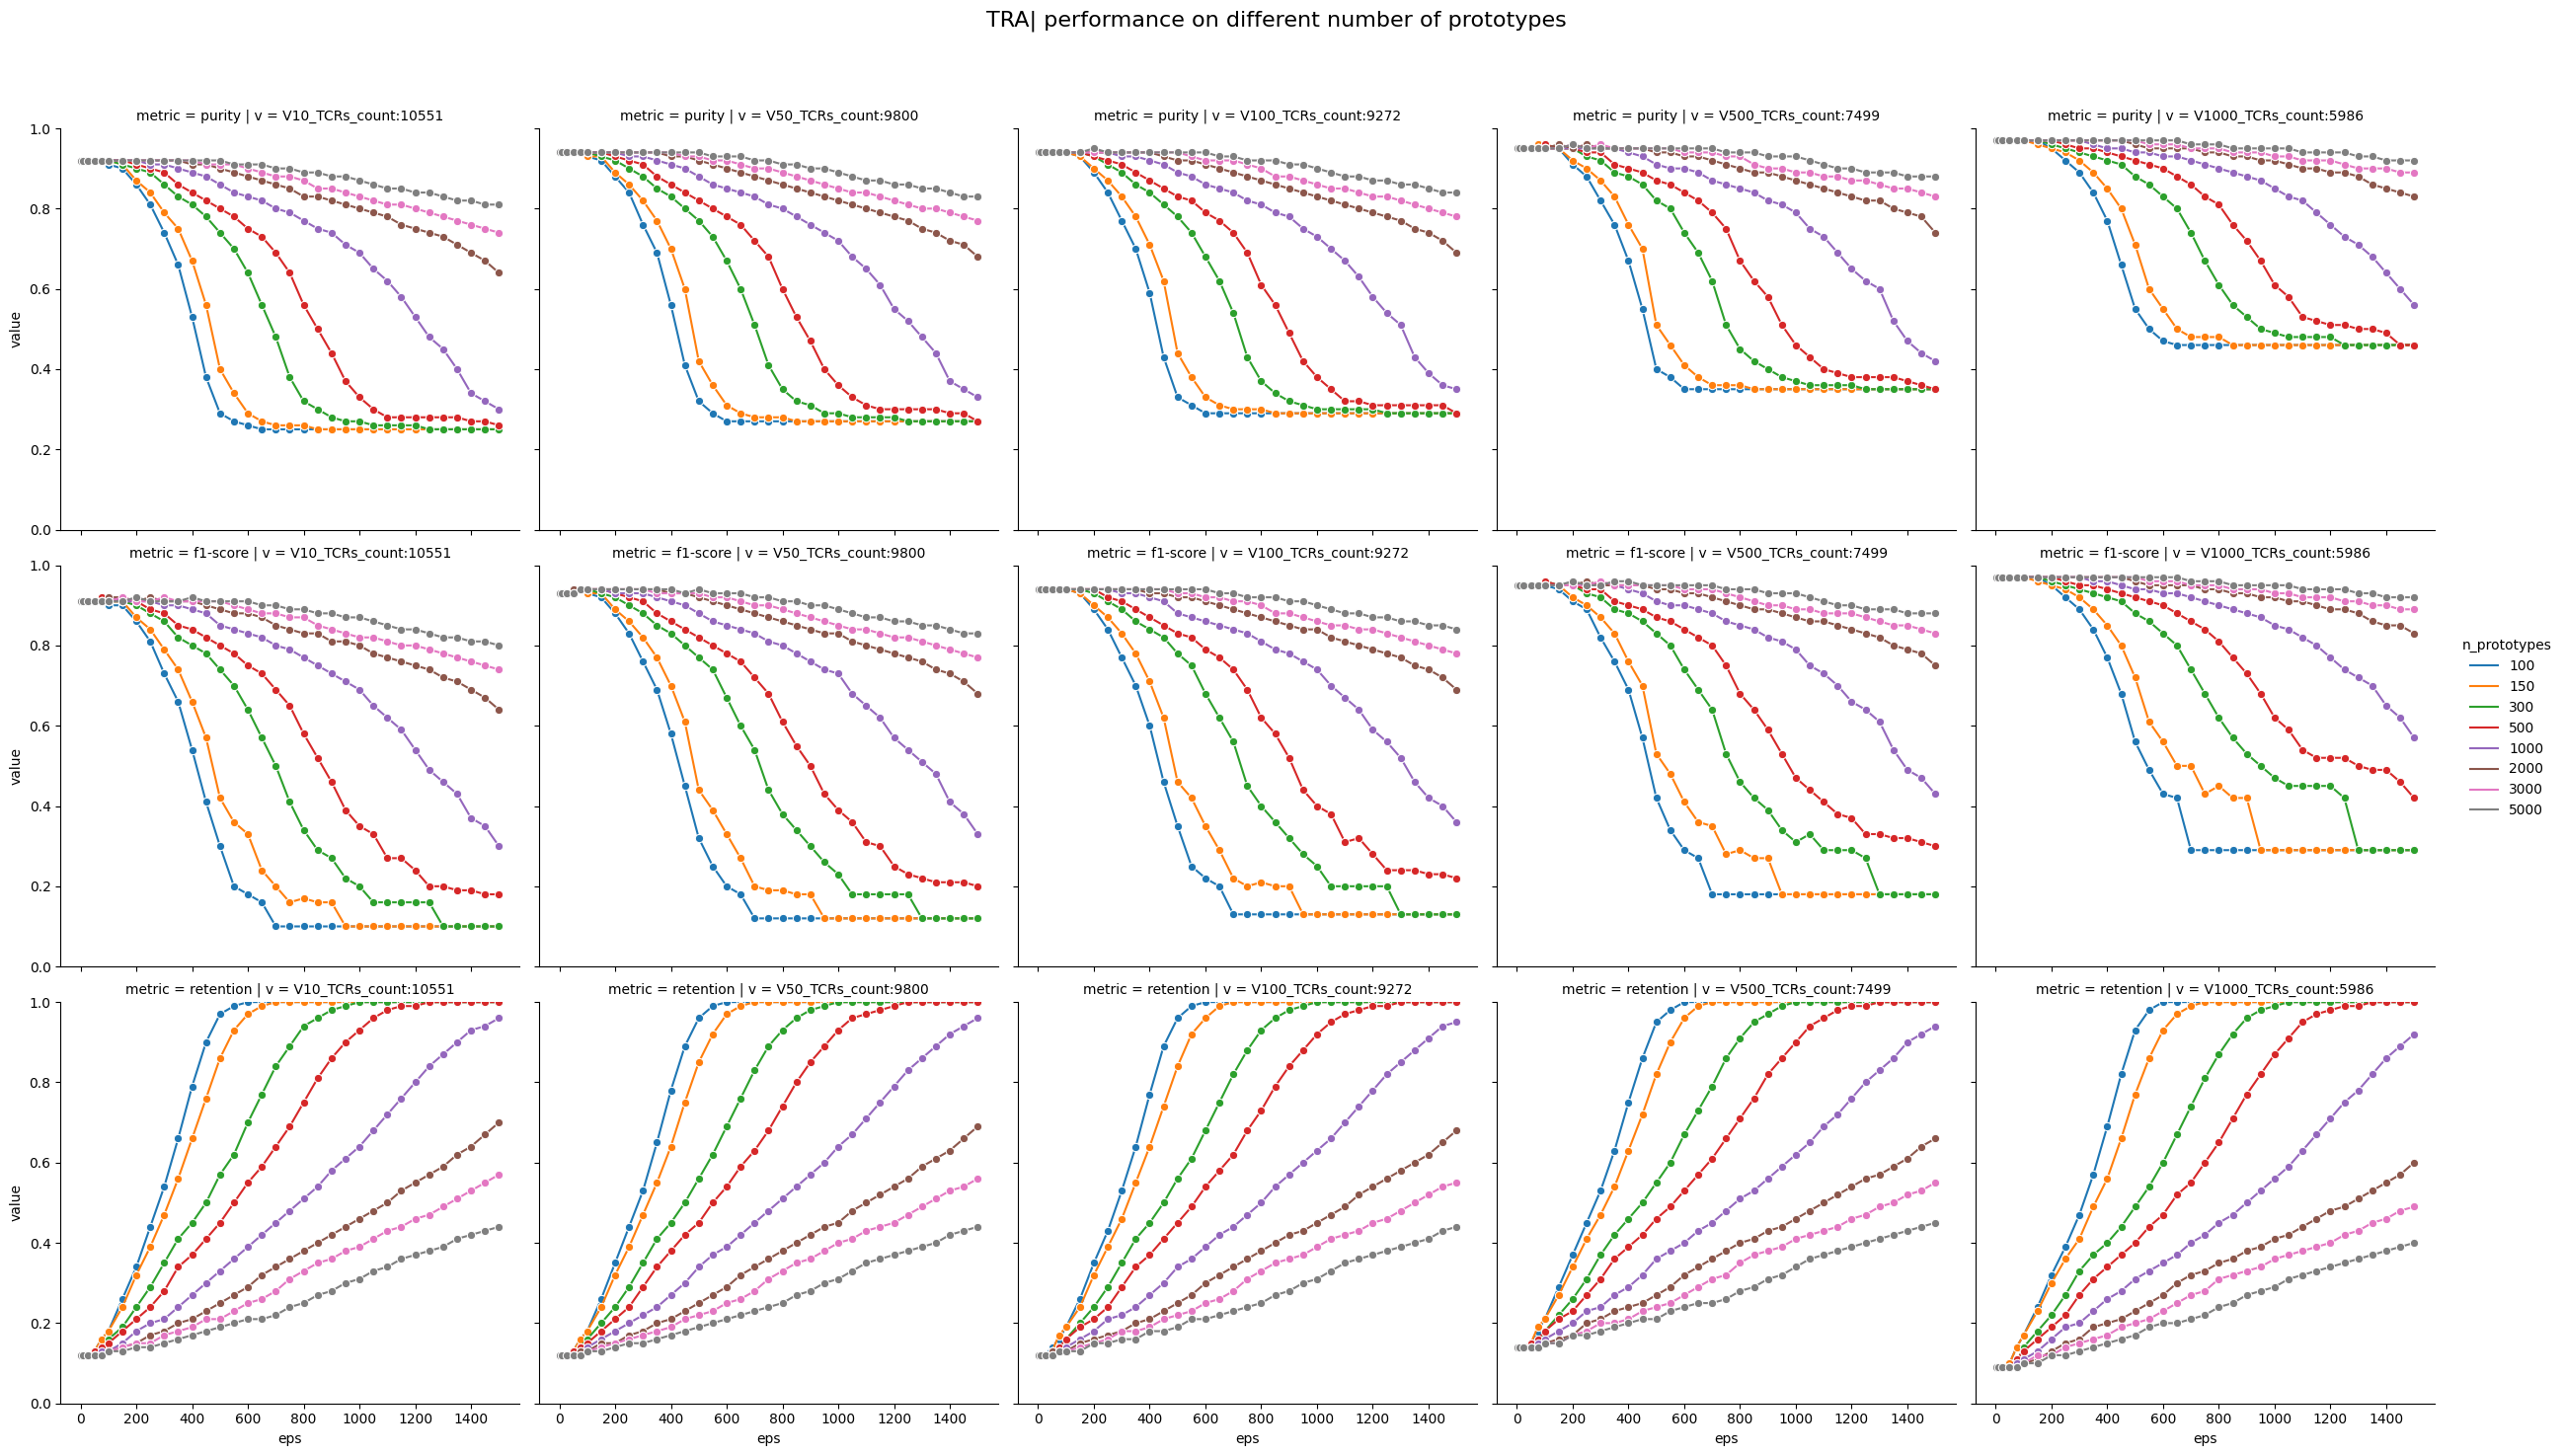

In [12]:
chain='TRA'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.txt",sep='\t',index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


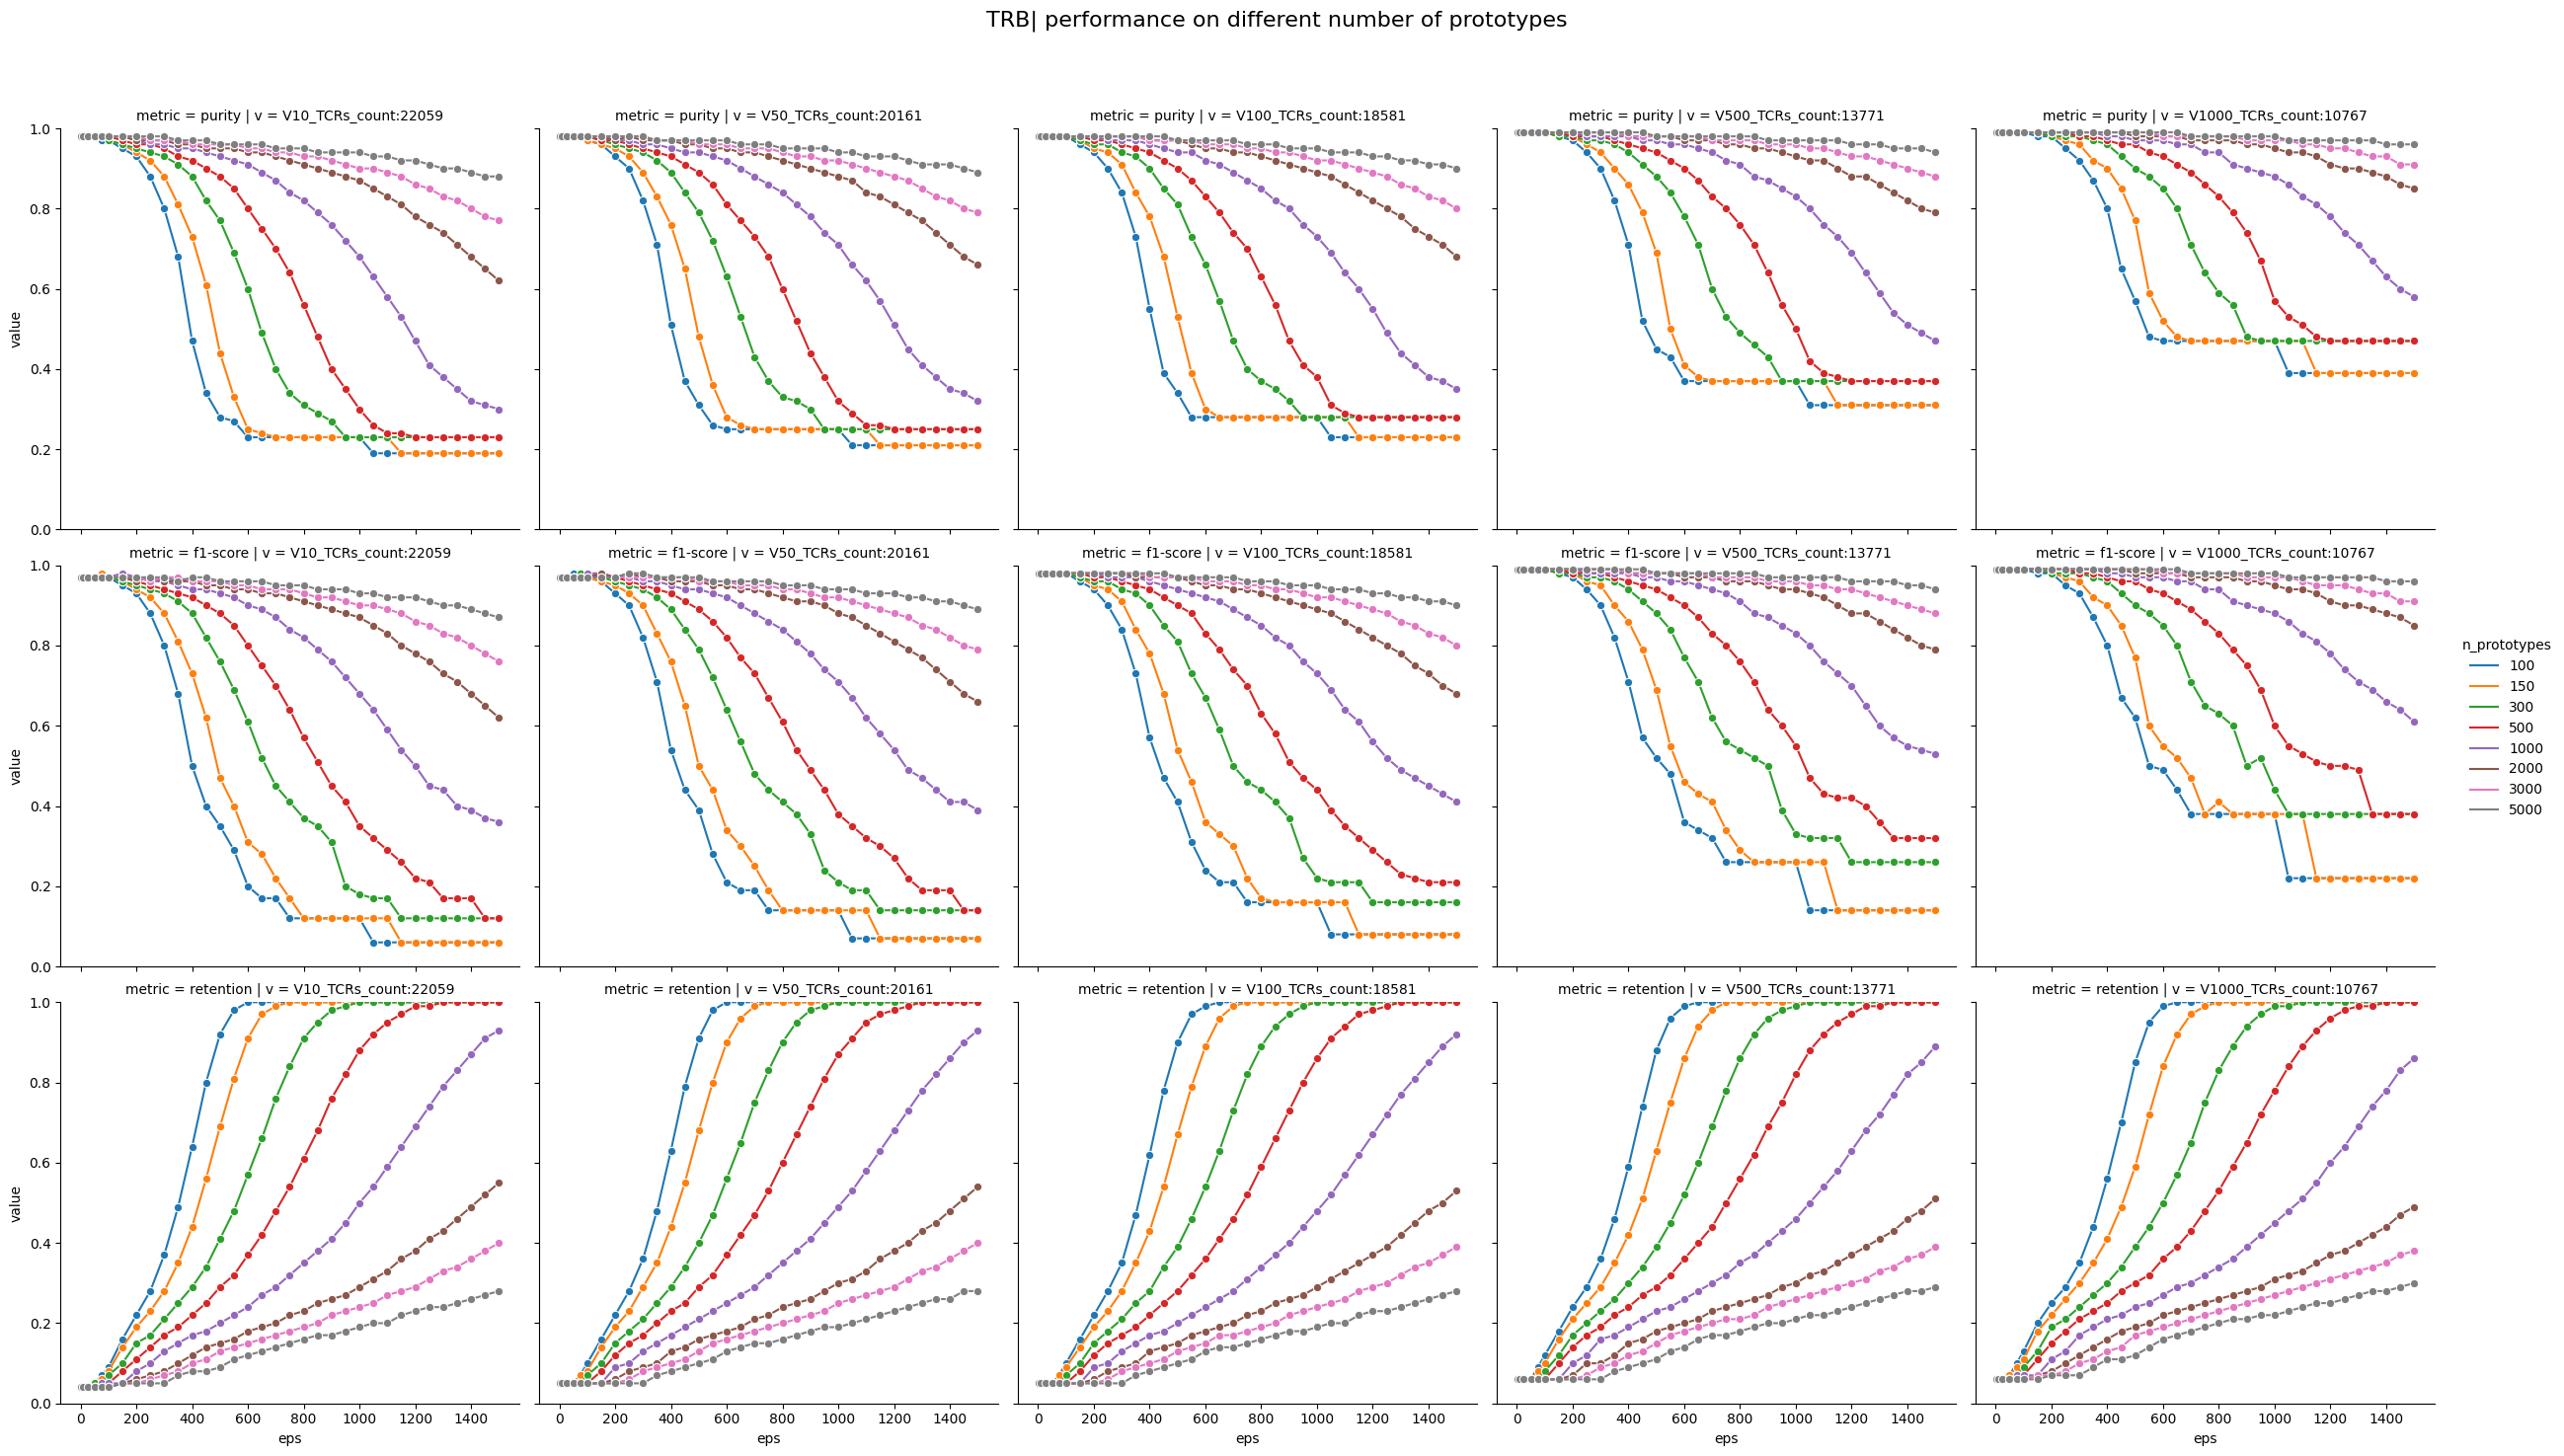

In [13]:
chain='TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.txt",sep='\t',index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


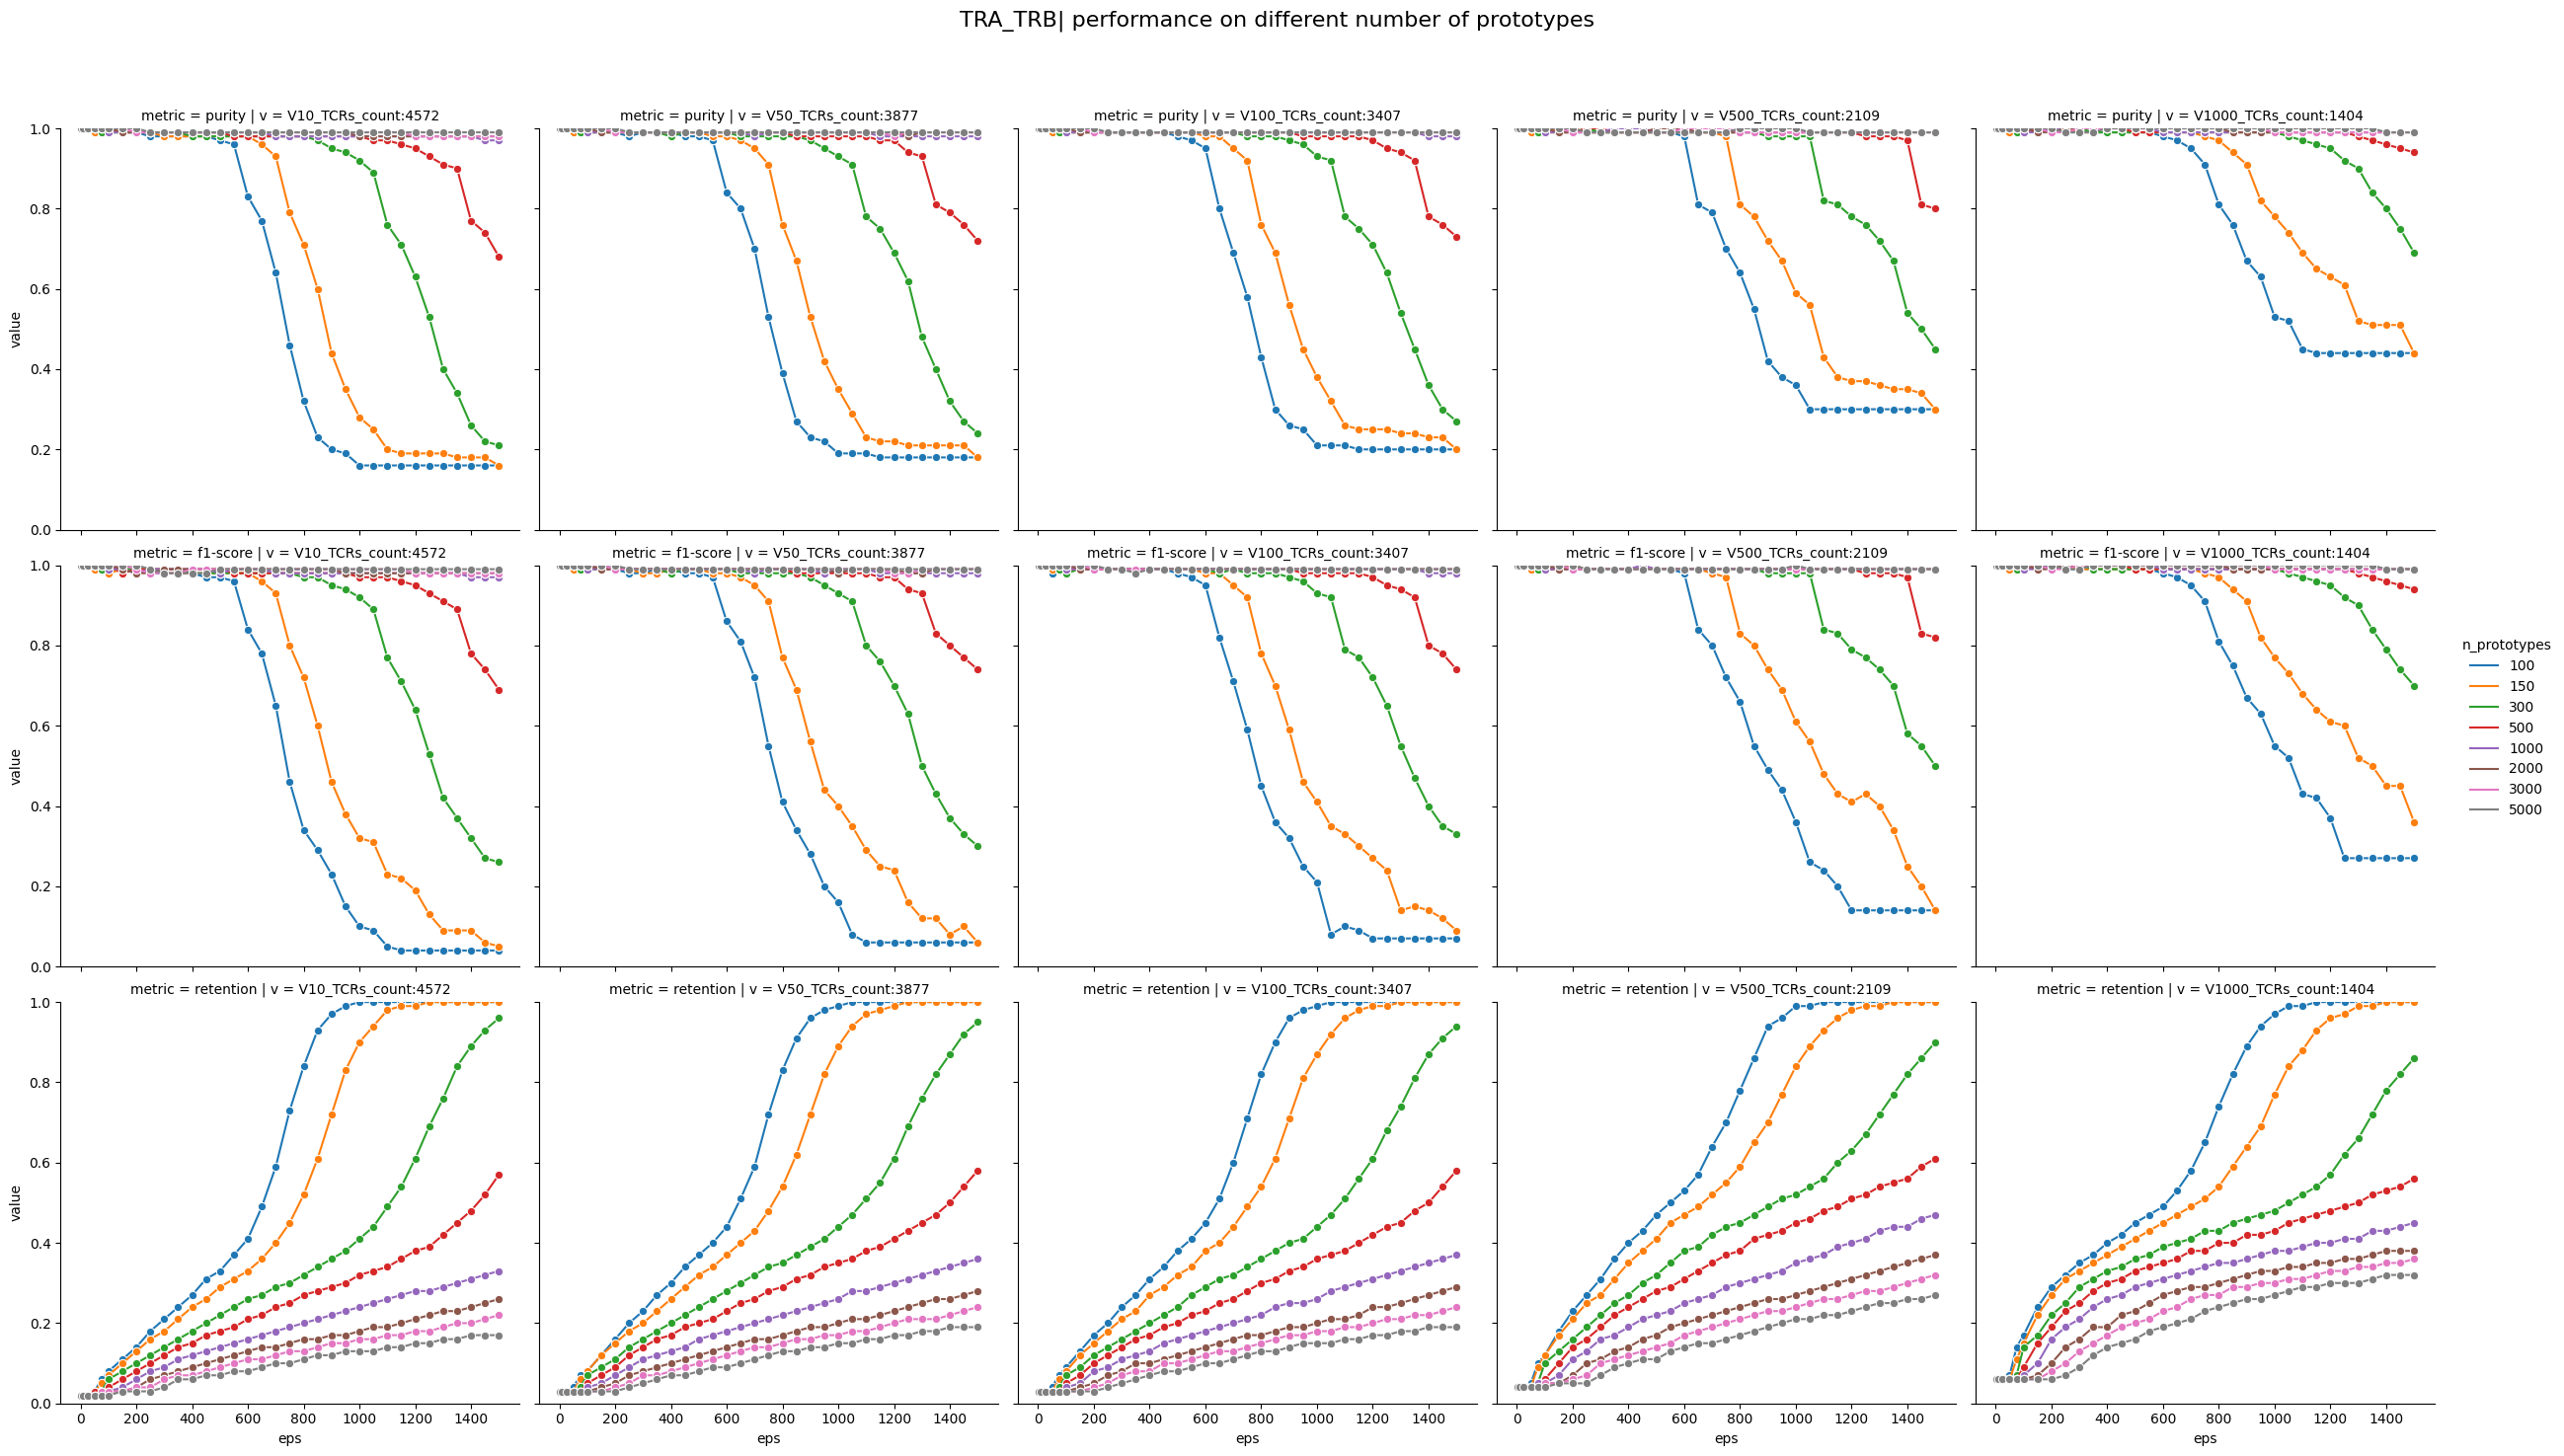

In [14]:
chain='TRA_TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.txt",sep='\t',index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

### olga generated and donor1

In [6]:
method = 'dbscan_olga_difn_donor1_2'
samples_n = [10,50,100,500,1000]
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
metrics_tcremb[method]={}

In [7]:
prototypes_sets=[2000, 3000,5000,'donor1_prototypes','donor2_prototypes']#], 'tra1000_trb3000','tra1000_trb5000','tra2000_trb5000','tra3000_trb5000']

In [8]:
prototypes_sets

[2000, 3000, 5000, 'donor1_prototypes', 'donor2_prototypes']

TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9185185185185185
purity:0.9185098952270081
purity:0.920150053590568
purity:0.918525703200776
purity:0.9136363636363637
purity:0.912681000438789
purity:0.9121992401857324
purity:0.9099717400080742
purity:0.912
purity:0.9138978206502322
purity:0.913458262350937
purity:0.911326860841424
purity:0.9093646492020476
purity:0.9014916971573318
purity:0.8931317952797666
purity:0.8822525597269625
purity:0.8740175681923255
purity:0.8660087719298246
purity:0.8596270689293946
purity:0.846045197740113
purity:0.8398909232567199
purity:0.8294530672579453
purity:0.8194665253488783
purity:0.8105299028795365
purity:0.8033349681216283
purity:0.7933291770573566
purity:0.7838162438072361
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9390006489292667
purity:0.9387630128597673
purity:0.9392045454545455
purity:0.9383282364933742
purity:0.9341978866474544
purity:0.9324386857936141
purity:0.9314641744548287
purity:0.9294623655913978
purity:0.9306171843485276
purity:0.9314024390243902
purity:0.9317689530685921
purity:0.9288170563961485
purity:0.9265267175572519
purity:0.9184523809523809
purity:0.9109493139176701
purity:0.9042275574112735
purity:0.8935752820009809
purity:0.8856011183597391
purity:0.8810002232641214
purity:0.8669961323592609
purity:0.8610246836755859
purity:0.8507786319731914
purity:0.8437737281700836
purity:0.8344903178662769
purity:0.8266455473424851
purity:0.8194210703466847
purity:0.8099951322407918
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.941728064300067
purity:0.94185303514377
purity:0.9425355450236966
purity:0.9420212765957446
purity:0.9390304847576212
purity:0.9367760617760618
purity:0.936219739292365
purity:0.9345291479820628
purity:0.9355518112889638
purity:0.9358202968311271
purity:0.9369097091046468
purity:0.9348217500900252
purity:0.9320843091334895
purity:0.9251087632069609
purity:0.9190546528803545
purity:0.9097354785928552
purity:0.9024516129032258
purity:0.8948016752894802
purity:0.891016548463357
purity:0.8766780432309442
purity:0.8708470847084708
purity:0.8611227482195224
purity:0.8530004027386227
purity:0.8442289039767217
purity:0.8367614061331339
purity:0.8287450840185914
purity:0.8188243406309257
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9531700288184438
purity:0.9532002752924983
purity:0.9545454545454546
purity:0.9556962025316456
purity:0.9518918918918919
purity:0.9498694516971279
purity:0.949169602415702
purity:0.9483178937103852
purity:0.9513314967860422
purity:0.9518388791593695
purity:0.9520264681555004
purity:0.9507154213036566
purity:0.9498700334199777
purity:0.9426172148355494
purity:0.9388704318936877
purity:0.9303543913713406
purity:0.9253075571177505
purity:0.9191776964235426
purity:0.9158523344191096
purity:0.9038967877830437
purity:0.9003067484662577
purity:0.8918786692759295
purity:0.886444286728176
purity:0.8799724074499885
purity:0.8739701625473169
purity:0.8666238492828088
purity:0.858625700643554
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9662261380323054
purity:0.9687924016282226
purity:0.9694002447980417
purity:0.9686552072800809
purity:0.9684893419833179
purity:0.9652406417112299
purity:0.9644369178662151
purity:0.9644012944983819
purity:0.9666160849772383
purity:0.9675828047921071
purity:0.967784352399737
purity:0.9667294413057125
purity:0.9654377880184332
purity:0.9600862998921251
purity:0.9554655870445344
purity:0.9512987012987013
purity:0.9472984942426926
purity:0.9453158117846545
purity:0.9437371663244353
purity:0.9410368025326474
purity:0.9385088393543428
purity:0.9308957952468008
purity:0.9271570014144271
purity:0.9247572815533981
purity:0.9181149732620321
purity:0.9122807017543859
purity:0.9079394501081248
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9179292929292929
purity:0.9185687847008019
purity:0.9180907483794932
purity:0.9193002257336343
purity:0.9197807673143996
purity:0.9155534351145038
purity:0.9137931034482759
purity:0.9132340052585451
purity:0.9125964010282777
purity:0.9108463434675431
purity:0.9104125736738703
purity:0.9123809523809524
purity:0.9129335260115607
purity:0.9131326949384405
purity:0.9112662013958126
purity:0.9099688473520249
purity:0.9050877714965784
purity:0.8956953642384106
purity:0.8885108610311436
purity:0.8828693253072486
purity:0.877628159697614
purity:0.870851207947618
purity:0.8644696639022261
purity:0.8590253085128634
purity:0.8456090651558074
purity:0.8402041617589321
purity:0.8313004316006756
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9383289124668435
purity:0.9390797148412184
purity:0.9382022471910112
purity:0.9387269482450922
purity:0.9397590361445783
purity:0.9364278506559032
purity:0.9339396840593586
purity:0.933364183248496
purity:0.9325486645540969
purity:0.93058568329718
purity:0.9295539808253439
purity:0.9313685910375454
purity:0.9313239221671118
purity:0.9312092686459088
purity:0.9294781382228491
purity:0.928359194453615
purity:0.9229074889867841
purity:0.9124343257443083
purity:0.906423034330011
purity:0.900769434863359
purity:0.8966207759699625
purity:0.8902497598463016
purity:0.8840613382899628
purity:0.8795904740707767
purity:0.8665085184386456
purity:0.8618090452261307
purity:0.8524819855884708
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9410555174777244
purity:0.9417670682730924
purity:0.9413281753707285
purity:0.941983780411728
purity:0.9436542669584245
purity:0.9401260504201681
purity:0.9385307346326837
purity:0.9377413127413128
purity:0.9366130558183539
purity:0.935395814376706
purity:0.9342334494773519
purity:0.9363942712721146
purity:0.9361364537881793
purity:0.9361058601134216
purity:0.934902537697683
purity:0.9342787962642685
purity:0.9286657859973579
purity:0.9185116851168512
purity:0.9138937536485697
purity:0.9094223219293326
purity:0.9047367028314369
purity:0.899746192893401
purity:0.8940657184894556
purity:0.8888627266305628
purity:0.8761991777067154
purity:0.871311293543377
purity:0.8630282437884901
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9521002210759028
purity:0.9532374100719424
purity:0.9529824561403509
purity:0.9543010752688172
purity:0.9568812758417011
purity:0.9528409090909091
purity:0.9513776337115073
purity:0.9509138381201044
purity:0.9498464687819856
purity:0.949185989146522
purity:0.9497630331753555
purity:0.9513761467889909
purity:0.952113891285591
purity:0.9514321295143213
purity:0.9508729192042225
purity:0.9502868068833652
purity:0.9480854197349042
purity:0.9375431331953071
purity:0.9347826086956522
purity:0.9308712121212122
purity:0.9249626307922272
purity:0.9222318589187627
purity:0.9195725534308211
purity:0.9156037991858887
purity:0.9038054968287527
purity:0.9006964147536756
purity:0.8948679621325362
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9654654654654654
purity:0.966374269005848
purity:0.9678321678321679
purity:0.9698952879581152
purity:0.9704952581664911
purity:0.968
purity:0.9676823638042474
purity:0.9666966696669667
purity:0.9642233856893543
purity:0.9647251845775225
purity:0.9652996845425867
purity:0.9670658682634731
purity:0.966878083157153
purity:0.9676354029062088
purity:0.9662775616083009
purity:0.9664670658682635
purity:0.9629840546697038
purity:0.9571201694017999
purity:0.9545
purity:0.9511025886864813
purity:0.9478930675124604
purity:0.9483362521891419
purity:0.9462320067739204
purity:0.9436274509803921
purity:0.9411764705882353
purity:0.9389017788089714
purity:0.9332089552238806
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9180327868852459
purity:0.9184681902408894
purity:0.9180929095354523
purity:0.9190751445086706
purity:0.9189339255968906
purity:0.92
purity:0.9177093358999038
purity:0.9165494608532583
purity:0.9132007233273056
purity:0.912739965095986
purity:0.9134162023146164
purity:0.9131886477462438
purity:0.9095334685598377
purity:0.909270998415214
purity:0.9117873651771957
purity:0.9137225734473782
purity:0.9137447405329593
purity:0.9125850340136055
purity:0.9125083166999335
purity:0.9094964945825367
purity:0.9077479650286403
purity:0.9058719386249631
purity:0.8987129266927812
purity:0.8902987047316944
purity:0.88585291113381
purity:0.8829918538632436
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.93841059602649
purity:0.9389213775178687
purity:0.9393156875403487
purity:0.939209726443769
purity:0.9381924198250728
purity:0.9391395592864638
purity:0.9381338742393509
purity:0.9348148148148148
purity:0.9335564053537285
purity:0.9326878745965883
purity:0.9328460484239379
purity:0.9325099250110278
purity:0.9291845493562232
purity:0.928511354079058
purity:0.9305555555555556
purity:0.9324644549763034
purity:0.9323420074349442
purity:0.9318181818181818
purity:0.931095406360424
purity:0.9283069673510602
purity:0.9254539662312838
purity:0.9235807860262009
purity:0.9132340052585451
purity:0.9079754601226994
purity:0.9034519956850054
purity:0.9003651538862807
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9411362080766599
purity:0.9416890080428955
purity:0.9421157684630739
purity:0.9421487603305785
purity:0.9418534221683827
purity:0.9430760810071155
purity:0.9418911780243
purity:0.938485002541942
purity:0.9382162431489786
purity:0.9370192307692308
purity:0.9370529327610873
purity:0.9366913123844732
purity:0.9341102644554011
purity:0.9337719298245614
purity:0.9356899488926746
purity:0.9381107491856677
purity:0.9374275782155272
purity:0.9370998116760829
purity:0.9356381022434719
purity:0.9342058719490626
purity:0.9309309309309309
purity:0.9296465968586387
purity:0.9234360410831
purity:0.9154929577464789
purity:0.9116809116809117
purity:0.908166070937586
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9521707137601177
purity:0.9531700288184438
purity:0.9533045977011494
purity:0.9535201640464799
purity:0.9535340314136126
purity:0.9561351511558981
purity:0.9549343981745579
purity:0.9544697390338701
purity:0.9509962304792676
purity:0.9500520291363164
purity:0.9504643962848297
purity:0.9495756365451822
purity:0.9488553336580614
purity:0.9493065518890483
purity:0.950925925925926
purity:0.9525089605734767
purity:0.9523606975754998
purity:0.9524793388429752
purity:0.9515077424612877
purity:0.9508454581203303
purity:0.9500372856077554
purity:0.9472727272727273
purity:0.9413398125650816
purity:0.9350478074513683
purity:0.9332691690728264
purity:0.9307022995649472
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9655688622754491
purity:0.9662261380323054
purity:0.9664723032069971
purity:0.9691689008042895
purity:0.9688279301745636
purity:0.9701173959445037
purity:0.9698189134808853
purity:0.9692603266090298
purity:0.9678012879484821
purity:0.9651162790697675
purity:0.965669014084507
purity:0.9649122807017544
purity:0.9649265905383361
purity:0.9651070578905631
purity:0.9666160849772383
purity:0.967930029154519
purity:0.9688979039891819
purity:0.9684625492772667
purity:0.9670542635658915
purity:0.9668508287292817
purity:0.9658959537572255
purity:0.9629005059021922
purity:0.9577613516367476
purity:0.9543630892678034
purity:0.9523346303501945
purity:0.9505649717514124
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.917981072555205
purity:0.9185185185185185
purity:0.9174256223436551
purity:0.9191977077363896
purity:0.918673087212413
purity:0.920358387257342
purity:0.9173114119922631
purity:0.91441647597254
purity:0.9117911791179117
purity:0.9122653862941946
purity:0.9126544524925436
purity:0.9103561195251739
purity:0.9098557692307693
purity:0.910086004691165
purity:0.9112252384446075
purity:0.912341010656583
purity:0.9110449735449735
purity:0.908692933083177
purity:0.9049909801563439
purity:0.9028140411952422
purity:0.9012034704729919
purity:0.8954787234042553
purity:0.8864551863041289
purity:0.8801135020099314
purity:0.873660205245154
purity:0.8662854629425996
purity:0.8612348822406111
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9383697813121272
purity:0.9390402075226978
purity:0.9379795396419437
purity:0.9393028846153846
purity:0.9380281690140845
purity:0.9392987964416536
purity:0.9382022471910112
purity:0.9342359767891683
purity:0.9315263908701854
purity:0.9319227230910764
purity:0.932286995515695
purity:0.9308695652173913
purity:0.9297205757832345
purity:0.9299627020306672
purity:0.9300427516517684
purity:0.9309967141292442
purity:0.9308043554618897
purity:0.9274353876739563
purity:0.9234205488194002
purity:0.9205277692543725
purity:0.9192068659366677
purity:0.9146719234018587
purity:0.905982905982906
purity:0.8998996487706974
purity:0.8934267762203963
purity:0.8867087129175426
purity:0.8818222823635543
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9410958904109589
purity:0.9416107382550336
purity:0.9401993355481728
purity:0.9422110552763819
purity:0.943075117370892
purity:0.9432314410480349
purity:0.9419904204364024
purity:0.9385390428211587
purity:0.9364448857994042
purity:0.9366906474820144
purity:0.9368863955119214
purity:0.9356009070294785
purity:0.9344842850818946
purity:0.9346037245560849
purity:0.9341414141414142
purity:0.9351887152115897
purity:0.9360998898273962
purity:0.9341463414634147
purity:0.9293369055592766
purity:0.926844988720593
purity:0.9258566978193147
purity:0.9217777777777778
purity:0.9134723788049606
purity:0.9062829989440337
purity:0.9013544594939944
purity:0.8959208899876391
purity:0.8904011461318052
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9521354933726067
purity:0.9531024531024531
purity:0.9521428571428572
purity:0.953960731211916
purity:0.9535031847133758
purity:0.9553203997648442
purity:0.9546498277841562
purity:0.9516041326808048
purity:0.9490343347639485
purity:0.9495268138801262
purity:0.9499494438827099
purity:0.9494354442808051
purity:0.9495919347095535
purity:0.9492242595204513
purity:0.9494505494505494
purity:0.9505655634687893
purity:0.9516713652839307
purity:0.9516441005802708
purity:0.947505584512286
purity:0.9450469992769343
purity:0.9442314395259672
purity:0.9418837675350702
purity:0.9359464627151052
purity:0.9305680793507665
purity:0.9255908958272542
purity:0.9224652087475149
purity:0.9176308539944904
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9655172413793104
purity:0.9662261380323054
purity:0.9665211062590975
purity:0.970013037809648
purity:0.9663056558363418
purity:0.9686192468619247
purity:0.9684959349593496
purity:0.9664804469273743
purity:0.9643835616438357
purity:0.9647577092511013
purity:0.9649871904355252
purity:0.9654036243822076
purity:0.9654618473895582
purity:0.9651898734177216
purity:0.9667870036101083
purity:0.9664879356568364
purity:0.9669211195928753
purity:0.9670731707317073
purity:0.9639905548996458
purity:0.9627118644067797
purity:0.9618074233458849
purity:0.9593702386998476
purity:0.9558466763706939
purity:0.9513193812556869
purity:0.9492273730684326
purity:0.9459691252144082
purity:0.9431299294312993
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9182903834066625
purity:0.9186691312384473
purity:0.9197952218430034
purity:0.9168478260869565
purity:0.9174782162993337
purity:0.9175455417066155
purity:0.9117383512544803
purity:0.9112582781456954
purity:0.9112169770463404
purity:0.9110556940980881
purity:0.9112776025236593
purity:0.9086102719033232
purity:0.9100963253656796
purity:0.9110816191108162
purity:0.909746161078032
purity:0.9044793829724117
purity:0.9026624677927283
purity:0.9009873834339002
purity:0.8933298728263691
purity:0.8831263696128561
purity:0.8754015603487838
purity:0.8678579307302008
purity:0.8605190968558768
purity:0.8537525354969574
purity:0.8477447311404372
purity:0.8362052641545162
purity:0.8284260268993093
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9386138613861386
purity:0.9391585760517799
purity:0.9394847213900539
purity:0.9375358166189112
purity:0.937466307277628
purity:0.9382591093117408
purity:0.9317535545023696
purity:0.930905695611578
purity:0.9309556470050298
purity:0.9305494505494506
purity:0.9306310071040534
purity:0.9279423538831065
purity:0.928030303030303
purity:0.9290979290979291
purity:0.9277906591586618
purity:0.9221105527638191
purity:0.9204476709013915
purity:0.9178716020821284
purity:0.9114097641250686
purity:0.902319587628866
purity:0.8946472019464721
purity:0.8877168307548055
purity:0.8814931414436699
purity:0.8751892710361238
purity:0.869327731092437
purity:0.8575757575757575
purity:0.8508652537429516
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9412166780587833
purity:0.941728064300067
purity:0.9425359150530919
purity:0.9414925373134329
purity:0.9413754227733935
purity:0.9419831223628692
purity:0.9362962962962963
purity:0.9357976653696498
purity:0.9360687022900763
purity:0.9353507565337001
purity:0.9352455454150369
purity:0.9328327075511056
purity:0.933570581257414
purity:0.9342395297575312
purity:0.9337748344370861
purity:0.9286657859973579
purity:0.9268912905276542
purity:0.9245742092457421
purity:0.9183732333429478
purity:0.9100787829394187
purity:0.9032921810699589
purity:0.8959881129271917
purity:0.8906064209274673
purity:0.8849942726231386
purity:0.878915796489669
purity:0.8661400512382579
purity:0.8610309278350515
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9522409992652462
purity:0.953203743700504
purity:0.9543624161073826
purity:0.9536679536679536
purity:0.952731737262124
purity:0.9535550458715596
purity:0.9488545551411828
purity:0.9493136219640972
purity:0.949406298399587
purity:0.9493796526054591
purity:0.9499527856468366
purity:0.9489284085727314
purity:0.9490861618798956
purity:0.9501852614244545
purity:0.9503683598293913
purity:0.9473293768545994
purity:0.9454350927246791
purity:0.9442735042735043
purity:0.9391077824812765
purity:0.9327188940092166
purity:0.9275447345262541
purity:0.921485260770975
purity:0.9163019693654267
purity:0.9144072301967039
purity:0.9111918982082576
purity:0.8976023976023976
purity:0.895656394079107
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9656716417910448
purity:0.9662261380323054
purity:0.9702072538860104
purity:0.9684848484848485
purity:0.9657142857142857
purity:0.9675785207700102
purity:0.9646840148698885
purity:0.9642529789184234
purity:0.9645704162976085
purity:0.9665551839464883
purity:0.9650516282764099
purity:0.9650190114068441
purity:0.9653954802259888
purity:0.9657444005270093
purity:0.9672528805336568
purity:0.9651365485183033
purity:0.962451684152402
purity:0.961719979024646
purity:0.9585828343313373
purity:0.952803738317757
purity:0.9498000888494003
purity:0.9461538461538461
purity:0.9425857083849649
purity:0.9411529223378703
purity:0.9396887159533074
purity:0.9342056074766355
purity:0.9327062228654125


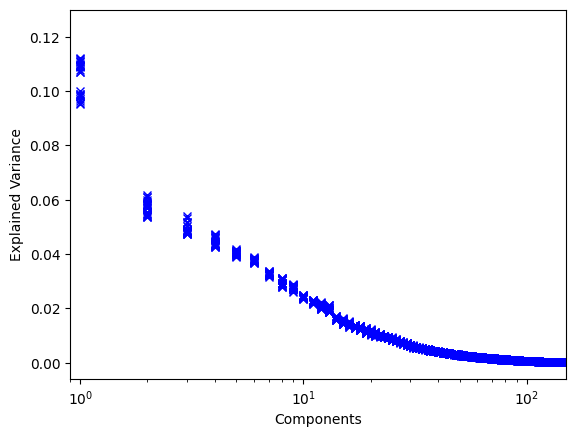

In [14]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for prototypes_name in prototypes_sets:
    for i in samples_n:
        run_name = f'compare_V{i}_{prototypes_name}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['n_prototypes']=prototypes_name
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

In [32]:
metrics_df

purity retention consistency   ami precision  \
V10_P2000_e3                     0.92      0.12      0.0065  0.86       0.9   
V10_P2000_e10                    0.92      0.12      0.0065  0.86       0.9   
V10_P2000_e25                    0.92      0.12      0.0065  0.86       0.9   
V10_P2000_e50                    0.92      0.12      0.0065  0.86       0.9   
V10_P2000_e75                    0.92      0.12      0.0062  0.86       0.9   
...                               ...       ...         ...   ...       ...   
V1000_Pdonor1_prototypes_e1300   0.93      0.39      0.0362  0.73      0.93   
V1000_Pdonor1_prototypes_e1350   0.92       0.4      0.0356  0.73      0.93   
V1000_Pdonor1_prototypes_e1400   0.92      0.41      0.0364  0.72      0.92   
V1000_Pdonor1_prototypes_e1450   0.92      0.42      0.0367   0.7      0.92   
V1000_Pdonor1_prototypes_e1500   0.91      0.43      0.0357  0.68      0.91   

                               recall f1-score mean_clustsize  \
V10_P2000_e3                     0.92     0.91           6.99   
V10_P2000_e10                    0.92     0.91           6.99   
V10_P2000_e25                    0.92     0.91           6.99   
V10_P2000_e50                    0.92     0.91           6.94   
V10_P2000_e75                    0.92     0.91           6.84   
...                               ...      ...            ...   
V1000_Pdonor1_prototypes_e1300   0.93     0.93           5.91   
V1000_Pdonor1_prototypes_e1350   0.92     0.92           5.76   
V1000_Pdonor1_prototypes_e1400   0.92     0.92           5.72   
V1000_Pdonor1_prototypes_e1450   0.92     0.92           5.74   
V1000_Pdonor1_prototypes_e1500   0.91     0.91           5.67   

                                     n_prototypes   eps                      v  
V10_P2000_e3                                 2000     3   V10_TCRs_count:10551  
V10_P2000_e10                                2000    10   V10_TCRs_count:10551  
V10_P2000_e25                                2000    25   V10_TCRs_count:10551  
V10_P2000_e50                                2000    50   V10_TCRs_count:10551  
V10_P2000_e75                                2000    75   V10_TCRs_count:10551  
...                                           ...   ...                    ...  
V1000_Pdonor1_prototypes_e1300  donor1_prototypes  1300  V1000_TCRs_count:5986  
V1000_Pdonor1_prototypes_e1350  donor1_prototypes  1350  V1000_TCRs_count:5986  
V1000_Pdonor1_prototypes_e1400  donor1_prototypes  1400  V1000_TCRs_count:5986  
V1000_Pdonor1_prototypes_e1450  donor1_prototypes  1450  V1000_TCRs_count:5986  
V1000_Pdonor1_prototypes_e1500  donor1_prototypes  1500  V1000_TCRs_count:5986  

[680 rows x 11 columns]

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


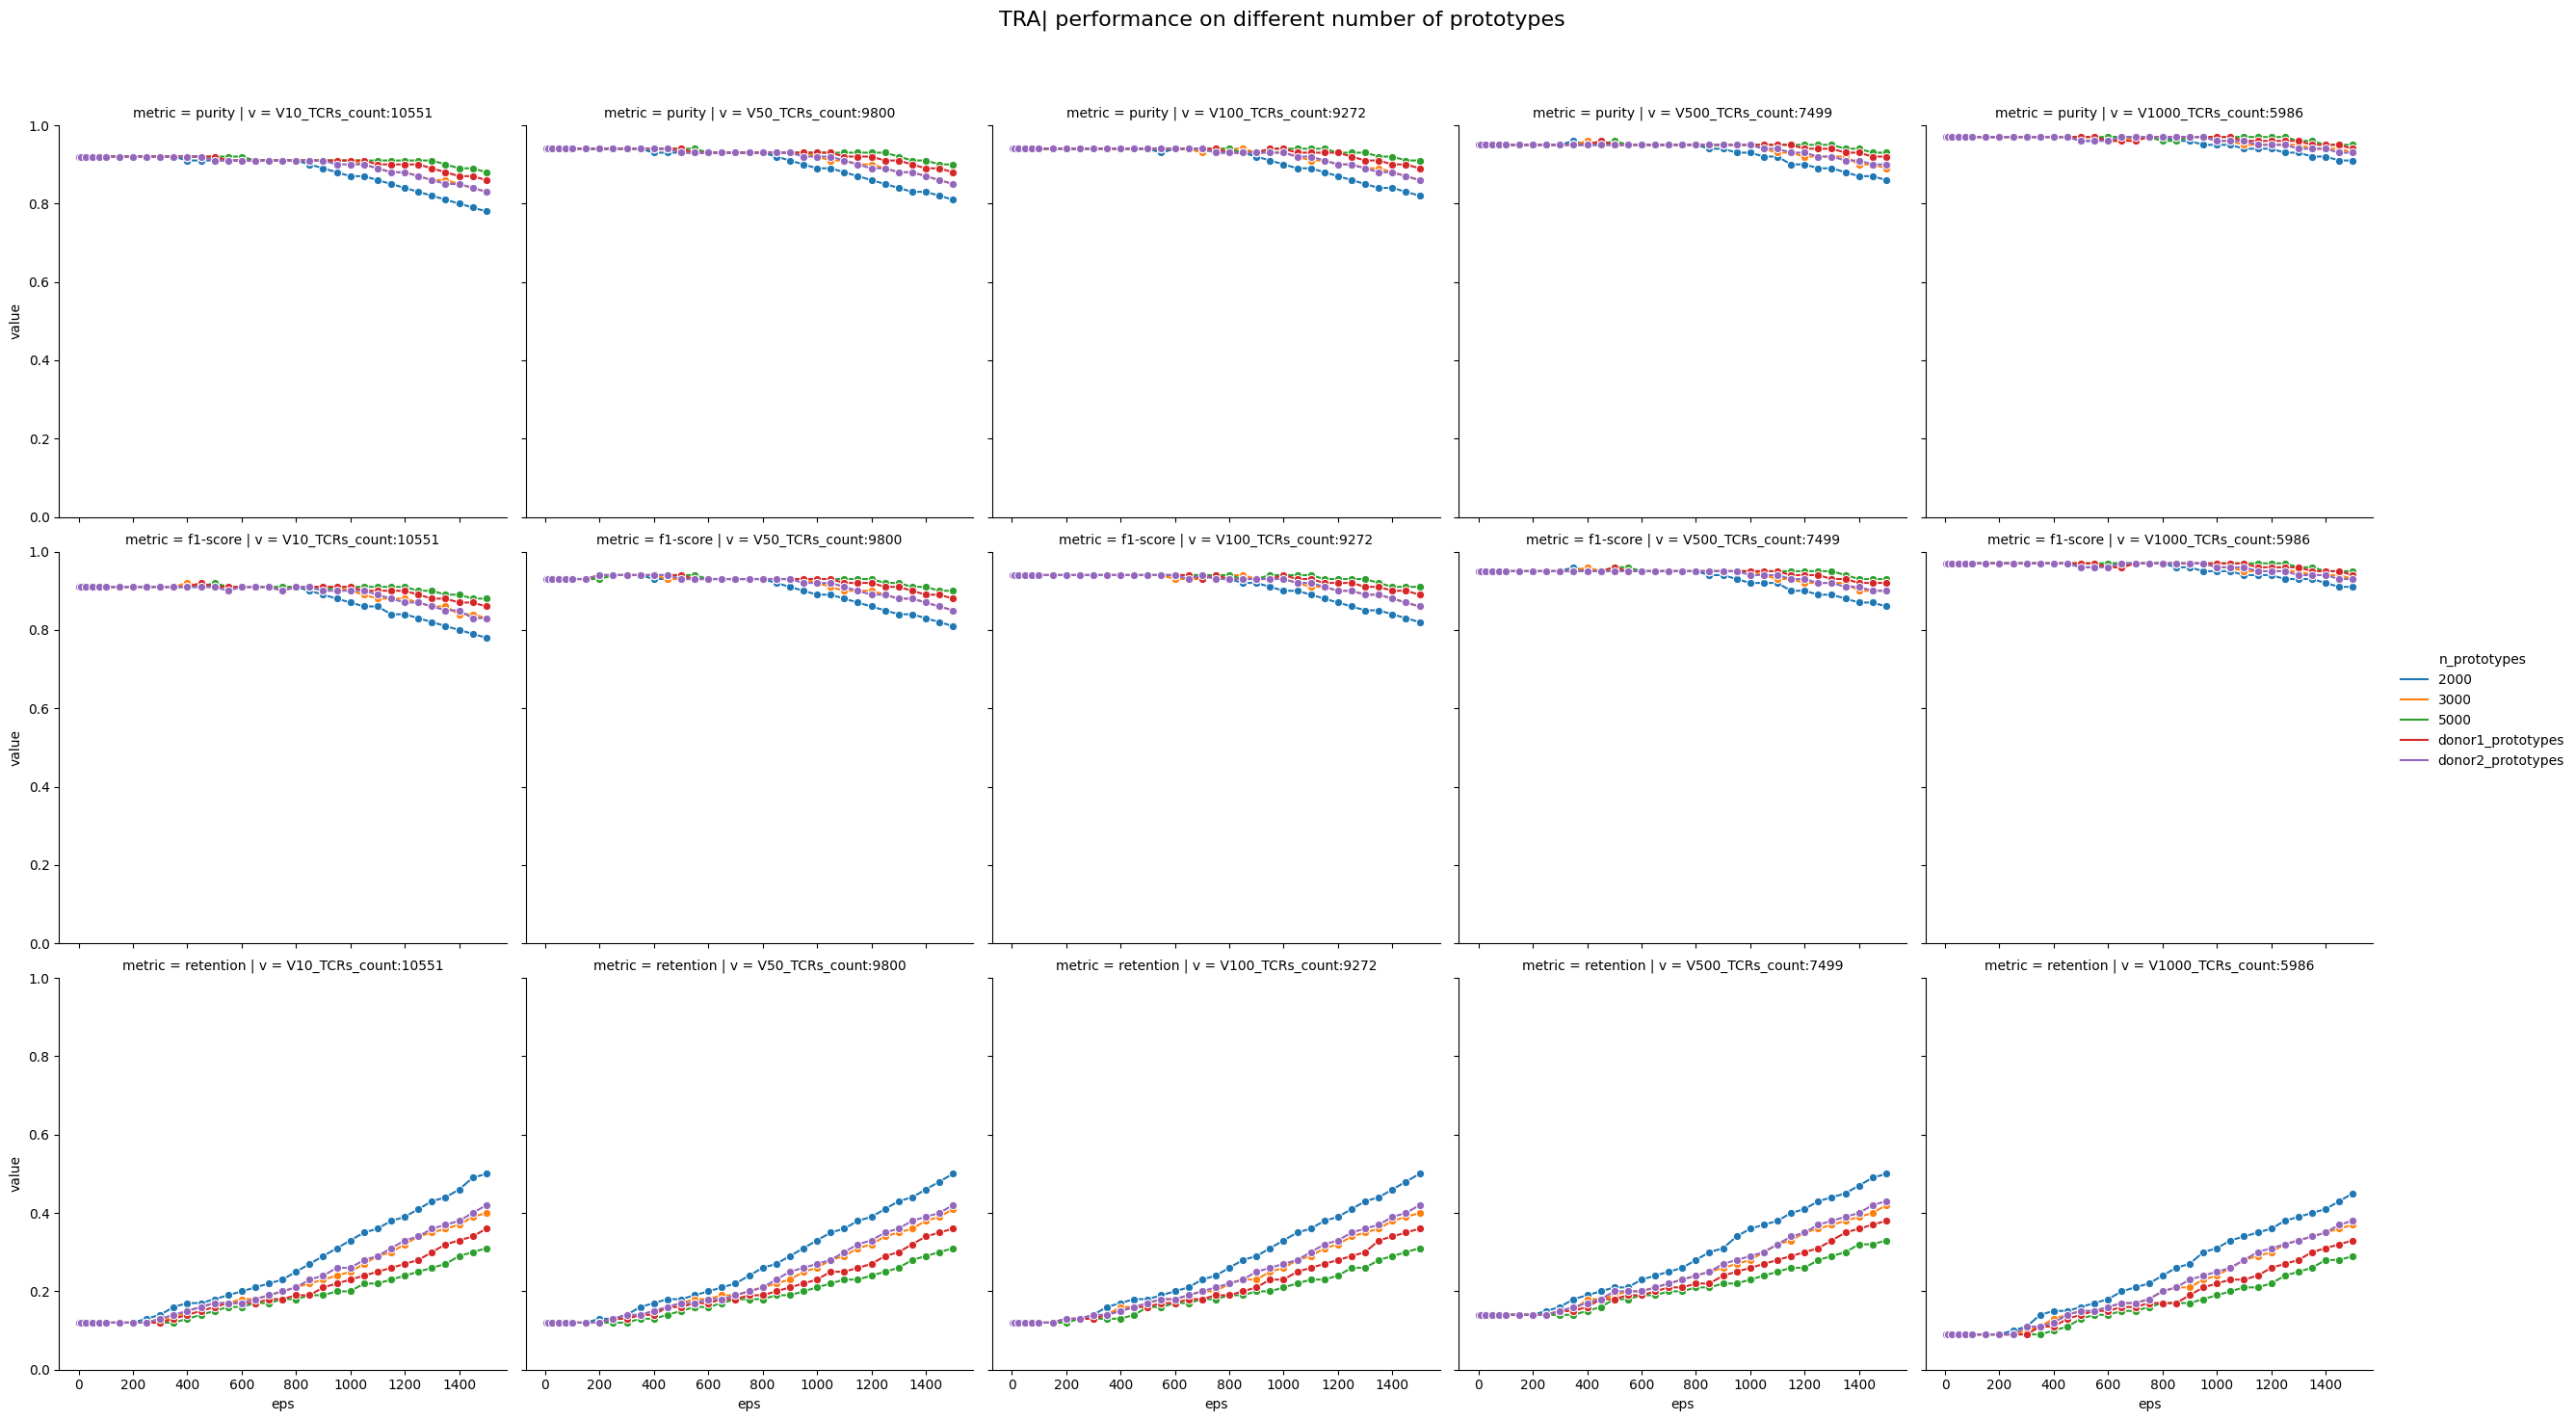

In [15]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.txt",sep='\t',index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for prototypes_name in prototypes_sets:
    for i in samples_n:
        run_name = f'compare_V{i}_{prototypes_name}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['n_prototypes']=prototypes_name
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758735440931781
purity:0.9759535655058044
purity:0.9760330578512396
purity:0.976326530612245
purity:0.9770932069510269
purity:0.9796186719263642
purity:0.9743881616391576
purity:0.9684526790185278
purity:0.9675383228133454
purity:0.9672859450726979
purity:0.9642857142857143
purity:0.9622351857537611
purity:0.9603598538093899
purity:0.9563617245005258
purity:0.9553508150248051
purity:0.9523491427299042
purity:0.9472796288485871
purity:0.9410605164596886
purity:0.9360628154795289
purity:0.9329170383586084
purity:0.9276002719238613
purity:0.9219204655674103
purity:0.9160807092632223
purity:0.9096623300687035
purity:0.9014241831890534
purity:0.8863124420299456
purity:0.8729037952338923
purity:0.8567324955116696
purity:0.8413313575743759
purity:0.8274602492479587
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770992366412213
purity:0.9771766694843618
purity:0.9772535804549284
purity:0.9775374376039934
purity:0.9782783588093322
purity:0.9805499664654594
purity:0.9772859638905067
purity:0.9745454545454545
purity:0.973721257625528
purity:0.9727120067170445
purity:0.9704810495626822
purity:0.9684481648422408
purity:0.9657311669128508
purity:0.9625935162094763
purity:0.9617691154422788
purity:0.9598298676748582
purity:0.9541592128801432
purity:0.948019283169147
purity:0.9426637467648815
purity:0.9393709738537325
purity:0.9358695652173913
purity:0.931391139458714
purity:0.9256965944272446
purity:0.919588592800374
purity:0.9137518684603887
purity:0.89749430523918
purity:0.8847563458667028
purity:0.8688122011115419
purity:0.8563862544648355
purity:0.8458299216282607
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820923656927427
purity:0.9821596244131455
purity:0.9822263797942001
purity:0.9824723247232472
purity:0.9831111111111112
purity:0.9845701689933872
purity:0.9811676082862524
purity:0.9783845278725825
purity:0.9767441860465116
purity:0.9758542141230069
purity:0.9744918294141092
purity:0.9720056697377746
purity:0.9704545454545455
purity:0.9676335877862595
purity:0.9670724958494743
purity:0.9657426778242678
purity:0.9610325142715314
purity:0.9548311990686845
purity:0.9498009730207873
purity:0.9467928496319663
purity:0.9432709716354858
purity:0.9395562356541699
purity:0.9343489299963729
purity:0.9286953504510757
purity:0.9238985313751669
purity:0.9079491255961845
purity:0.8951123254401943
purity:0.8803703167944452
purity:0.8679245283018868
purity:0.857926351527814
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875647668393782
purity:0.9875904860392968
purity:0.9876416065911432
purity:0.9878048780487805
purity:0.9881773399014778
purity:0.989448051948052
purity:0.9879943502824858
purity:0.9864951768488746
purity:0.9857142857142858
purity:0.9851282051282051
purity:0.9842767295597484
purity:0.9830917874396136
purity:0.9828741623231572
purity:0.9809322033898306
purity:0.9798850574712644
purity:0.9801162434995412
purity:0.9769140853302163
purity:0.9736330835414932
purity:0.9715576820839978
purity:0.9704759480783914
purity:0.9686428221460068
purity:0.9684260131950989
purity:0.963996399639964
purity:0.9609120521172638
purity:0.9575273338940286
purity:0.952428945777061
purity:0.9408456167571762
purity:0.9275470292419445
purity:0.9202937488805302
purity:0.9129763130792997
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884659746251442
purity:0.9884925201380897
purity:0.9885452462772051
purity:0.9885452462772051
purity:0.9889380530973452
purity:0.9902439024390244
purity:0.9893617021276596
purity:0.988905325443787
purity:0.9876382563435263
purity:0.9877121123464014
purity:0.9881198347107438
purity:0.9870908252650992
purity:0.9863247863247864
purity:0.9852820932134096
purity:0.9857410881801125
purity:0.985278276481149
purity:0.9830038154699965
purity:0.9799276077657124
purity:0.9790409653858367
purity:0.9775144333029474
purity:0.9754945379391792
purity:0.9753511034680424
purity:0.9724517906336089
purity:0.9696243005595524
purity:0.9666666666666667
purity:0.9640808181591419
purity:0.9549527730685397
purity:0.9427436316896471
purity:0.9364721784185628
purity:0.9289274106175515
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758735440931781
purity:0.9759136212624585
purity:0.9760330578512396
purity:0.9768
purity:0.9770932069510269
purity:0.9795501022494888
purity:0.9763279445727483
purity:0.9717333333333333
purity:0.9675701839303001
purity:0.9679747406405051
purity:0.9679643146796432
purity:0.9662309368191722
purity:0.9624210176255404
purity:0.9614138438880707
purity:0.9590434304562947
purity:0.9566815437122604
purity:0.9543519394512772
purity:0.9523269012485811
purity:0.9489751417357174
purity:0.9466721785861927
purity:0.9412458243269798
purity:0.9363141085853842
purity:0.9323159784560143
purity:0.9287952646239555
purity:0.9262198210366368
purity:0.9224680988531739
purity:0.9176254026691211
purity:0.9118994826311899
purity:0.9021570562526434
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770992366412213
purity:0.9771380186282811
purity:0.9772535804549284
purity:0.9779951100244498
purity:0.9782783588093322
purity:0.9805555555555555
purity:0.9776075427224514
purity:0.9748633879781421
purity:0.9739609414121182
purity:0.9737950397753861
purity:0.9731205375892482
purity:0.9713963116296576
purity:0.9680887963926466
purity:0.9659020458772474
purity:0.9644714038128249
purity:0.9624101713653952
purity:0.9604109245803056
purity:0.9594985535197685
purity:0.9565722248026011
purity:0.9532936770213704
purity:0.9479406230399331
purity:0.9429255637597286
purity:0.9393823865802516
purity:0.9365049981488338
purity:0.9341113105924596
purity:0.9306318681318682
purity:0.9266100032690422
purity:0.9220840547772706
purity:0.9131157449380477
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820923656927427
purity:0.9821260583254939
purity:0.9822263797942001
purity:0.9828674481514879
purity:0.9831111111111112
purity:0.984779299847793
purity:0.9815404201145767
purity:0.9791418355184743
purity:0.9777657266811279
purity:0.9771920932589965
purity:0.9757103574702108
purity:0.974989749897499
purity:0.9721480351011065
purity:0.9716142270861833
purity:0.9697548551416746
purity:0.968065693430657
purity:0.9667774086378738
purity:0.9658210947930574
purity:0.9626407369498464
purity:0.9606645492303933
purity:0.9548942106486864
purity:0.9497231450719823
purity:0.9464890016920474
purity:0.9438524590163935
purity:0.9416102032682343
purity:0.9388105223027068
purity:0.9345065312046444
purity:0.9305701294158797
purity:0.9232585596221959
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875647668393782
purity:0.9875647668393782
purity:0.9876416065911432
purity:0.9881070366699702
purity:0.9881773399014778
purity:0.9899244332493703
purity:0.9885958660014256
purity:0.9878048780487805
purity:0.9865443425076452
purity:0.9863636363636363
purity:0.9844640082858622
purity:0.9851783232978231
purity:0.9833333333333333
purity:0.9831570701135919
purity:0.9816715542521994
purity:0.9807288016818501
purity:0.9797882579403272
purity:0.9797948399129623
purity:0.9781763826606876
purity:0.9771279675738275
purity:0.974472807991121
purity:0.971718249733191
purity:0.9705731832139202
purity:0.9695532817569253
purity:0.9690545808966862
purity:0.9681978798586572
purity:0.9641326415519964
purity:0.9610673665791776
purity:0.9582627118644068
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884659746251442
purity:0.9884659746251442
purity:0.9885452462772051
purity:0.9888641425389755
purity:0.9889380530973452
purity:0.9900398406374502
purity:0.9892650701899257
purity:0.988791032826261
purity:0.9888190076869322
purity:0.9883268482490273
purity:0.9876252209781968
purity:0.9882854100106496
purity:0.9873225152129818
purity:0.9869133574007221
purity:0.986480777355302
purity:0.9853896103896104
purity:0.9849284099472494
purity:0.985052861830113
purity:0.9834565293910594
purity:0.9831615120274914
purity:0.9799474030243261
purity:0.9787234042553191
purity:0.9773838630806846
purity:0.9764038231780168
purity:0.9759742162320539
purity:0.975107296137339
purity:0.97108234646103
purity:0.9694942467219695
purity:0.9675732217573222
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9759136212624585
purity:0.9759933774834437
purity:0.9760330578512396
purity:0.9763651181744091
purity:0.9770569620253164
purity:0.9770932069510269
purity:0.9795081967213115
purity:0.9781065088757397
purity:0.976054732041049
purity:0.96900826446281
purity:0.9676796912686927
purity:0.9686078252957234
purity:0.9683518290176737
purity:0.9670750382848392
purity:0.9655294953802417
purity:0.9629258517034068
purity:0.9621962196219622
purity:0.9607566346696782
purity:0.9577235772357724
purity:0.9568740198640878
purity:0.9557889594528578
purity:0.9541580281041234
purity:0.9498886414253898
purity:0.9484203739522888
purity:0.9464544138929089
purity:0.9418881396271321
purity:0.9380395165931326
purity:0.9338507021433851
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9771380186282811
purity:0.9772151898734177
purity:0.9772535804549284
purity:0.9775747508305648
purity:0.9782433521353747
purity:0.9782783588093322
purity:0.9805149617258176
purity:0.9794561933534743
purity:0.9773123909249564
purity:0.9749733759318424
purity:0.9742701632855022
purity:0.9745283018867924
purity:0.9735381988903116
purity:0.9722001588562351
purity:0.9712177121771217
purity:0.9689028651292803
purity:0.9678942398489141
purity:0.9663890541344438
purity:0.9635949943117179
purity:0.9623729744575666
purity:0.9618949536560247
purity:0.9606164383561644
purity:0.9574669187145558
purity:0.9557481751824818
purity:0.9531662269129287
purity:0.9482105263157895
purity:0.9449989814626196
purity:0.9409224730127576
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9821260583254939
purity:0.9821930646672915
purity:0.9822263797942001
purity:0.9825046040515654
purity:0.9830810329474622
purity:0.9831111111111112
purity:0.9847677075399848
purity:0.9829842931937173
purity:0.9811202013845186
purity:0.979081929110982
purity:0.9778258518117902
purity:0.9780163599182005
purity:0.9764216366158114
purity:0.9746672391584371
purity:0.9743486973947896
purity:0.9726923076923077
purity:0.9719334719334719
purity:0.9699934768427919
purity:0.968916797488226
purity:0.9676150121065376
purity:0.9675491033304867
purity:0.9664047683554592
purity:0.9636316064887493
purity:0.9625600809511763
purity:0.959726629240908
purity:0.9555139311636619
purity:0.9520253451007015
purity:0.9479529616724739
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875647668393782
purity:0.9876160990712074
purity:0.9876416065911432
purity:0.9878296146044625
purity:0.9881539980256664
purity:0.9881773399014778
purity:0.9899159663865547
purity:0.989075018208303
purity:0.9880534082923401
purity:0.9874587458745875
purity:0.9865689865689866
purity:0.9868270332187858
purity:0.9849585062240664
purity:0.984841075794621
purity:0.9854081167350661
purity:0.9837576821773486
purity:0.983300198807157
purity:0.9824822959373836
purity:0.9816216216216216
purity:0.9808094905792044
purity:0.9805151915455746
purity:0.9795340050377834
purity:0.9792048929663608
purity:0.9783831803375778
purity:0.9769585253456221
purity:0.9743661186960156
purity:0.972327726532827
purity:0.9710221285563752
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884659746251442
purity:0.9885189437428243
purity:0.9885452462772051
purity:0.9885714285714285
purity:0.9889135254988913
purity:0.9889380530973452
purity:0.9899598393574297
purity:0.9898648648648649
purity:0.9893790849673203
purity:0.9900763358778626
purity:0.9888888888888889
purity:0.9888961463096015
purity:0.9875813128326434
purity:0.9881019830028328
purity:0.9875065070275898
purity:0.9878726629610914
purity:0.9869767441860465
purity:0.9858551221603086
purity:0.9858686616791354
purity:0.9850384148807116
purity:0.9845797995373939
purity:0.9848708487084871
purity:0.9845822875582646
purity:0.9838539838539838
purity:0.9822222222222222
purity:0.9798945286750165
purity:0.9790457769181173
purity:0.9789241899968544
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758735440931781
purity:0.9759136212624585
purity:0.9759136212624585
purity:0.9759535655058044
purity:0.9760330578512396
purity:0.976326530612245
purity:0.976984126984127
purity:0.9771653543307086
purity:0.9792817679558011
purity:0.9788325849903784
purity:0.9752202643171806
purity:0.973361747469366
purity:0.9702770780856423
purity:0.968722073279714
purity:0.9673826571201273
purity:0.9669211195928753
purity:0.9657743137919349
purity:0.9634849455477258
purity:0.9587903943077379
purity:0.9582655826558265
purity:0.9569303054032889
purity:0.9535946140899254
purity:0.951918631530282
purity:0.9499777678968431
purity:0.9459978655282818
purity:0.942728574350583
purity:0.9394891944990177
purity:0.9360859728506787
purity:0.9317689530685921
purity:0.929552965733171
purity:0.9255977261327537
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770992366412213
purity:0.9771380186282811
purity:0.9771380186282811
purity:0.9771766694843618
purity:0.9772535804549284
purity:0.9775374376039934
purity:0.9781729991915926
purity:0.9783480352846833
purity:0.9803921568627451
purity:0.9803407601572739
purity:0.9779411764705882
purity:0.9765027322404372
purity:0.9736570247933884
purity:0.9752179899036255
purity:0.97165991902834
purity:0.972379871358305
purity:0.9710656316160904
purity:0.968948247078464
purity:0.9637209302325581
purity:0.9635119726339795
purity:0.9613698630136986
purity:0.9592301848569258
purity:0.9577327143904226
purity:0.9566854990583804
purity:0.9523485364193329
purity:0.9494686618954674
purity:0.9462051709758131
purity:0.9432524563866052
purity:0.9392891450528338


In [ ]:
chain='TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.txt",sep='\t',index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

In [ ]:
chain = 'TRA_TRB'
metrics_tcremb[method][chain]={}
for prototypes_name in prototypes_sets:
    for i in samples_n:
        run_name = f'compare_V{i}_{prototypes_name}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['n_prototypes']=prototypes_name
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

In [ ]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.txt",sep='\t',index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

## compare PCA components

In [9]:

samples_n = [10,50,100,500,1000]
#samples_n = [10,1000]
prototypes_n = [500, 1000,2000, 3000,5000]
#prototypes_n = [100,3000]

In [10]:
method = 'dbscan_pca_n'
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
metrics_tcremb[method]={}

In [11]:
pca_n_list = [10,30,50,100,150,200,300,400]

In [ ]:
chain = 'TRA'
i = 10
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for pca_n in pca_n_list:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain,n_components=pca_n )
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['pc_n']=pca_n

In [ ]:
chain = 'TRB'
i = 10
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for pca_n in pca_n_list:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain,n_components=pca_n )
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['pc_n']=pca_n

TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9871382636655949
purity:0.9905660377358491
purity:0.9904761904761905
purity:0.9904153354632588
purity:0.9887005649717514
purity:0.9870633893919794
purity:0.985781990521327
purity:0.9867256637168141
purity:0.9836233367451381
purity:0.9849340866290018
purity:0.9850088183421517
purity:0.9833610648918469
purity:0.983619344773791
purity:0.984375
purity:0.9815078236130867
purity:0.9809004092769441
purity:0.9772135416666666
purity:0.9761456371625863
purity:0.9729078868151716
purity:0.9709976798143851
purity:0.9637760702524698
purity:0.9506561679790027
purity:0.9290354822588706
purity:0.912041392285983
purity:0.7998228520814881
purity:0.7720314439387671
purity:0.7344224924012158
purity:0.6749311294765841
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9871382636655949
purity:0.9905660377358491
purity:0.9902723735408561
purity:0.9919743178170144
purity:0.9886363636363636
purity:0.9870801033591732
purity:0.9856972586412396
purity:0.9867109634551495
purity:0.9835897435897436
purity:0.9849198868991518
purity:0.9849424269264836
purity:0.9832915622389307
purity:0.983477576711251
purity:0.984304932735426
purity:0.9821173104434907
purity:0.9815195071868583
purity:0.9777777777777777
purity:0.9754716981132076
purity:0.9728260869565217
purity:0.9709639953542393
purity:0.9651741293532339
purity:0.9506302521008403
purity:0.9312594079277471
purity:0.9119170984455959
purity:0.8006230529595015
purity:0.7736556898707795
purity:0.7378565921356978
purity:0.6847188685753708
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9870967741935484
purity:0.9905437352245863
purity:0.9902723735408561
purity:0.9919224555735057
purity:0.9885877318116976
purity:0.9869791666666666
purity:0.9856801909307876
purity:0.9866814650388457
purity:0.9835897435897436
purity:0.9849624060150376
purity:0.9849424269264836
purity:0.983249581239531
purity:0.9835423197492164
purity:0.9843166542195668
purity:0.9820916905444126
purity:0.9814814814814815
purity:0.9783748361730014
purity:0.97544080604534
purity:0.9729241877256317
purity:0.9710312862108922
purity:0.9651355838406198
purity:0.9510526315789474
purity:0.932092555331992
purity:0.9125708884688091
purity:0.89349376114082
purity:0.7726324572382144
purity:0.7384615384615385
purity:0.6834432488719194
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9871382636655949
purity:0.9906542056074766
purity:0.9903660886319846
purity:0.9919354838709677
purity:0.9886201991465149
purity:0.9870466321243523
purity:0.9856972586412396
purity:0.9867986798679867
purity:0.9836901121304791
purity:0.9849482596425212
purity:0.9849023090586145
purity:0.9841004184100418
purity:0.983477576711251
purity:0.9843517138599106
purity:0.9821428571428571
purity:0.9808481532147743
purity:0.9784172661870504
purity:0.97544080604534
purity:0.9729567307692307
purity:0.9699074074074074
purity:0.9647577092511013
purity:0.9595375722543352
purity:0.9325955734406438
purity:0.9125939849624061
purity:0.8941491737382761
purity:0.7722731057452124
purity:0.7369831546707504
purity:0.6812996889042516
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9950248756218906
purity:0.9871382636655949
purity:0.9906542056074766
purity:0.9903288201160542
purity:0.9904306220095693
purity:0.9887165021156559
purity:0.9869791666666666
purity:0.9857142857142858
purity:0.9866962305986696
purity:0.9835221421215242
purity:0.9850187265917603
purity:0.9849424269264836
purity:0.9841402337228714
purity:0.9834905660377359
purity:0.9843517138599106
purity:0.9820916905444126
purity:0.9815068493150685
purity:0.9784031413612565
purity:0.9760855884203902
purity:0.9729404690318701
purity:0.9704176334106729
purity:0.9657079646017699
purity:0.9510268562401264
purity:0.9331322272498743
purity:0.9136385087305333
purity:0.8945729537366548
purity:0.7734113712374582
purity:0.7362552864282969
purity:0.6849600555748524
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9871382636655949
purity:0.9906103286384976
purity:0.9903846153846154
purity:0.9919743178170144
purity:0.9887165021156559
purity:0.9869960988296489
purity:0.9857142857142858
purity:0.9867256637168141
purity:0.983640081799591
purity:0.9849765258215962
purity:0.9849557522123894
purity:0.9833055091819699
purity:0.9834905660377359
purity:0.9843283582089553
purity:0.9814418272662384
purity:0.9815825375170532
purity:0.9783889980353635
purity:0.9755025125628141
purity:0.972972972972973
purity:0.9709639953542393
purity:0.9647577092511013
purity:0.9505783385909569
purity:0.9317269076305221
purity:0.9136385087305333
purity:0.8955091151622944
purity:0.774395329441201
purity:0.735755258126195
purity:0.6829352717203184
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9870967741935484
purity:0.990521327014218
purity:0.9904214559386973
purity:0.9919224555735057
purity:0.9886039886039886
purity:0.9870298313878081
purity:0.9868421052631579
purity:0.9867403314917127
purity:0.9835897435897436
purity:0.9848053181386515
purity:0.9849424269264836
purity:0.9841269841269841
purity:0.983477576711251
purity:0.984304932735426
purity:0.9813753581661891
purity:0.9815447710184553
purity:0.9777632439502943
purity:0.9754562617998741
purity:0.9728260869565217
purity:0.9709976798143851
purity:0.9647382920110192
purity:0.9485294117647058
purity:0.9307576517812344
purity:0.9135160680529301
purity:0.8024032042723631
purity:0.7738840216937839
purity:0.7366807205825987
purity:0.6802627030763913
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9870967741935484
purity:0.9905660377358491
purity:0.9903474903474904
purity:0.9919743178170144
purity:0.9886685552407932
purity:0.9870466321243523
purity:0.9856972586412396
purity:0.9867549668874173
purity:0.9835560123329907
purity:0.9849624060150376
purity:0.9849690539345711
purity:0.9833055091819699
purity:0.983477576711251
purity:0.9843283582089553
purity:0.9814285714285714
purity:0.9815447710184553
purity:0.9784031413612565
purity:0.9761156505342552
purity:0.9728915662650602
purity:0.971561230412072
purity:0.9642070484581498
purity:0.9506043089858118
purity:0.9321266968325792
purity:0.9124705882352941
purity:0.8003557136505114
purity:0.7717255717255718
purity:0.7358346094946401
purity:0.6756290934160635
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878787878787879
purity:0.9901477832512315
purity:0.9915611814345991
purity:0.992619926199262
purity:0.9916666666666667
purity:0.9892966360856269
purity:0.9858356940509915
purity:0.9868247694334651
purity:0.9875311720698254
purity:0.98698224852071
purity:0.982122905027933
purity:0.9830328738069989
purity:0.984
purity:0.9847473784556721
purity:0.9836660617059891
purity:0.982713915298185
purity:0.9833194328607172
purity:0.9840891010342084
purity:0.9846153846153847
purity:0.9842931937172775
purity:0.9826338639652678
purity:0.980405878236529
purity:0.980325644504749
purity:0.97761685319289
purity:0.9756722151088348
purity:0.9731585518102372
purity:0.9718225419664268
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9877675840978594
purity:0.9900744416873449
purity:0.9915611814345991
purity:0.992633517495396
purity:0.991652754590985
purity:0.989247311827957
purity:0.9858557284299858
purity:0.9867899603698811
purity:0.986318407960199
purity:0.98698224852071
purity:0.9821428571428571
purity:0.9830328738069989
purity:0.984
purity:0.9847908745247148
purity:0.9836956521739131
purity:0.9835640138408305
purity:0.9833055091819699
purity:0.9841017488076311
purity:0.9846153846153847
purity:0.9842814371257484
purity:0.9826714801444043
purity:0.9810659186535764
purity:0.9802989130434783
purity:0.9781890284203569
purity:0.9757033248081841
purity:0.97375
purity:0.9718225419664268
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878787878787879
purity:0.9900744416873449
purity:0.9915254237288136
purity:0.992619926199262
purity:0.9916805324459235
purity:0.9892638036809815
purity:0.9858757062146892
purity:0.9868247694334651
purity:0.9875621890547264
purity:0.9859484777517564
purity:0.9821826280623608
purity:0.9830328738069989
purity:0.9839518555667001
purity:0.9848053181386515
purity:0.983710407239819
purity:0.9835782195332757
purity:0.9833748960931006
purity:0.9841017488076311
purity:0.9846035411855273
purity:0.9842814371257484
purity:0.9826589595375722
purity:0.9810791871058164
purity:0.97968855788761
purity:0.9782178217821782
purity:0.9757033248081841
purity:0.9731752963194011
purity:0.9724715739078397
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878787878787879
purity:0.9900990099009901
purity:0.9915611814345991
purity:0.992633517495396
purity:0.9916805324459235
purity:0.989329268292683
purity:0.9858757062146892
purity:0.9868421052631579
purity:0.9863861386138614
purity:0.9870740305522914
purity:0.9821627647714605
purity:0.9830328738069989
purity:0.983983983983984
purity:0.9847182425978988
purity:0.9837691614066727
purity:0.9827586206896551
purity:0.9833472106577852
purity:0.9841143764892772
purity:0.9846625766871165
purity:0.9842460615153789
purity:0.9826839826839827
purity:0.9804195804195804
purity:0.9803122878479293
purity:0.9782178217821782
purity:0.9756410256410256
purity:0.9731585518102372
purity:0.9724715739078397
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878048780487805
purity:0.9900744416873449
purity:0.9915611814345991
purity:0.9925788497217068
purity:0.9916247906197655
purity:0.9892307692307692
purity:0.985734664764622
purity:0.986648865153538
purity:0.9874529485570891
purity:0.9869668246445498
purity:0.9821627647714605
purity:0.9830508474576272
purity:0.984
purity:0.9847908745247148
purity:0.983754512635379
purity:0.9835640138408305
purity:0.9833610648918469
purity:0.9840891010342084
purity:0.9846390168970814
purity:0.9842342342342343
purity:0.9819884726224783
purity:0.980405878236529
purity:0.9809653297076818
purity:0.9788639365918098
purity:0.9756722151088348
purity:0.9738968303293971
purity:0.9723723723723724
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9907407407407407
purity:0.9878787878787879
purity:0.9902200488997555
purity:0.9916142557651991
purity:0.9926470588235294
purity:0.9917081260364843
purity:0.9893617021276596
purity:0.9859154929577465
purity:0.9868073878627969
purity:0.9864197530864197
purity:0.9859649122807017
purity:0.9821627647714605
purity:0.9831578947368421
purity:0.9841740850642928
purity:0.9849340866290018
purity:0.9839142091152815
purity:0.9827882960413081
purity:0.9833887043189369
purity:0.9841521394611727
purity:0.9846977811782709
purity:0.9843283582089553
purity:0.9820273184759166
purity:0.9804878048780488
purity:0.9796747967479674
purity:0.978246539222149
purity:0.9757188498402556
purity:0.9744707347447074
purity:0.972520908004779
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878048780487805
purity:0.9899749373433584
purity:0.9915611814345991
purity:0.9926062846580407
purity:0.991652754590985
purity:0.9892141756548536
purity:0.9858356940509915
purity:0.9867899603698811
purity:0.9875156054931336
purity:0.9857651245551602
purity:0.9821627647714605
purity:0.9830328738069989
purity:0.9839357429718876
purity:0.9847908745247148
purity:0.9836956521739131
purity:0.9835497835497835
purity:0.9833887043189369
purity:0.9840637450199203
purity:0.9846035411855273
purity:0.9842931937172775
purity:0.982646420824295
purity:0.9810791871058164
purity:0.9810040705563093
purity:0.9782034346103038
purity:0.9757033248081841
purity:0.9737663960024985
purity:0.9723723723723724
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878787878787879
purity:0.9900990099009901
purity:0.9915611814345991
purity:0.992619926199262
purity:0.9916943521594684
purity:0.989329268292683
purity:0.9858956276445698
purity:0.9868421052631579
purity:0.9875776397515528
purity:0.987012987012987
purity:0.9821627647714605
purity:0.9830328738069989
purity:0.9840637450199203
purity:0.9847764034253093
purity:0.9837691614066727
purity:0.9835924006908463
purity:0.9833055091819699
purity:0.9840891010342084
purity:0.9846272098385856
purity:0.9842814371257484
purity:0.9819624819624819
purity:0.9811056682995102
purity:0.9796472184531886
purity:0.9782178217821782
purity:0.9756254008980115
purity:0.97375
purity:0.9717717717717718
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9863636363636363
purity:0.9869281045751634
purity:0.9886039886039886
purity:0.9903614457831326
purity:0.9907407407407407
purity:0.9921259842519685
purity:0.9909747292418772
purity:0.9900990099009901
purity:0.9891135303265941
purity:0.9897058823529412
purity:0.9888268156424581
purity:0.9867549668874173
purity:0.9872448979591837
purity:0.9876237623762376
purity:0.986904761904762
purity:0.985244040862656
purity:0.9826086956521739
purity:0.9831223628691983
purity:0.9836065573770492
purity:0.9842829076620825
purity:0.9840823970037453
purity:0.9828982898289829
purity:0.9826086956521739
purity:0.9830364715860899
purity:0.9834437086092715
purity:0.9842022116903634
purity:0.9845559845559846
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868421052631579
purity:0.9884057971014493
purity:0.9902676399026764
purity:0.9907407407407407
purity:0.9920159680638723
purity:0.9908759124087592
purity:0.9900166389351082
purity:0.9890625
purity:0.9896602658788775
purity:0.9887482419127989
purity:0.9866844207723036
purity:0.9872286079182631
purity:0.9875776397515528
purity:0.986873508353222
purity:0.9852607709750567
purity:0.9825897714907508
purity:0.9830148619957537
purity:0.9835560123329907
purity:0.9841427155599604
purity:0.9840525328330206
purity:0.9827429609445958
purity:0.982532751091703
purity:0.9830364715860899
purity:0.9834162520729685
purity:0.9842022116903634
purity:0.9844599844599845
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868852459016394
purity:0.9885057471264368
purity:0.9903147699757869
purity:0.9907407407407407
purity:0.9920159680638723
purity:0.9909420289855072
purity:0.9900990099009901
purity:0.9891135303265941
purity:0.9898107714701602
purity:0.9887798036465638
purity:0.9867899603698811
purity:0.9872448979591837
purity:0.9876237623762376
purity:0.9869203329369798
purity:0.9853107344632769
purity:0.9826086956521739
purity:0.9831401475237092
purity:0.9835728952772074
purity:0.9833333333333333
purity:0.9842007434944238
purity:0.9829136690647482
purity:0.9826086956521739
purity:0.9830364715860899
purity:0.9835255354200988
purity:0.9842395587076438
purity:0.9845440494590417
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9869281045751634
purity:0.9884393063583815
purity:0.9902439024390244
purity:0.9907407407407407
purity:0.9920159680638723
purity:0.9909255898366606
purity:0.9900990099009901
purity:0.9891135303265941
purity:0.9897058823529412
purity:0.9887798036465638
purity:0.9867549668874173
purity:0.9872122762148338
purity:0.9875776397515528
purity:0.9869203329369798
purity:0.9852607709750567
purity:0.9825897714907508
purity:0.9831401475237092
purity:0.9836065573770492
purity:0.9842829076620825
purity:0.9840674789128397
purity:0.9828982898289829
purity:0.9826086956521739
purity:0.9830508474576272
purity:0.9834847233691164
purity:0.9842271293375394
purity:0.9845559845559846
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868852459016394
purity:0.9885057471264368
purity:0.9902439024390244
purity:0.9907407407407407
purity:0.991869918699187
purity:0.9908925318761385
purity:0.9900826446280991
purity:0.9891135303265941
purity:0.9896907216494846
purity:0.9887798036465638
purity:0.9867899603698811
purity:0.9871959026888605
purity:0.9876084262701363
purity:0.986904761904762
purity:0.985244040862656
purity:0.9826275787187839
purity:0.9831578947368421
purity:0.9836065573770492
purity:0.9833984375
purity:0.9840972871842844
purity:0.9828982898289829
purity:0.9825935596170583
purity:0.983065198983912
purity:0.9835255354200988
purity:0.9841897233201581
purity:0.9845201238390093
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868852459016394
purity:0.9884057971014493
purity:0.9902439024390244
purity:0.9907407407407407
purity:0.9919839679358717
purity:0.9908592321755028
purity:0.9900497512437811
purity:0.9889589905362776
purity:0.9897058823529412
purity:0.9887798036465638
purity:0.9868247694334651
purity:0.9871959026888605
purity:0.9875621890547264
purity:0.986873508353222
purity:0.9852272727272727
purity:0.9825897714907508
purity:0.9831045406546991
purity:0.9835897435897436
purity:0.9832347140039448
purity:0.9840823970037453
purity:0.9828209764918626
purity:0.9824868651488616
purity:0.9830220713073005
purity:0.9834847233691164
purity:0.9842271293375394
purity:0.9844840961986036
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868852459016394
purity:0.9884393063583815
purity:0.9903147699757869
purity:0.9907621247113164
purity:0.9920159680638723
purity:0.9909420289855072
purity:0.9900990099009901
purity:0.9891135303265941
purity:0.9897058823529412
purity:0.9887798036465638
purity:0.9867899603698811
purity:0.9872448979591837
purity:0.9876237623762376
purity:0.986904761904762
purity:0.9853107344632769
purity:0.9825897714907508
purity:0.9831756046267087
purity:0.9836233367451381
purity:0.9833984375
purity:0.9841860465116279
purity:0.9828828828828828
purity:0.9826539462272333
purity:0.9830795262267343
purity:0.9835661462612982
purity:0.984214680347277
purity:0.9845440494590417
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9863636363636363
purity:0.9869281045751634
purity:0.9884393063583815
purity:0.9902439024390244
purity:0.9907407407407407
purity:0.9919678714859438
purity:0.9909255898366606
purity:0.9900990099009901
purity:0.9891304347826086
purity:0.9897660818713451
purity:0.9887798036465638
purity:0.9867899603698811
purity:0.9872122762148338
purity:0.9876237623762376
purity:0.9869203329369798
purity:0.985244040862656
purity:0.9825517993456925
purity:0.9831401475237092
purity:0.9836065573770492
purity:0.9833659491193738
purity:0.9841269841269841
purity:0.9828982898289829
purity:0.9826388888888888
purity:0.9830364715860899
purity:0.9835796387520526
purity:0.984214680347277
purity:0.9845440494590417
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9863013698630136
purity:0.9871794871794872
purity:0.9878419452887538
purity:0.988950276243094
purity:0.9904534606205251
purity:0.9910313901345291
purity:0.9917864476386037
purity:0.9907578558225508
purity:0.9913644214162349
purity:0.9900662251655629
purity:0.9891640866873065
purity:0.9896755162241888
purity:0.9873595505617978
purity:0.9863201094391245
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877600979192166
purity:0.9868891537544696
purity:0.9872389791183295
purity:0.982281284606866
purity:0.9828326180257511
purity:0.9832635983263598
purity:0.9838709677419355
purity:0.984313725490196
purity:0.9849056603773585
purity:0.9845454545454545
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9871382636655949
purity:0.9878419452887538
purity:0.989010989010989
purity:0.9903846153846154
purity:0.9910112359550561
purity:0.9917864476386037
purity:0.9907578558225508
purity:0.9913344887348353
purity:0.9900497512437811
purity:0.9891640866873065
purity:0.9896449704142012
purity:0.9901269393511989
purity:0.9864130434782609
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877750611246944
purity:0.986857825567503
purity:0.9872979214780601
purity:0.9822616407982262
purity:0.9828510182207931
purity:0.9832460732984293
purity:0.983789260385005
purity:0.984267453294002
purity:0.9848914069877243
purity:0.9845594913714805
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9871382636655949
purity:0.987987987987988
purity:0.988950276243094
purity:0.9904306220095693
purity:0.9910313901345291
purity:0.9917864476386037
purity:0.9907578558225508
purity:0.9913344887348353
purity:0.9901315789473685
purity:0.9891640866873065
purity:0.9896755162241888
purity:0.9900990099009901
purity:0.9863945578231292
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877899877899878
purity:0.9869203329369798
purity:0.9872685185185185
purity:0.982281284606866
purity:0.9827956989247312
purity:0.9832635983263598
purity:0.9838056680161943
purity:0.9842829076620825
purity:0.9849340866290018
purity:0.984573502722323
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9865470852017937
purity:0.9871382636655949
purity:0.9878419452887538
purity:0.989010989010989
purity:0.9904306220095693
purity:0.9910112359550561
purity:0.991701244813278
purity:0.9907578558225508
purity:0.9913344887348353
purity:0.9900662251655629
purity:0.9906687402799378
purity:0.9896755162241888
purity:0.9901269393511989
purity:0.9863945578231292
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877750611246944
purity:0.986873508353222
purity:0.9872685185185185
purity:0.982202447163515
purity:0.9827956989247312
purity:0.9832460732984293
purity:0.9837728194726166
purity:0.9842209072978304
purity:0.9848484848484849
purity:0.9845454545454545
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9863013698630136
purity:0.9871382636655949
purity:0.9878419452887538
purity:0.989010989010989
purity:0.9904306220095693
purity:0.9910313901345291
purity:0.991701244813278
purity:0.9907578558225508
purity:0.9913344887348353
purity:0.9900497512437811
purity:0.9891640866873065
purity:0.9896449704142012
purity:0.9901685393258427
purity:0.9863574351978172
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877750611246944
purity:0.9868891537544696
purity:0.9871944121071012
purity:0.9822616407982262
purity:0.9828141783029001
purity:0.9832985386221295
purity:0.9837728194726166
purity:0.9842364532019704
purity:0.9848628192999054
purity:0.9845454545454545
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9871382636655949
purity:0.9880597014925373
purity:0.989010989010989
purity:0.9903381642512077
purity:0.9910313901345291
purity:0.9918200408997955
purity:0.9907407407407407
purity:0.9913644214162349
purity:0.9901315789473685
purity:0.9906542056074766
purity:0.9896602658788775
purity:0.9901408450704225
purity:0.9863760217983651
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9878048780487805
purity:0.9880382775119617
purity:0.9872537659327926
purity:0.9822419533851277
purity:0.9828510182207931
purity:0.9832635983263598
purity:0.9838546922300706
purity:0.9842983316977428
purity:0.9849198868991518
purity:0.9845454545454545
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9870550161812298
purity:0.9877675840978594
purity:0.9889807162534435
purity:0.9903614457831326
purity:0.9910313901345291
purity:0.9918533604887984
purity:0.9908088235294118
purity:0.9913941480206541
purity:0.9900990099009901
purity:0.9891640866873065
purity:0.9896449704142012
purity:0.9873417721518988
purity:0.9863760217983651
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877750611246944
purity:0.9869203329369798
purity:0.9872685185185185
purity:0.9822419533851277
purity:0.9828141783029001
purity:0.9833159541188738
purity:0.9838056680161943
purity:0.984267453294002
purity:0.9849056603773585
purity:0.984573502722323
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9871382636655949
purity:0.9878419452887538
purity:0.989010989010989
purity:0.9904306220095693
purity:0.9910112359550561
purity:0.9917355371900827
purity:0.9907749077490775
purity:0.9912739965095986
purity:0.9900662251655629
purity:0.9891304347826086
purity:0.9896449704142012
purity:0.9873595505617978
purity:0.9863201094391245
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9878048780487805
purity:0.9868891537544696
purity:0.9872979214780601
purity:0.9822222222222222
purity:0.9827956989247312
purity:0.9832285115303984
purity:0.9838546922300706
purity:0.9842364532019704
purity:0.9848484848484849
purity:0.9845594913714805
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9879518072289156
purity:0.9885057471264368
purity:0.9900990099009901
purity:0.9904761904761905
purity:0.9911111111111112
purity:0.9917695473251029
purity:0.9923809523809524
purity:0.9911190053285968
purity:0.9915254237288136
purity:0.9903536977491961
purity:0.9906976744186047
purity:0.9894736842105263
purity:0.9897510980966325
purity:0.9873060648801129
purity:0.9863201094391245
purity:0.9867899603698811
purity:0.9871134020618557
purity:0.9875621890547264
purity:0.9878640776699029
purity:0.9869668246445498
purity:0.9872241579558653
purity:0.9874572405929305
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9878419452887538
purity:0.9885057471264368
purity:0.9900990099009901
purity:0.9904761904761905
purity:0.991130820399113
purity:0.9918032786885246
purity:0.9905838041431262
purity:0.9911032028469751
purity:0.9915397631133672
purity:0.9904
purity:0.9907120743034056
purity:0.9894736842105263
purity:0.9897510980966325
purity:0.9873060648801129
purity:0.9863574351978172
purity:0.9868073878627969
purity:0.9871959026888605
purity:0.9875930521091811
purity:0.9878640776699029
purity:0.987012987012987
purity:0.9872241579558653
purity:0.9874572405929305
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870967741935484
purity:0.9879518072289156
purity:0.9884726224783862
purity:0.9900990099009901
purity:0.9904761904761905
purity:0.9911111111111112
purity:0.9917355371900827
purity:0.9923954372623575
purity:0.9910873440285205
purity:0.9915254237288136
purity:0.9919614147909968
purity:0.9906976744186047
purity:0.9894578313253012
purity:0.9897209985315712
purity:0.9872701555869873
purity:0.9862825788751715
purity:0.9867197875166003
purity:0.9870967741935484
purity:0.987546699875467
purity:0.9878493317132442
purity:0.9869668246445498
purity:0.9872241579558653
purity:0.9874141876430206
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9878419452887538
purity:0.9884726224783862
purity:0.9900990099009901
purity:0.990521327014218
purity:0.991130820399113
purity:0.9917695473251029
purity:0.9923954372623575
purity:0.9911032028469751
purity:0.9915254237288136
purity:0.9919484702093397
purity:0.9906687402799378
purity:0.9894736842105263
purity:0.9896907216494846
purity:0.9872701555869873
purity:0.9862825788751715
purity:0.9867899603698811
purity:0.9871959026888605
purity:0.987546699875467
purity:0.9878934624697336
purity:0.9881376037959668
purity:0.9872389791183295
purity:0.9874141876430206
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9878419452887538
purity:0.9884726224783862
purity:0.9901234567901235
purity:0.990521327014218
purity:0.9911699779249448
purity:0.9917695473251029
purity:0.9923809523809524
purity:0.9910714285714286
purity:0.9915254237288136
purity:0.9919224555735057
purity:0.9906687402799378
purity:0.9894578313253012
purity:0.9897510980966325
purity:0.9872701555869873
purity:0.9863201094391245
purity:0.9867899603698811
purity:0.987146529562982
purity:0.9875156054931336
purity:0.9878345498783455
purity:0.9869668246445498
purity:0.9872241579558653
purity:0.9874572405929305
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9879518072289156
purity:0.9884726224783862
purity:0.9900990099009901
purity:0.9904761904761905
purity:0.9912087912087912
purity:0.9917525773195877
purity:0.9923954372623575
purity:0.9911816578483245
purity:0.9915397631133672
purity:0.9919614147909968
purity:0.9907120743034056
purity:0.9894578313253012
purity:0.9897360703812317
purity:0.9873060648801129
purity:0.9862825788751715
purity:0.9868073878627969
purity:0.9871134020618557
purity:0.9875776397515528
purity:0.9878934624697336
purity:0.9869668246445498
purity:0.9872537659327926
purity:0.9874141876430206
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9879518072289156
purity:0.9884726224783862
purity:0.9901477832512315
purity:0.9904761904761905
purity:0.991130820399113
purity:0.9917695473251029
purity:0.9923954372623575
purity:0.9911347517730497
purity:0.9915397631133672
purity:0.9919614147909968
purity:0.9906976744186047
purity:0.9894578313253012
purity:0.9868035190615836
purity:0.9872701555869873
purity:0.9862825788751715
purity:0.9867549668874173
purity:0.9871959026888605
purity:0.9875930521091811
purity:0.9878640776699029
purity:0.9869976359338062
purity:0.9872241579558653
purity:0.9874715261958997
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9879518072289156
purity:0.9884726224783862
purity:0.9900990099009901
purity:0.9904534606205251
purity:0.9911504424778761
purity:0.9917695473251029
purity:0.9923809523809524
purity:0.9911032028469751
purity:0.9915397631133672
purity:0.9903691813804173
purity:0.9891640866873065
purity:0.9894736842105263
purity:0.9896602658788775
purity:0.9872701555869873
purity:0.9862825788751715
purity:0.9867549668874173
purity:0.9871134020618557
purity:0.987546699875467
purity:0.9878934624697336
purity:0.9869513641755635
purity:0.9872241579558653
purity:0.9874141876430206


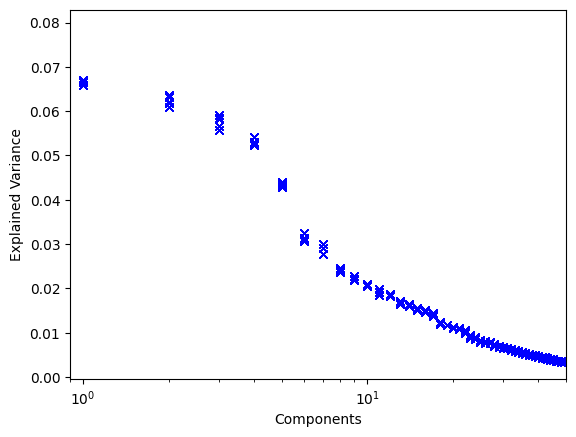

In [14]:
chain = 'TRA_TRB'
i = 10
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for pca_n in pca_n_list:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain,n_components=pca_n )
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['pc_n']=pca_n

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


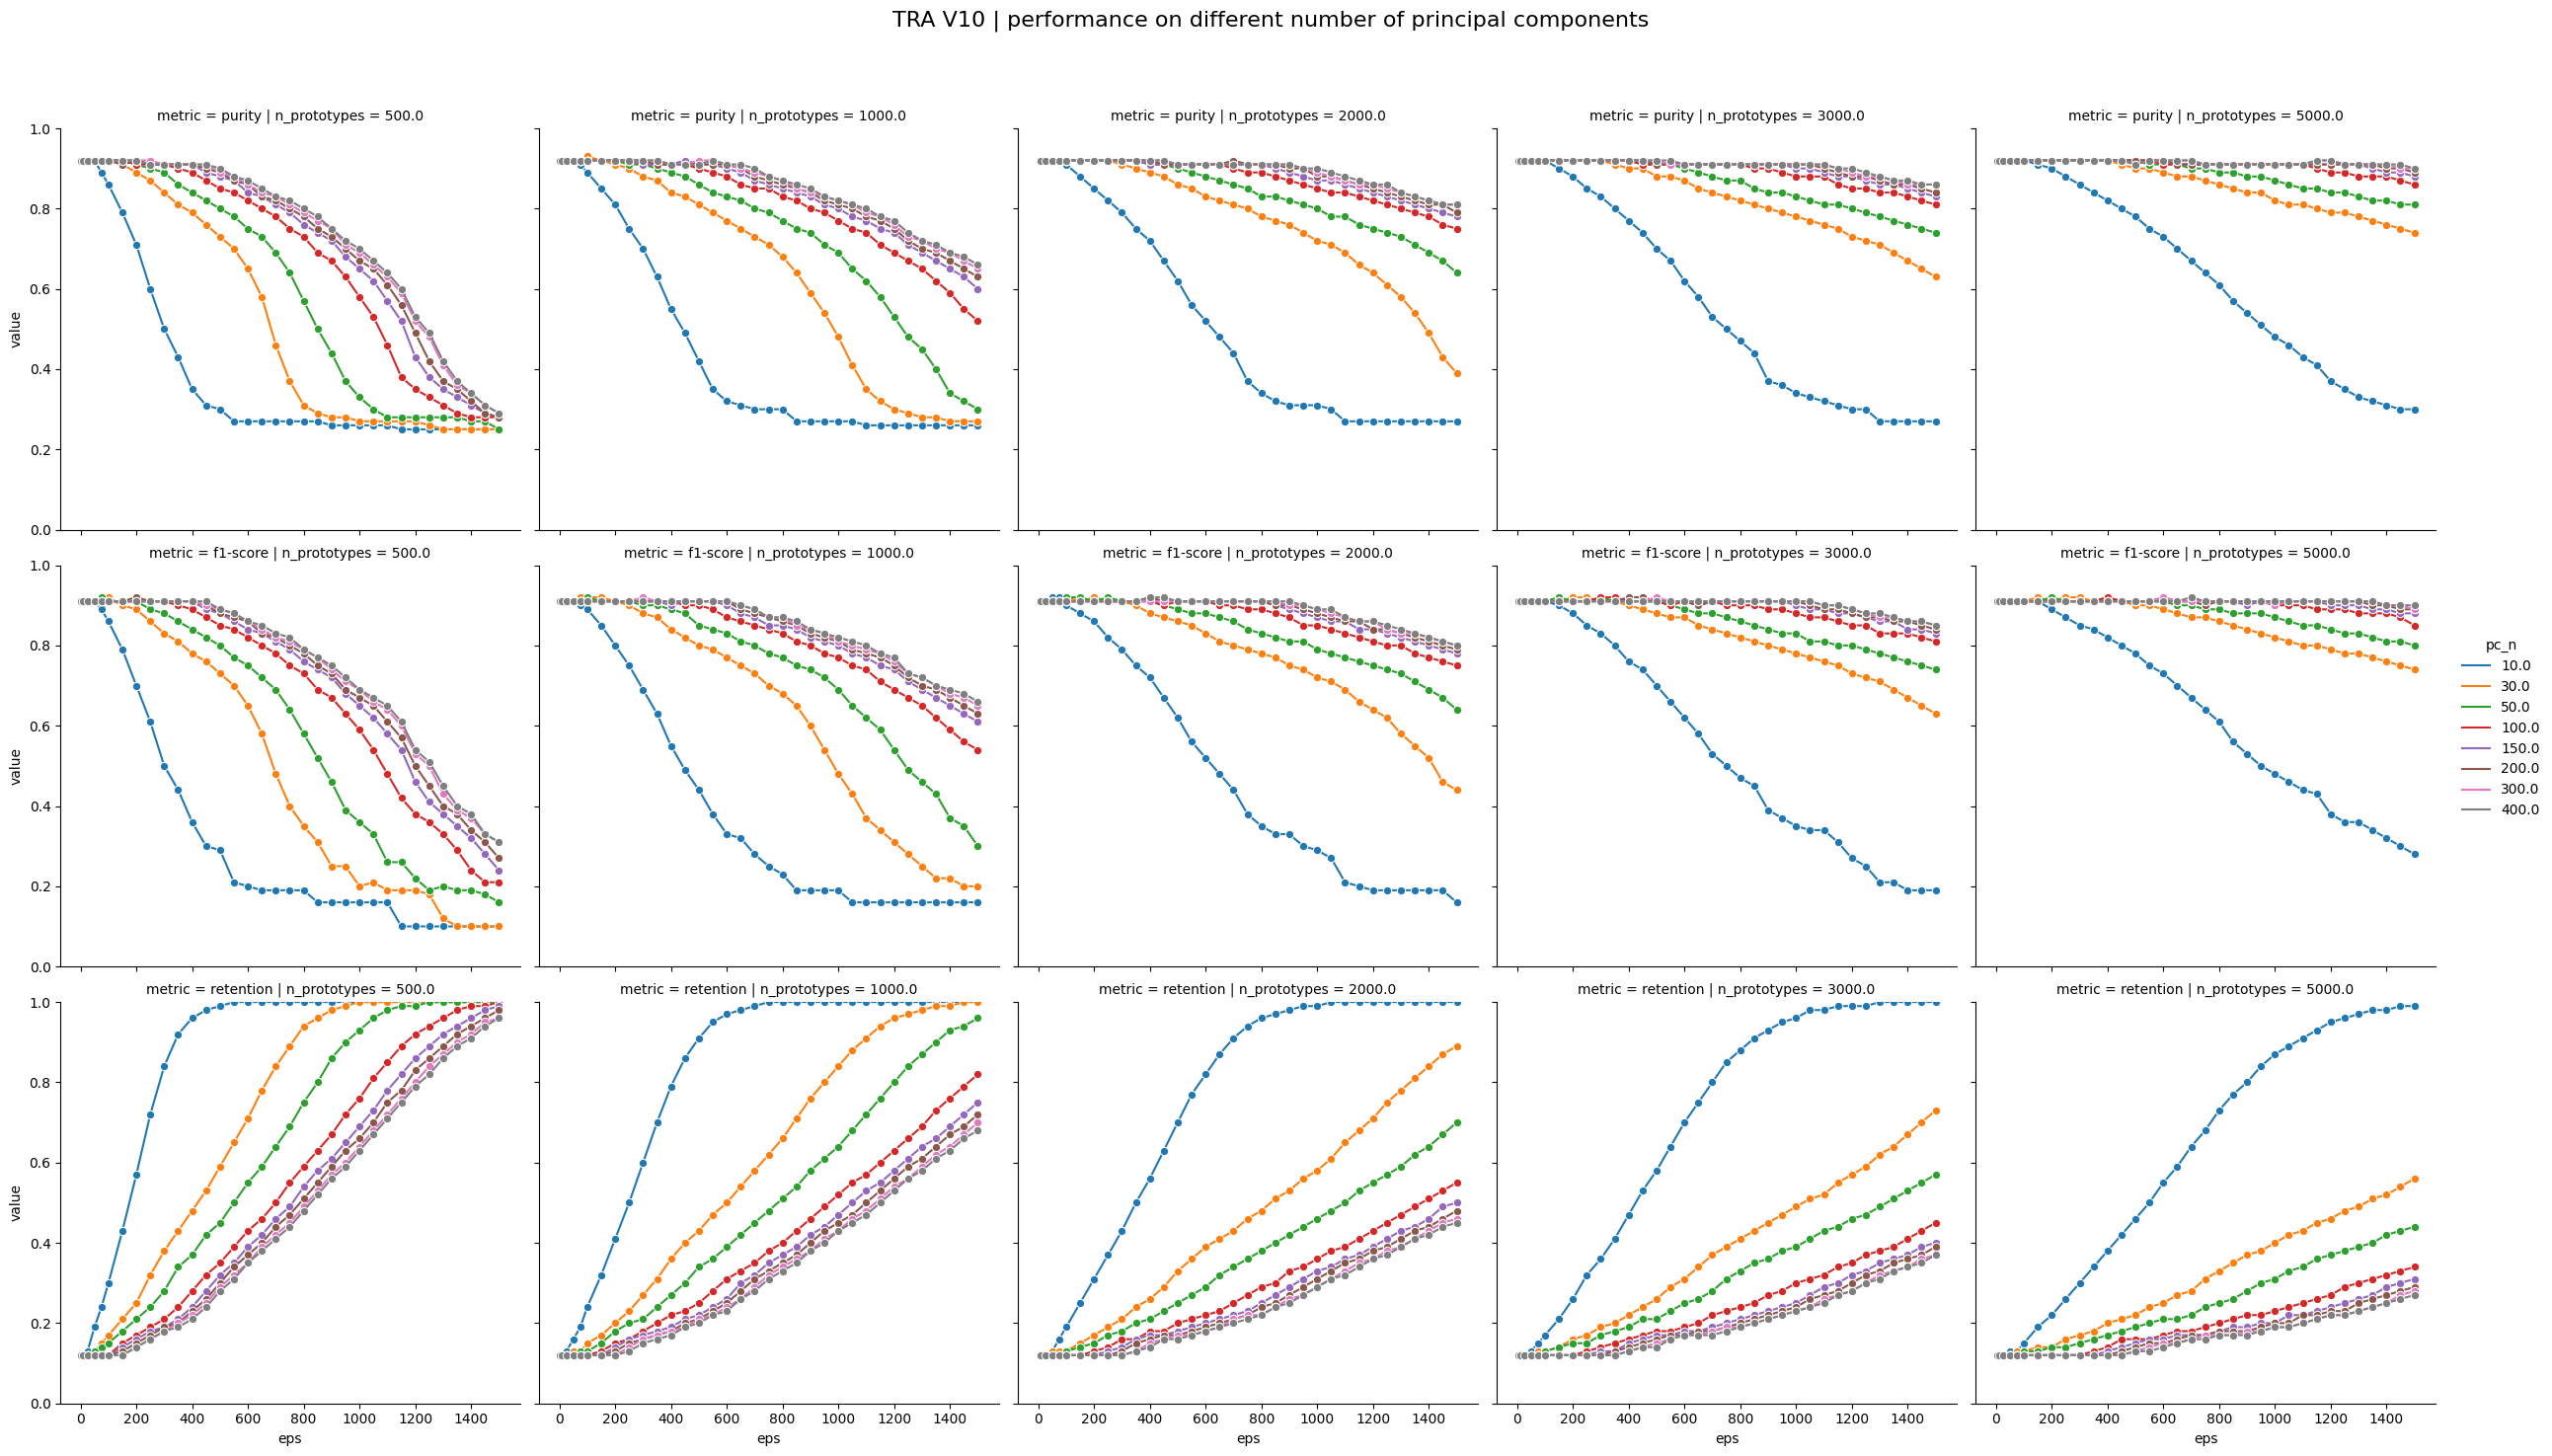

In [17]:
chain='TRA'
#metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
#metrics_df.to_csv(f"results/tables/tcremb_compare_{method}_{chain}.csv",index=False)
metrics_df = pd.read_csv(f"results/tables/tcremb_compare_{method}_{chain}.txt",sep='\t')
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
metrics_df['pc_n']=metrics_df['pc_n'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','pc_n','eps']].melt(id_vars=['n_prototypes','pc_n','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='pc_n', row='metric',col='n_prototypes',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain} V10 | performance on different number of principal components', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


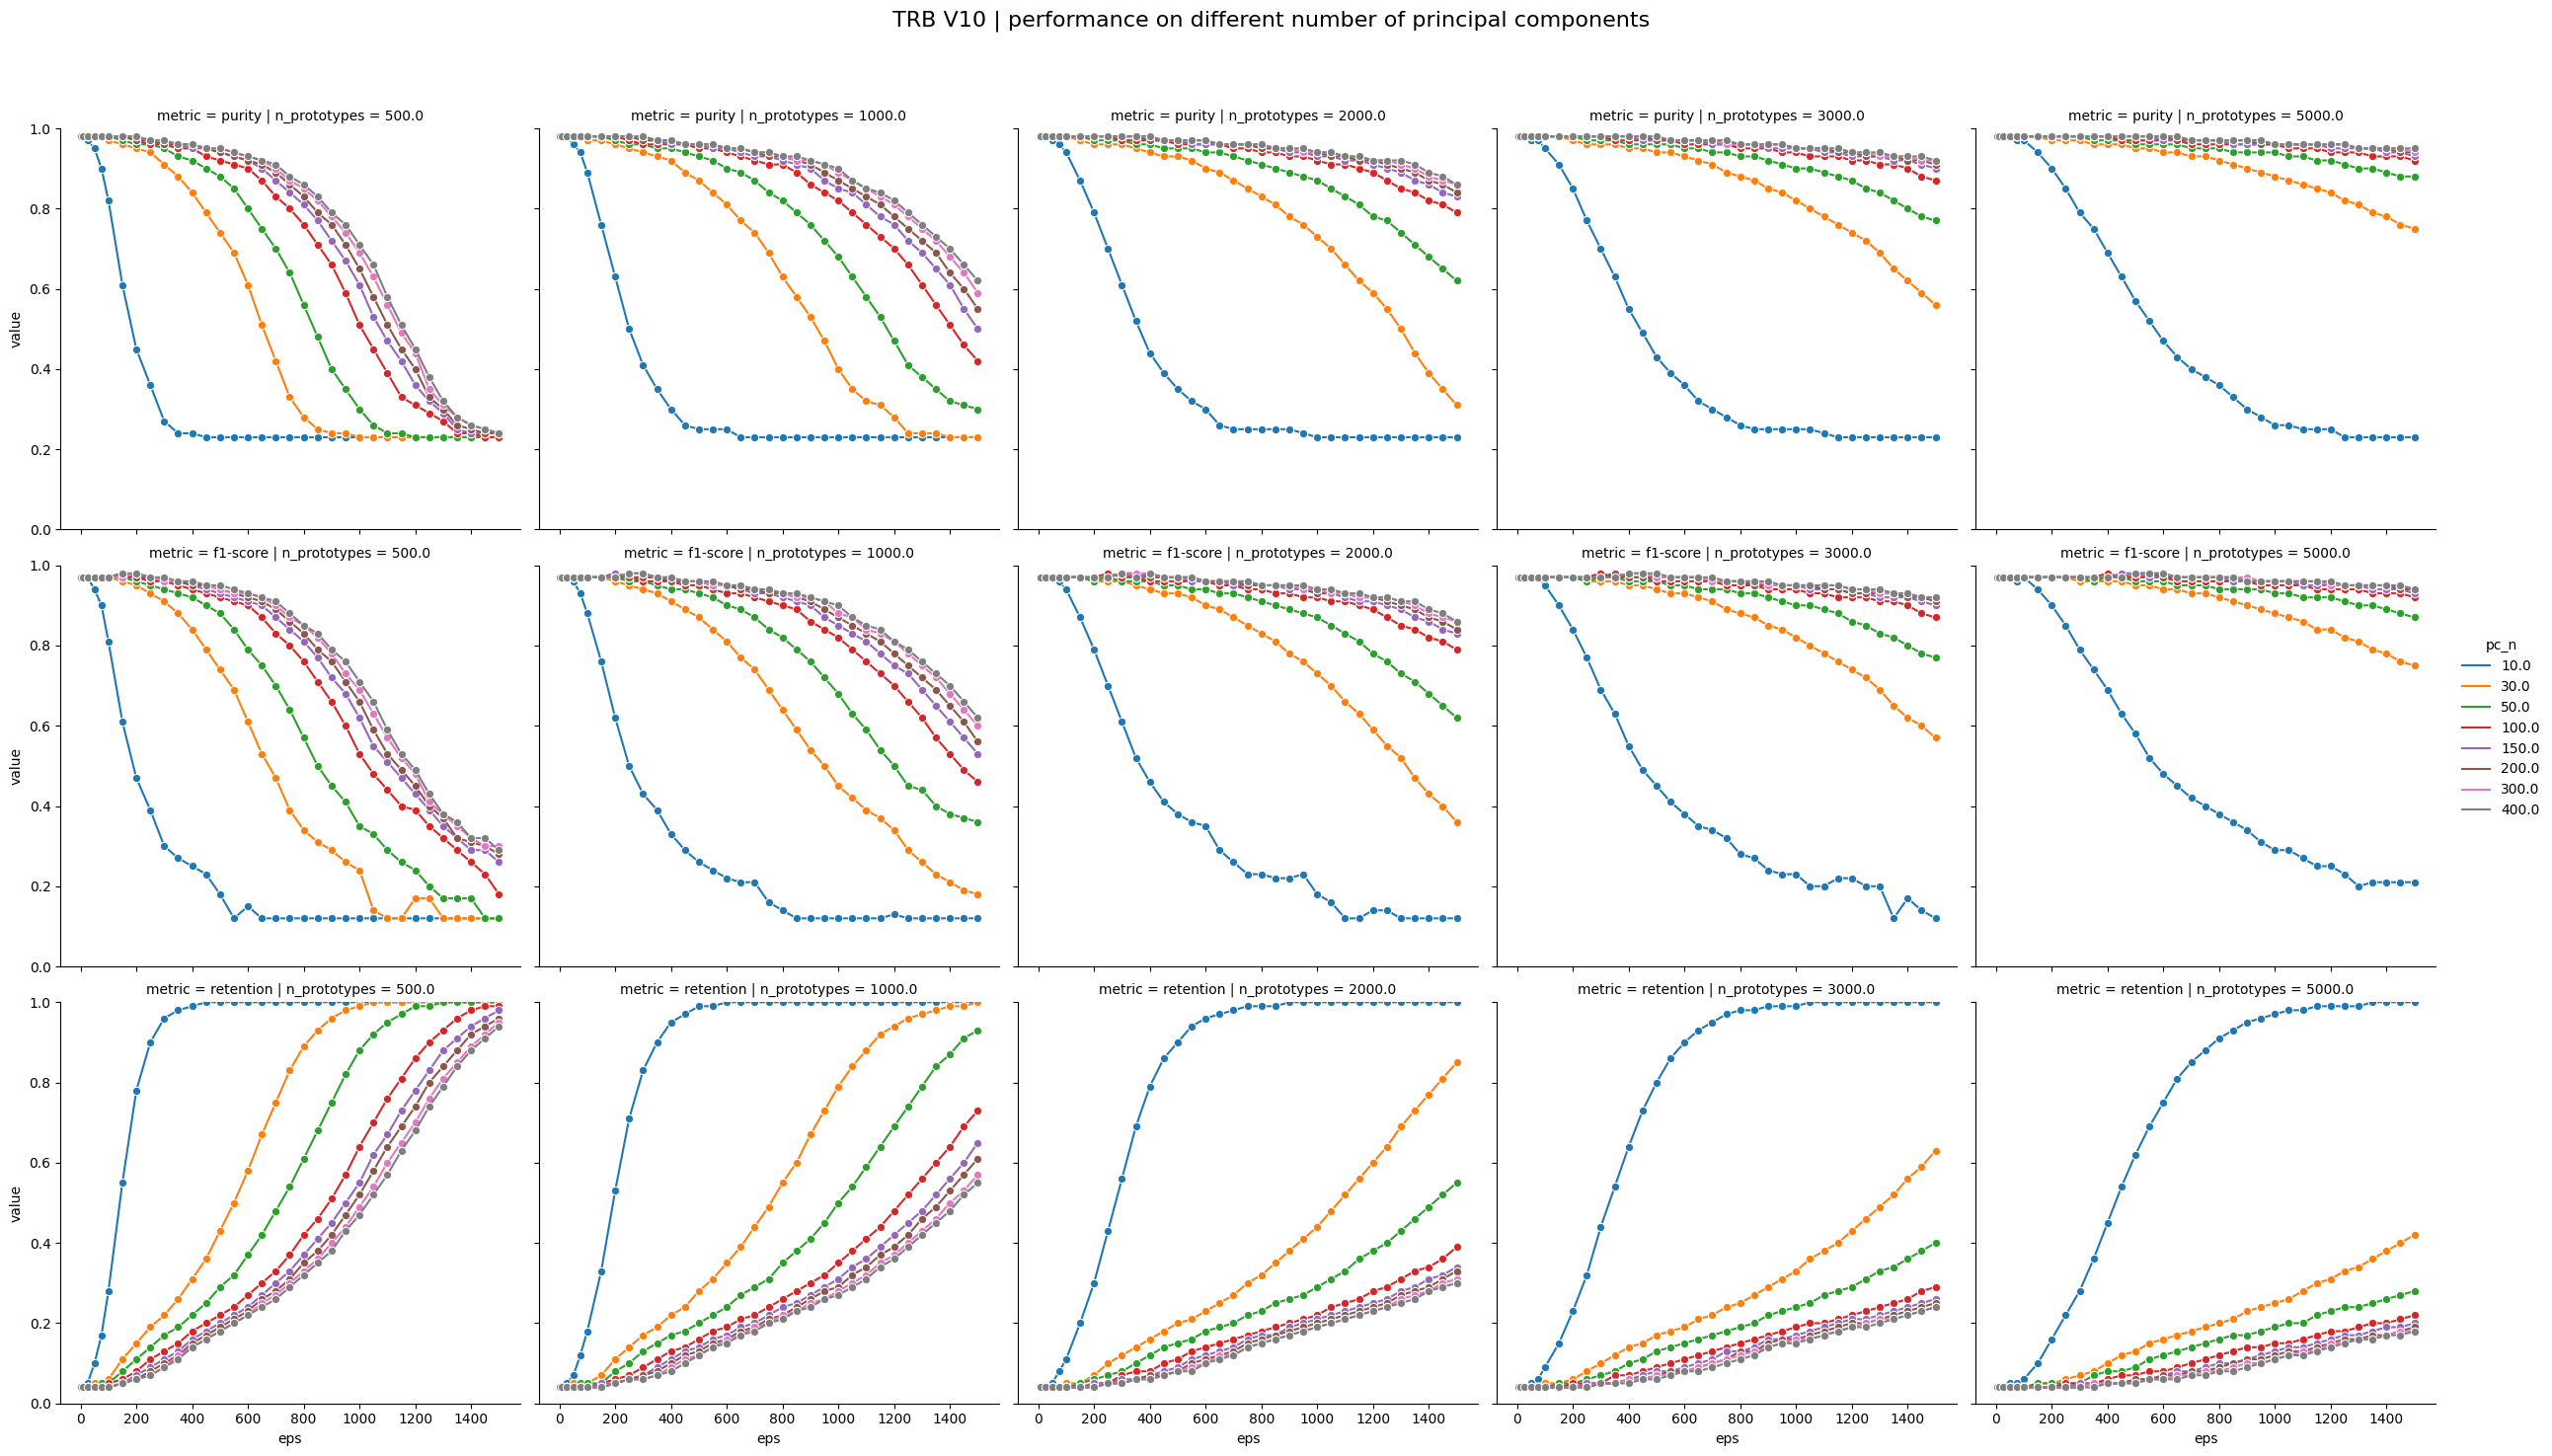

In [18]:
chain='TRB'
#metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
#metrics_df.to_csv(f"results/tables/tcremb_compare_{method}_{chain}.csv",index=False)
metrics_df = pd.read_csv(f"results/tables/tcremb_compare_{method}_{chain}.txt",sep='\t')
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
metrics_df['pc_n']=metrics_df['pc_n'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','pc_n','eps']].melt(id_vars=['n_prototypes','pc_n','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='pc_n', row='metric',col='n_prototypes',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain} V10 | performance on different number of principal components', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


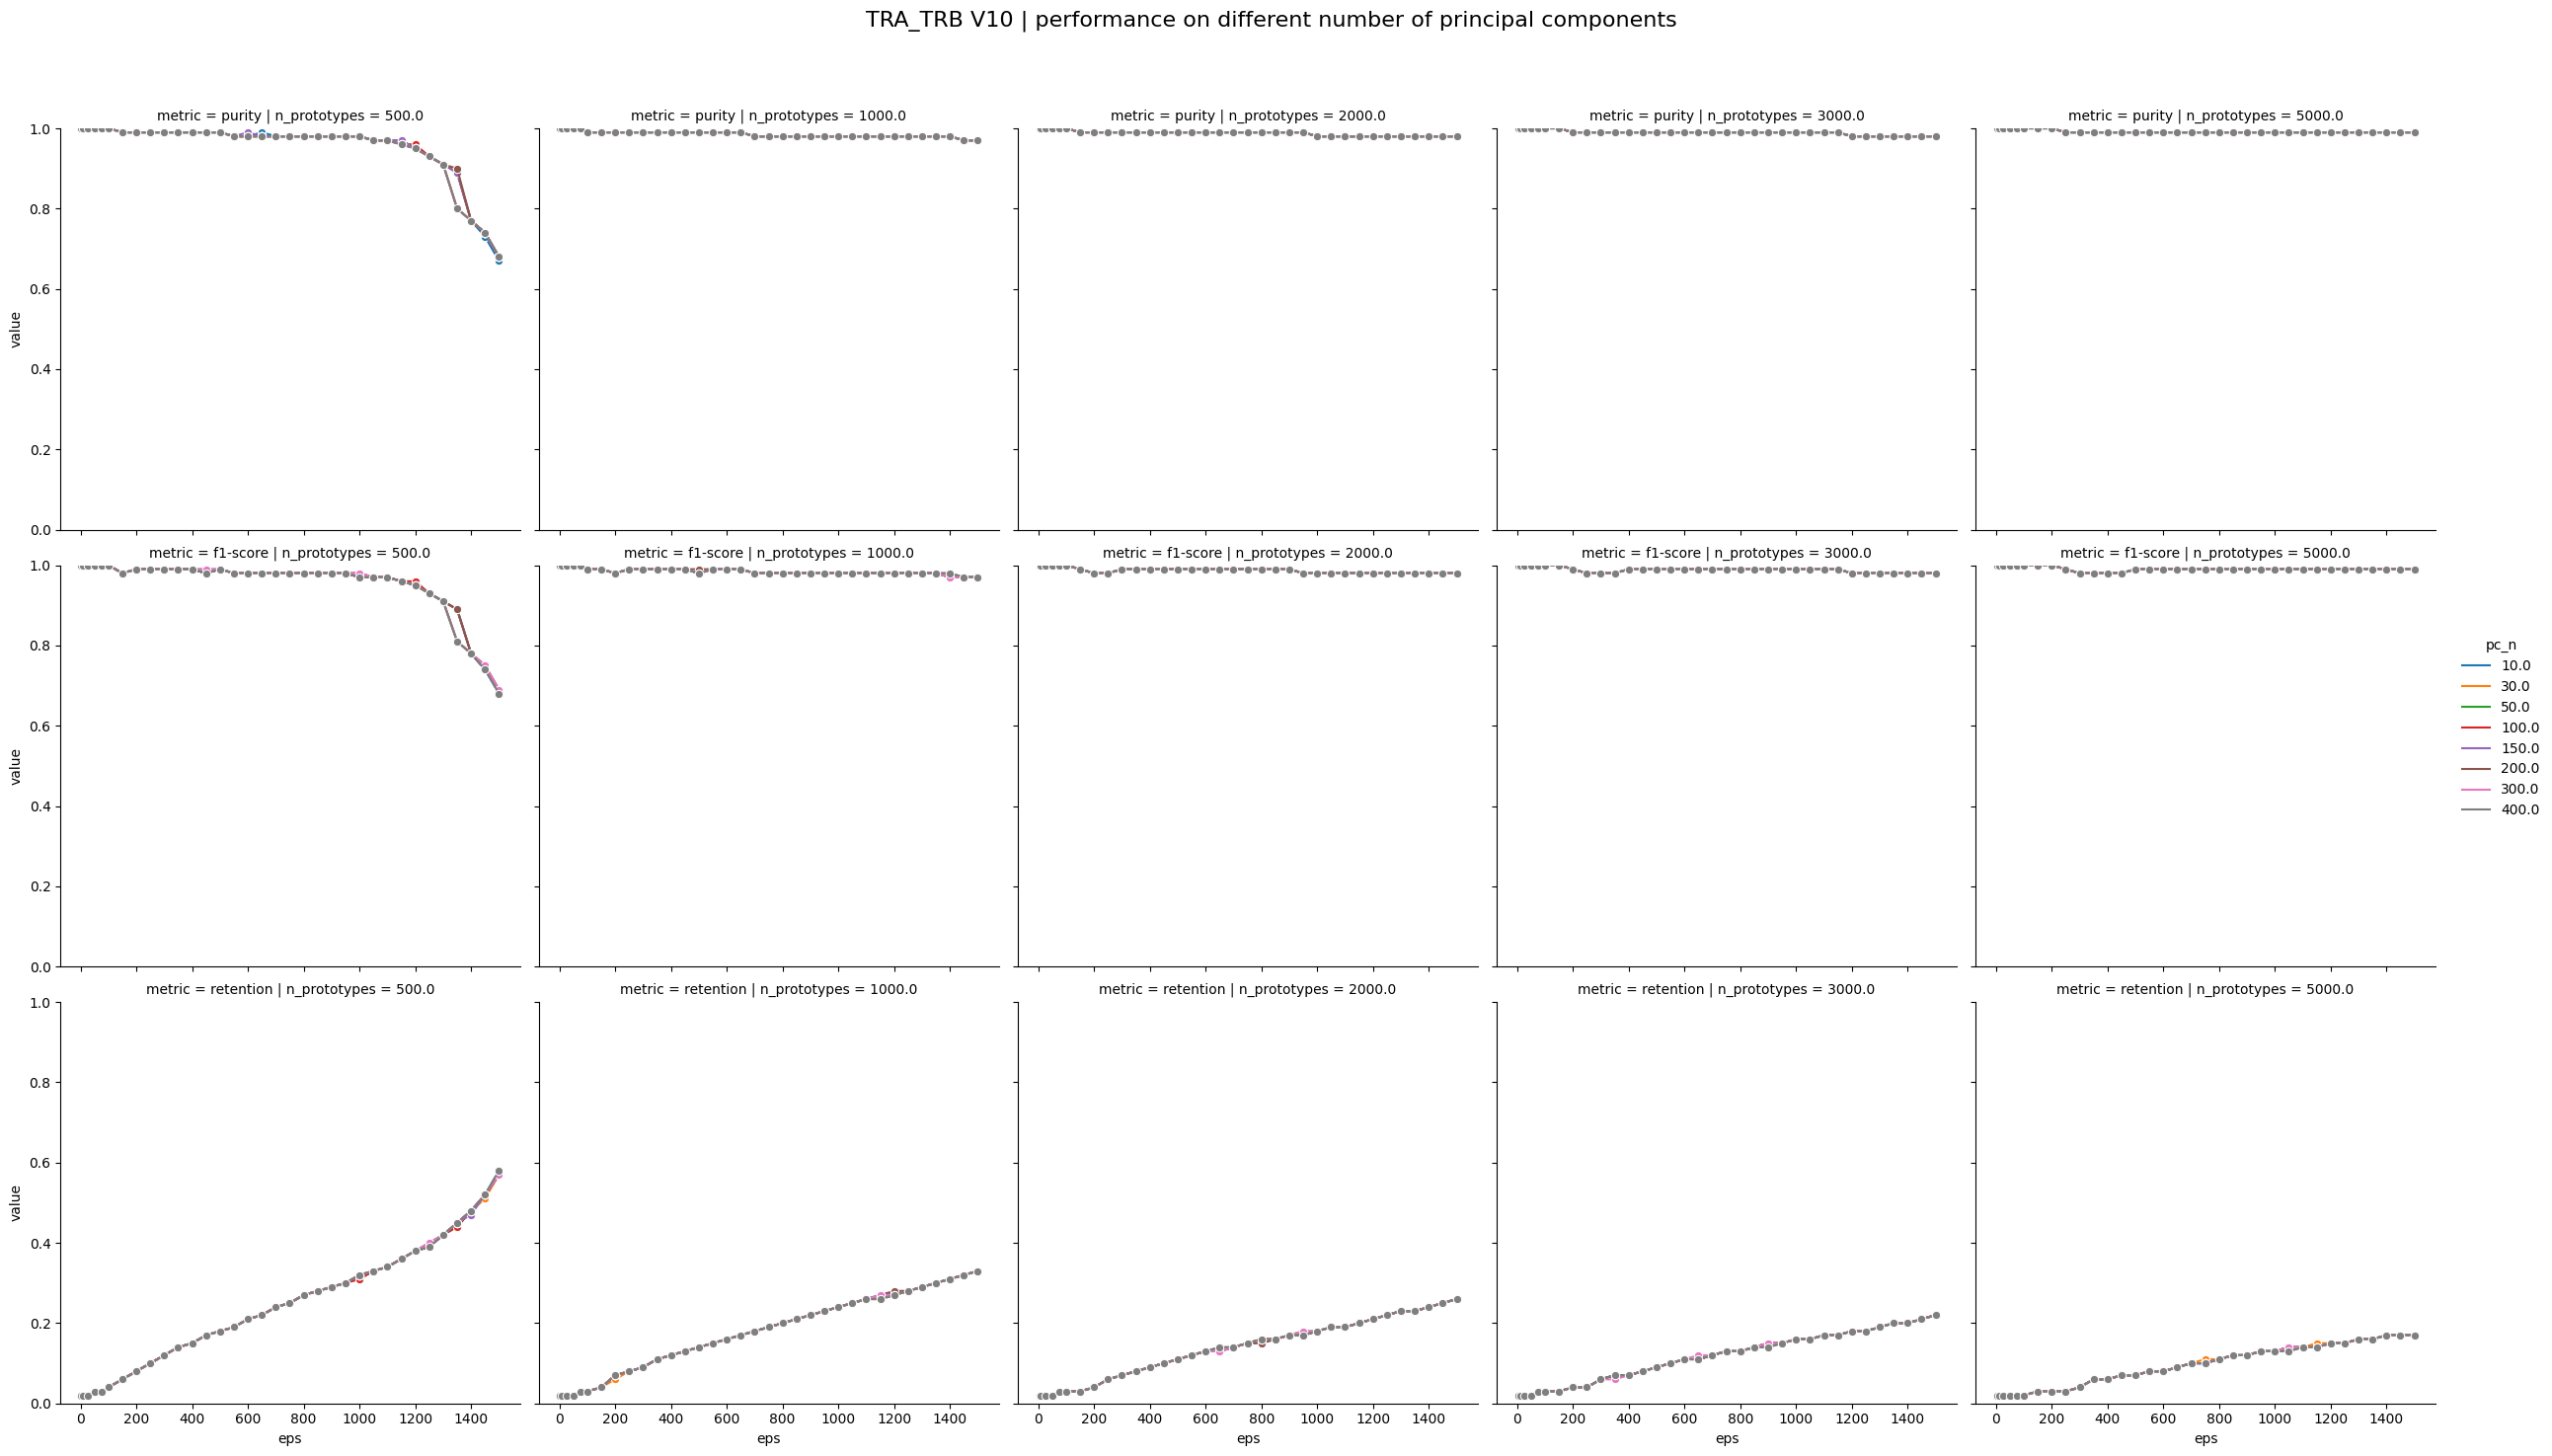

In [19]:
chain='TRA_TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_{method}_{chain}.txt",sep='\t',index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
metrics_df['pc_n']=metrics_df['pc_n'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','pc_n','eps']].melt(id_vars=['n_prototypes','pc_n','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='pc_n', row='metric',col='n_prototypes',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain} V10 | performance on different number of principal components', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

## check comparison

In [27]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df[(metrics_df['n_prototypes']==100)&(metrics_df['eps']==750)]

purity retention consistency       ami  accuracy precision  \
V10_P100_e750    0.898844  0.125601     0.00128  0.850632  0.003961  0.892681   
V1000_P100_e750  0.582095  0.999657    0.166362  0.053519  0.333108  0.511424   

                   recall  f1-score support mean_clustsize n_prototypes  eps  \
V10_P100_e750    0.898844  0.895752    2768       3.218605          100  750   
V1000_P100_e750  0.582095  0.544475    8746         1749.2          100  750   

                                     v  
V10_P100_e750     V10_TCRs_count:21725  
V1000_P100_e750  V1000_TCRs_count:8743

In [24]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df[(metrics_df['n_prototypes']==100)&(metrics_df['eps']==750)]

purity retention consistency       ami  accuracy precision  \
V10_P100_e750    0.802746  0.211295    0.002205  0.671266  0.001826  0.801173   
V1000_P100_e750   0.52166  0.999799    0.432198       0.0  0.249531  0.272129   

                   recall  f1-score support mean_clustsize n_prototypes  eps  \
V10_P100_e750    0.802746  0.801959    2185       3.189781          100  750   
V1000_P100_e750   0.52166  0.357674    4963         2481.5          100  750   

                                     v  
V10_P100_e750     V10_TCRs_count:10153  
V1000_P100_e750  V1000_TCRs_count:4952

In [37]:
## 100 prototypes
i = 10
j = 100
res_clstr_100={}
metrics_100={}
run_name = f'compare_V{i}_{j}'
proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA_{j}.txt', 'TRB' : f'data/data_preped/olga_humanTRB_{j}.txt'}

{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.2503868471953578
{'purity': 0.2503868471953578, 'retention': 0.9999032975534281, 'consistency': 0.011131776025393047, 'ami': 0.0, 'accuracy': 0.0009661826711911078, 'precision': 0.06269357324843146, 'recall': 0.2503868471953578, 'f1-score': 0.10027868317561782, 'support': 10340, 'mean_clustsize': 5170.0}


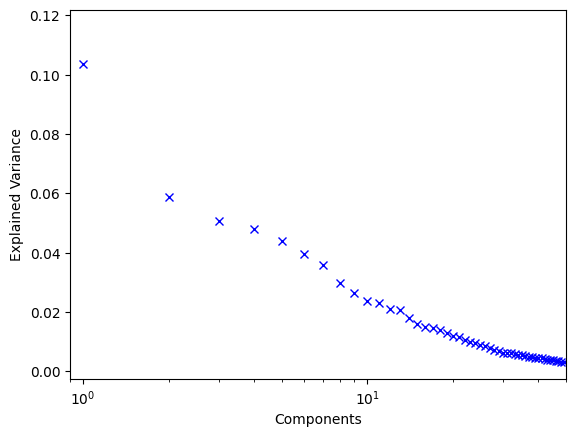

In [38]:

chain='TRA'
v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
vdjdb_v = pd.read_csv(v_path,sep='\t')


tcremb_100_a = TCRemb.TCRemb(run_name, vdjdb_v)
tcremb_100_a.tcremb_clonotypes(chain)
#tcremb_100_a.tcremb_dists_count(chain)
tcremb_100_a.tcremb_dists(chain)
tcremb_100_a.tcremb_pca(chain)
tcremb_100_a.tcremb_tsne(chain)


dbscan_100 = TCRemb.TCRemb_clustering('DBSCAN')

model = DBSCAN(eps=750, min_samples=2)
dbscan_100.clstr(chain,tcremb_100_a, label, model=model)

res_clstr_100[chain] = tcremb_100_a.annot[chain][[tcremb_100_a.annotation_id,label]].merge(dbscan_100.clstr_labels[chain],how='left')
metrics_100[chain] = metrics.get_clustermetrics(res_clstr_100[chain], label)

print(metrics_100[chain])

{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}
[κ0 CASSAFPCREGRNNEQFF, κ1 CASSHGVGQGPYEQYF, κ2 CASSLTTESGEQYF, κ3 CASSLGTLEETQYF, κ4 CASIPEGGRETQYF, κ5 CASSLDSLNTIYF, κ6 CASSQDTASSYEQYF, κ7 CASSLSYRGNSPLHF, κ8 CASSEALRDSGGQYF, κ9 CSADGLPISSYNEQFF]
(21725, 9001)
909.2553215026855


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8989534464092386
{'purity': 0.8989534464092386, 'retention': 0.1257373627370905, 'consistency': 0.0012789606640202097, 'ami': 0.8514917000602702, 'accuracy': 0.0039553602091882975, 'precision': 0.8901783734434399, 'recall': 0.8989534464092395, 'f1-score': 0.8945443905769266, 'support': 2771, 'mean_clustsize': 3.2183507549361208}


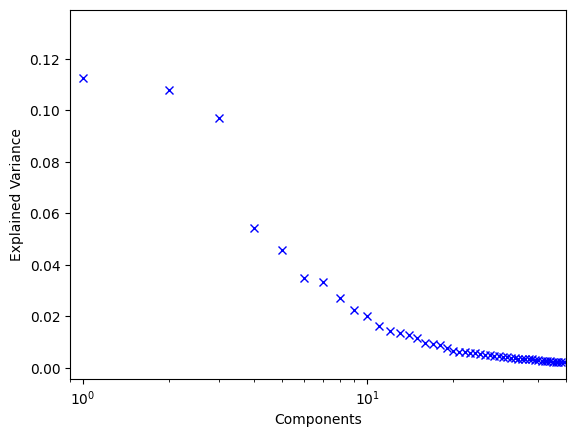

In [13]:

chain='TRB'
v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
vdjdb_v = pd.read_csv(v_path,sep='\t')


tcremb_100_b = TCRemb.TCRemb(run_name, vdjdb_v)
tcremb_100_b.tcremb_clonotypes(chain)
tcremb_100_b.tcremb_dists_count(chain)
tcremb_100_b.tcremb_dists(chain)
tcremb_100_b.tcremb_pca(chain)
tcremb_100_b.tcremb_tsne(chain)


dbscan_100 = TCRemb.TCRemb_clustering('DBSCAN')

model = DBSCAN(eps=750, min_samples=2)
dbscan_100.clstr(chain,tcremb_100_b, label, model=model)

res_clstr_100[chain] = tcremb_100_b.annot[chain][[tcremb_100_b.annotation_id,label]].merge(dbscan_100.clstr_labels[chain],how='left')
metrics_100[chain] = metrics.get_clustermetrics(res_clstr_100[chain], label)

print(metrics_100[chain])

In [14]:
## 100 prototypes
i = 10
j = 3000
metrics_3000={}
res_clstr_3000={}
run_name = f'compare_V{i}_{j}'
proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA_{j}.txt', 'TRB' : f'data/data_preped/olga_humanTRB_{j}.txt'}

In [ ]:
for i in samples_n:
    for j in prototypes_n:
        run_name = f'compare_V{i}_{j}'
        proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA_{j}.txt', 'TRB' : f'data/data_preped/olga_humanTRB_{j}.txt'}
    
        chain='TRA'
        v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
        run_tcremb_v(chain, run_name, v_path, proto_path_dict)
        chain='TRB'
        v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
        run_tcremb_v(chain, run_name, v_path, proto_path_dict)

In [ ]:
def run_tcremb_v(chain, run_name, v_path, proto_path):
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v,prototypes_path=proto_path_dict)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists_count(chain)
    tcremb.tcremb_dists(chain)
    

{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}
[κ0 CASNTGTASKLTF, κ1 CAVLLEYGNKLVF, κ2 CVVSAIMDSNYQLIW, κ3 CLVGATTDSWGKLQF, κ4 CLVGPLSGGYNKLIF, κ5 CAGAVGNQFYF, κ6 CAVNDNDKIIF, κ7 CALSDPTSGGYQKVTF, κ8 CAEAEGGGSQGNLIF, κ9 CAVRATGTASKLTF]
(10153, 8854)
374.2479314804077


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8021927820922796
{'purity': 0.8021927820922796, 'retention': 0.2116816555458853, 'consistency': 0.002078252980652301, 'ami': 0.6719512787218926, 'accuracy': 0.0018239793176606067, 'precision': 0.8017593083653567, 'recall': 0.80219278209228, 'f1-score': 0.8019759866549142, 'support': 2189, 'mean_clustsize': 3.1863173216885006}


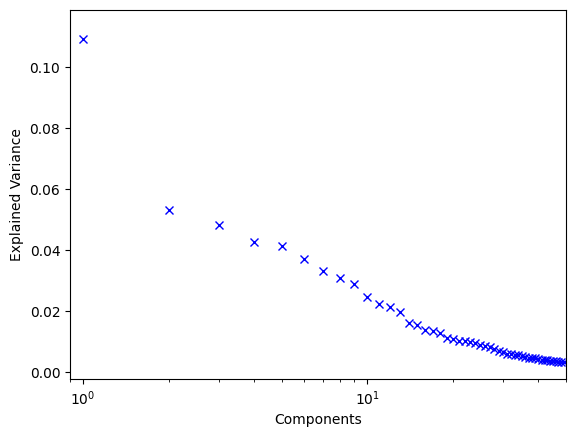

In [15]:

chain='TRA'
v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
vdjdb_v = pd.read_csv(v_path,sep='\t')


tcremb_3000_a = TCRemb.TCRemb(run_name, vdjdb_v)
tcremb_3000_a.tcremb_clonotypes(chain)
tcremb_3000_a.tcremb_dists_count(chain)
tcremb_3000_a.tcremb_dists(chain)
tcremb_3000_a.tcremb_pca(chain)
tcremb_3000_a.tcremb_tsne(chain)


dbscan_3000 = TCRemb.TCRemb_clustering('DBSCAN')

model = DBSCAN(eps=750, min_samples=2)
dbscan_3000.clstr(chain,tcremb_3000_a, label, model=model)

res_clstr_3000[chain] = tcremb_3000_a.annot[chain][[tcremb_3000_a.annotation_id,label]].merge(dbscan_3000.clstr_labels[chain],how='left')
metrics_3000[chain] = metrics.get_clustermetrics(res_clstr_3000[chain], label)

print(metrics_3000[chain])



{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}
[κ0 CASSAFPCREGRNNEQFF, κ1 CASSHGVGQGPYEQYF, κ2 CASSLTTESGEQYF, κ3 CASSLGTLEETQYF, κ4 CASIPEGGRETQYF, κ5 CASSLDSLNTIYF, κ6 CASSQDTASSYEQYF, κ7 CASSLSYRGNSPLHF, κ8 CASSEALRDSGGQYF, κ9 CSADGLPISSYNEQFF]
(21725, 9001)
931.0923249721527


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8985925658607001
{'purity': 0.8985925658607001, 'retention': 0.1257373627370905, 'consistency': 0.0012789606640202097, 'ami': 0.851723516623338, 'accuracy': 0.0039553602091882975, 'precision': 0.8932017180212988, 'recall': 0.8985925658607011, 'f1-score': 0.8958890324050199, 'support': 2771, 'mean_clustsize': 3.21461716937355}


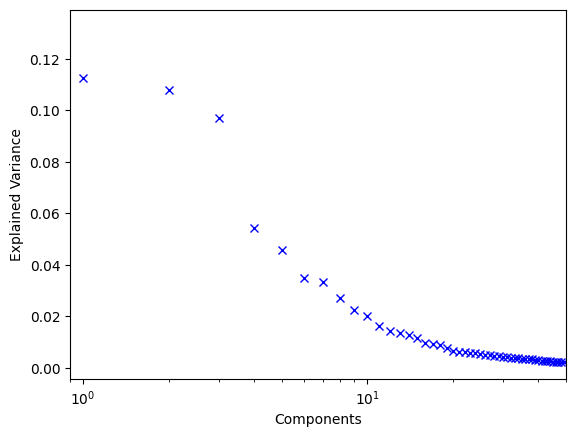

In [16]:

chain='TRB'
v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
vdjdb_v = pd.read_csv(v_path,sep='\t')


tcremb_3000_b = TCRemb.TCRemb(run_name, vdjdb_v)
tcremb_3000_b.tcremb_clonotypes(chain)
tcremb_3000_b.tcremb_dists_count(chain)
tcremb_3000_b.tcremb_dists(chain)
tcremb_3000_b.tcremb_pca(chain)
tcremb_3000_b.tcremb_tsne(chain)


dbscan_3000 = TCRemb.TCRemb_clustering('DBSCAN')

model = DBSCAN(eps=750, min_samples=2)
dbscan_3000.clstr(chain,tcremb_3000_b, label, model=model)

res_clstr_3000[chain] = tcremb_3000_b.annot[chain][[tcremb_3000_b.annotation_id,label]].merge(dbscan_3000.clstr_labels[chain],how='left')
metrics_3000[chain] = metrics.get_clustermetrics(res_clstr_3000[chain], label)

print(metrics_3000[chain])

In [5]:

samples_n=[10]
prototypes_n=[3000]

In [6]:
method = 'dbscan'
#params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
params=[750]
metrics_tcremb[method]={}

/scratch/ipykernel_1481972/971745361.py:11: DtypeWarning: Columns (20,22,24,25,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  vdjdb_v = pd.read_csv(v_path,sep='\t')


TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9891640866873065


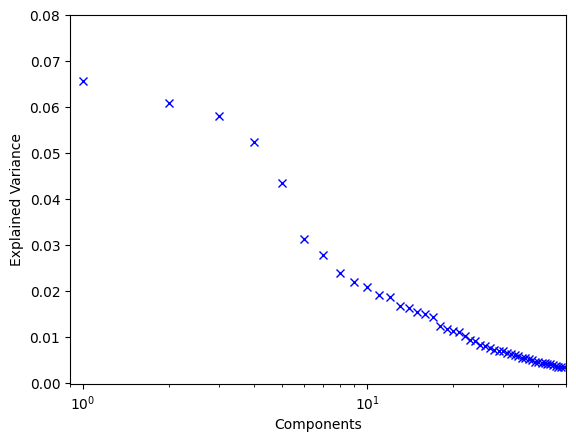

In [7]:
chain = 'TRA_TRB'
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for i in samples_n:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

In [12]:
t[(t['is_cluster']==1)&(t['antigen.epitope']!=t['label_cluster'])]

annotId antigen.epitope  cluster   label_cluster  total_cluster  \
67         67   PKYVKQNTLKLAT        2       GILGFVFTL             27   
1068     1068       CINGVCWTV        8       GLCTLVAML             16   
2281     2281       GILGFVFTL       19       NLVPMVATV              3   
2351     2351       GILGFVFTL        4       NLVPMVATV              3   
2812     2812       LTDEMIAQY      103  TFEYVSQPFLMDLE              3   
2967     2967       NQKLIANQF       13       RPPIFIRRL              3   
3465     3465       LLWNGPMAV      114      AVFDRKSDAK              6   

      total_group  count_matched  fraction_matched  fraction_matched_exp  \
67            805             26          0.962963              0.159596   
1068          212             15          0.937500              0.042030   
2281          476              2          0.666667              0.094370   
2351          476              2          0.666667              0.094370   
2812          401              2          0.666667              0.079500   
2967           32              2          0.666667              0.006344   
3465            9              5          0.833333              0.001784   

           p_value  is_cluster  enriched_clstr         a_cdr3aa     TRAV  \
67    4.339472e-20           1               1     CAGAGSQGNLIF   TRAV27   
1068  3.467950e-20           1               1      CAEDNNARLMF    TRAV5   
2281  2.503600e-02           1               0   CAGPMKTSYDKVIF   TRAV35   
2351  2.503600e-02           1               0      CARNTGNQFYF   TRAV24   
2812  1.795600e-02           1               0  CAGLNYGGSQGNLIF   TRAV35   
2967  1.202348e-04           1               0    CAFASSNTGKLIF   TRAV24   
3465  1.083533e-13           1               1     CAVGDNFNKFYF  TRAV8-3   

        TRAJ          b_cdr3aa      TRBV     TRBJ  
67    TRAJ42     CASSSRSSYEQYF    TRBV19  TRBJ2-7  
1068  TRAJ31     CSARDATGNGYTF  TRBV20-1  TRBJ1-2  
2281  TRAJ50      CASSSANYGYTF  TRBV12-4  TRBJ1-2  
2351  TRAJ49  CASSKQTGTGNYGYTF   TRBV6-5  TRBJ1-2  
2812  TRAJ42  CASSPRDRVNTGELFF     TRBV9  TRBJ2-2  
2967  TRAJ37    CASSQDRVTGKYTF   TRBV4-1  TRBJ1-2  
3465  TRAJ21    CASSLSSATGELFF    TRBV28  TRBJ2-2